In [1]:
import pandas as pd
import numpy as np


from sklearn.cluster import KMeans
import scipy.stats as stats

import seaborn as sns
import matplotlib.pyplot as plt
 

import acquire as a
import prepare as p
import wrangle as w
import explore as exp
import evaluate as eva
import pretty as muah
import knear as k

import warnings
warnings.filterwarnings("ignore")

# Acquire

In [2]:
def read_csv_file():
    df = pd.read_csv('combined_wine_data.csv')
    return df

df = read_csv_file()
df.head()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free_sulfur_dioxide  total_sulfur_dioxide  density    ph  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality   Type  White  
0      8.8        6  White      1  
1      9.5        6  White      1  
2     10.1        6  White      1  
3      9.9        6  White      1  
4      9.9        6  White      1

In [3]:
df['bound_sulfur_dioxide'] = (df.total_sulfur_dioxide - df.free_sulfur_dioxide)
df

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0               7.0             0.270         0.36            20.7      0.045   
1               6.3             0.300         0.34             1.6      0.049   
2               8.1             0.280         0.40             6.9      0.050   
3               7.2             0.230         0.32             8.5      0.058   
4               7.2             0.230         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
6492            6.2             0.600         0.08             2.0      0.090   
6493            5.9             0.550         0.10             2.2      0.062   
6494            6.3             0.510         0.13             2.3      0.076   
6495            5.9             0.645         0.12             2.0      0.075   
6496            6.0             0.310         0.47             3.6      0.067   

      free_sulfur_dioxide  total_sulfur_dioxide  density    ph  sulphates  \
0                    45.0                 170.0  1.00100  3.00       0.45   
1                    14.0                 132.0  0.99400  3.30       0.49   
2                    30.0                  97.0  0.99510  3.26       0.44   
3                    47.0                 186.0  0.99560  3.19       0.40   
4                    47.0                 186.0  0.99560  3.19       0.40   
...                   ...                   ...      ...   ...        ...   
6492                 32.0                  44.0  0.99490  3.45       0.58   
6493                 39.0                  51.0  0.99512  3.52       0.76   
6494                 29.0                  40.0  0.99574  3.42       0.75   
6495                 32.0                  44.0  0.99547  3.57       0.71   
6496                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality   Type  White  bound_sulfur_dioxide  
0         8.8        6  White      1                 125.0  
1         9.5        6  White      1                 118.0  
2        10.1        6  White      1                  67.0  
3         9.9        6  White      1                 139.0  
4         9.9        6  White      1                 139.0  
...       ...      ...    ...    ...                   ...  
6492     10.5        5    Red      0                  12.0  
6493     11.2        6    Red      0                  12.0  
6494     11.0        6    Red      0                  11.0  
6495     10.2        5    Red      0                  12.0  
6496     11.0        6    Red      0                  24.0  

[6497 rows x 15 columns]

In [4]:
df_white = df[df['Type'] == 'White']
df_white

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0               7.0              0.27         0.36            20.7      0.045   
1               6.3              0.30         0.34             1.6      0.049   
2               8.1              0.28         0.40             6.9      0.050   
3               7.2              0.23         0.32             8.5      0.058   
4               7.2              0.23         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020   

      free_sulfur_dioxide  total_sulfur_dioxide  density    ph  sulphates  \
0                    45.0                 170.0  1.00100  3.00       0.45   
1                    14.0                 132.0  0.99400  3.30       0.49   
2                    30.0                  97.0  0.99510  3.26       0.44   
3                    47.0                 186.0  0.99560  3.19       0.40   
4                    47.0                 186.0  0.99560  3.19       0.40   
...                   ...                   ...      ...   ...        ...   
4893                 24.0                  92.0  0.99114  3.27       0.50   
4894                 57.0                 168.0  0.99490  3.15       0.46   
4895                 30.0                 111.0  0.99254  2.99       0.46   
4896                 20.0                 110.0  0.98869  3.34       0.38   
4897                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  quality   Type  White  bound_sulfur_dioxide  
0         8.8        6  White      1                 125.0  
1         9.5        6  White      1                 118.0  
2        10.1        6  White      1                  67.0  
3         9.9        6  White      1                 139.0  
4         9.9        6  White      1                 139.0  
...       ...      ...    ...    ...                   ...  
4893     11.2        6  White      1                  68.0  
4894      9.6        5  White      1                 111.0  
4895      9.4        6  White      1                  81.0  
4896     12.8        7  White      1                  90.0  
4897     11.8        6  White      1                  76.0  

[4898 rows x 15 columns]

# Prepare

In [5]:
df_red = df[df['Type']=='Red']
df_red

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
4898            7.4             0.700         0.00             1.9      0.076   
4899            7.8             0.880         0.00             2.6      0.098   
4900            7.8             0.760         0.04             2.3      0.092   
4901           11.2             0.280         0.56             1.9      0.075   
4902            7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
6492            6.2             0.600         0.08             2.0      0.090   
6493            5.9             0.550         0.10             2.2      0.062   
6494            6.3             0.510         0.13             2.3      0.076   
6495            5.9             0.645         0.12             2.0      0.075   
6496            6.0             0.310         0.47             3.6      0.067   

      free_sulfur_dioxide  total_sulfur_dioxide  density    ph  sulphates  \
4898                 11.0                  34.0  0.99780  3.51       0.56   
4899                 25.0                  67.0  0.99680  3.20       0.68   
4900                 15.0                  54.0  0.99700  3.26       0.65   
4901                 17.0                  60.0  0.99800  3.16       0.58   
4902                 11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
6492                 32.0                  44.0  0.99490  3.45       0.58   
6493                 39.0                  51.0  0.99512  3.52       0.76   
6494                 29.0                  40.0  0.99574  3.42       0.75   
6495                 32.0                  44.0  0.99547  3.57       0.71   
6496                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality Type  White  bound_sulfur_dioxide  
4898      9.4        5  Red      0                  23.0  
4899      9.8        5  Red      0                  42.0  
4900      9.8        5  Red      0                  39.0  
4901      9.8        6  Red      0                  43.0  
4902      9.4        5  Red      0                  23.0  
...       ...      ...  ...    ...                   ...  
6492     10.5        5  Red      0                  12.0  
6493     11.2        6  Red      0                  12.0  
6494     11.0        6  Red      0                  11.0  
6495     10.2        5  Red      0                  12.0  
6496     11.0        6  Red      0                  24.0  

[1599 rows x 15 columns]

- fixed_acidity  
    - Corresponds to the set of low volatility organic acids such as malic, lactic, tartaric or citric acids and is inherent to the characteristics of the sample.
        - Units of measure: pH scale 0-14
- volatile_acidity	
    - Corresponds to the set of short chain organic acids that can be extracted from the sample by means of a distillation process: formic acid, acetic acid, propionic acid and butyric acid.
        - Units of measure: 0.xx g/100mL
- citric_acid
    - 'Citric acid is often added to wines to increase acidity, complement a specific flavor or prevent ferric hazes. It can be added to finished wines to increase acidity and give a “fresh” flavor. The disadvantage of adding citric acid is its microbial instability'.
        - Units of measure: 0.xx g/L
- residual_sugar
    - Residual sugar or 'RS' is from the natural grape sugars left in a wine after the alcoholic fermentation finishes. The more residual sugar remaining in a wine, the sweeter the wine is.
        - Units of measure: Grams
- chlorides	
    - In wines, the concentration of chloride ions is generally indicative of the presence of sodium chloride5. Sodium chloride adds to the saltiness of a wine, which can contribute to or detract from the overall taste and quality of the wine.
        - Units of measure: Percentage of volume
- free_sulfur_dioxide
    - Sulfur dioxide is used in winemaking as a preservative to prevent oxidation and microbial spoilage. 
        - Units of measure: mg/L
- total_sulfur_dioxide	
    - The portion of SO2 that is free in the wine plus the portion that is bound to other chemicals in the wine such as aldehydes, pigments, or sugars.
        - Units of measure: mg/L
- density	
    - Is the mass per unit volume of wine or must at 20°C. 
        - Units of measure: g/mL, and denoted by the symbol $p$ 20°C.
- ph
    - Typically, the pH level of a wine ranges from 3 to 4. Red wines with higher acidity are more likely to be a bright ruby color, as the lower pH gives them a red hue. Higher pH, less-acidic red wines can take on a blue or purple hue.
        - Units of measure: pH scale 0-14
- sulphates	(sulphite)
    - Sulfites are a food preservative widely used in winemaking, thanks to their ability to maintain the flavor and freshness of wine. While they're found in many foods and beverages, they're particularly associated with a long list of side effects related to wine consumption, including the dreaded wine-induced headache.
        - Units of measure: mg/L
- alcohol	
    - The alcohol content by percent in wine
        - Units of measure: ABV(alcohol percentage by volume)
- quality	
    - The quality rating of the wine 1-10
        - Units of measure: Scale 1-10, 1 being the worst, and 10 is best
- Type
    - Whether the wine is red or white

In [6]:
#check shape
df_red.shape

(1599, 15)

#### Summarize the DataFrame

SUMMARY REPORT
          
          
Dataframe head: 
      fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
4898            7.4              0.70         0.00             1.9      0.076   
4899            7.8              0.88         0.00             2.6      0.098   
4900            7.8              0.76         0.04             2.3      0.092   
4901           11.2              0.28         0.56             1.9      0.075   
4902            7.4              0.70         0.00             1.9      0.076   

      free_sulfur_dioxide  total_sulfur_dioxide  density    ph  sulphates  \
4898                 11.0                  34.0   0.9978  3.51       0.56   
4899                 25.0                  67.0   0.9968  3.20       0.68   
4900                 15.0                  54.0   0.9970  3.26       0.65   
4901                 17.0                  60.0   0.9980  3.16       0.58   
4902                 11.0                  34.0   0.9978  3.51       0.56 

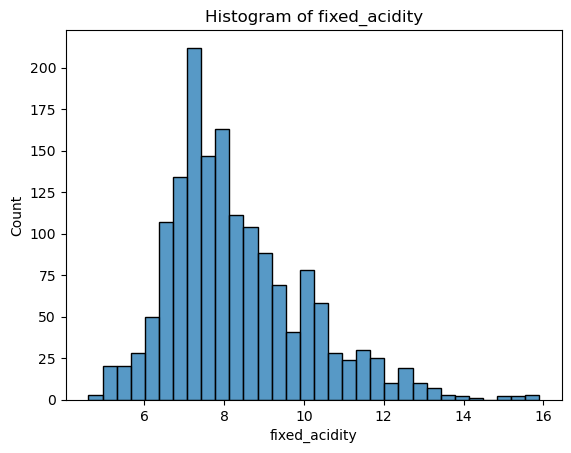

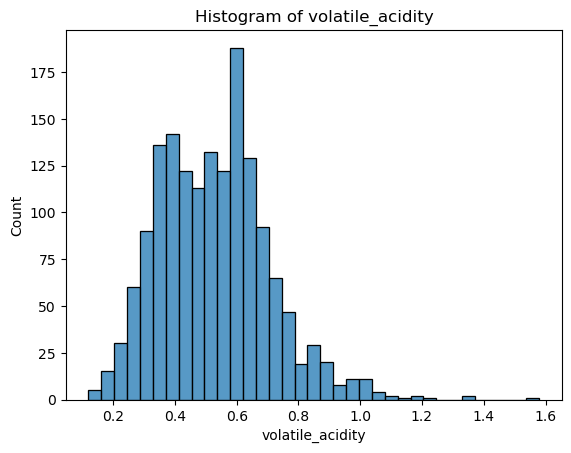

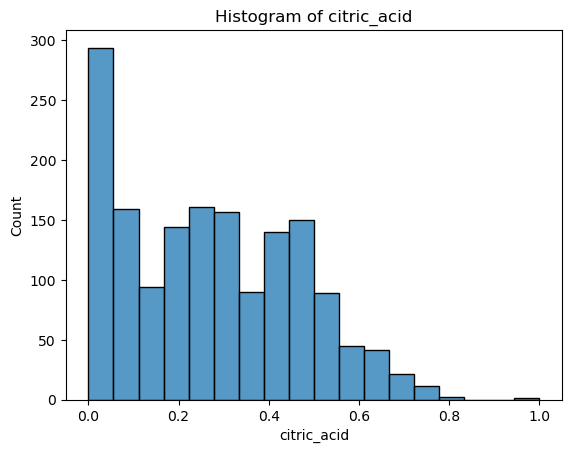

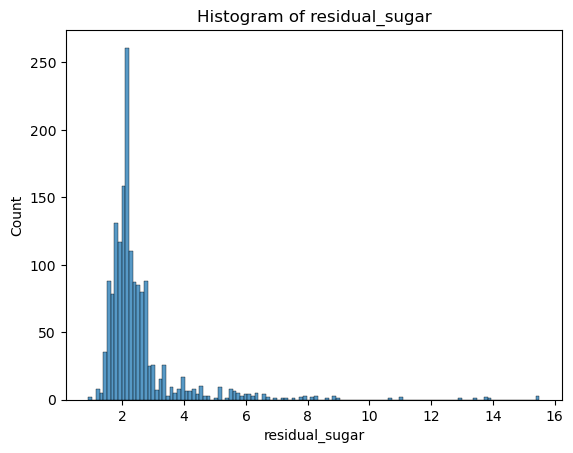

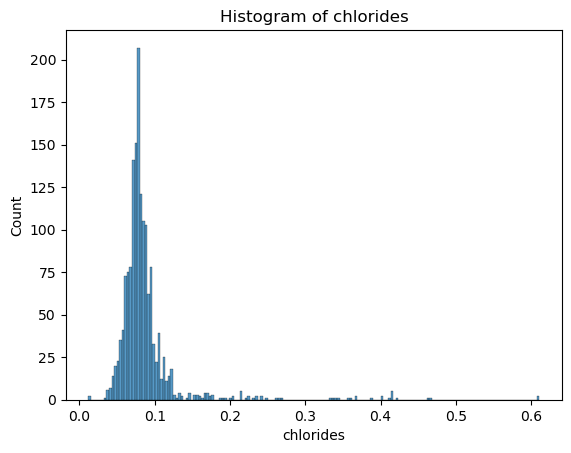

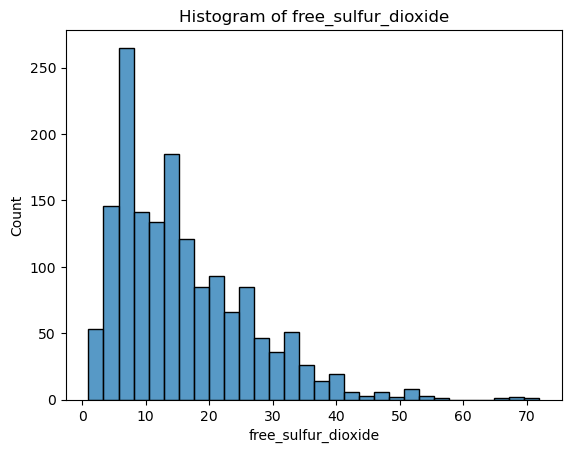

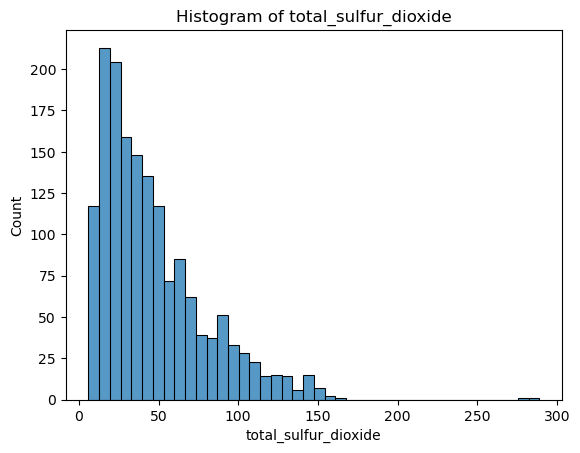

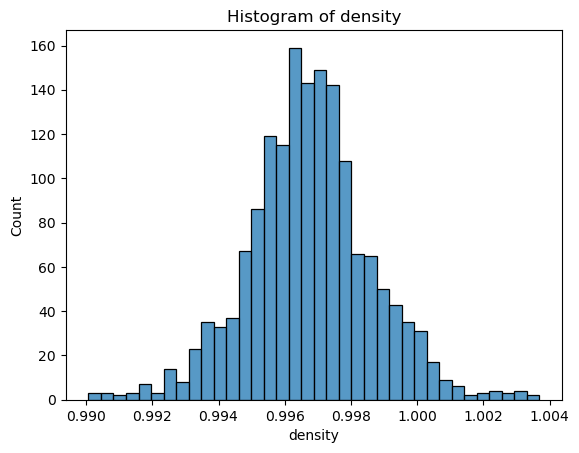

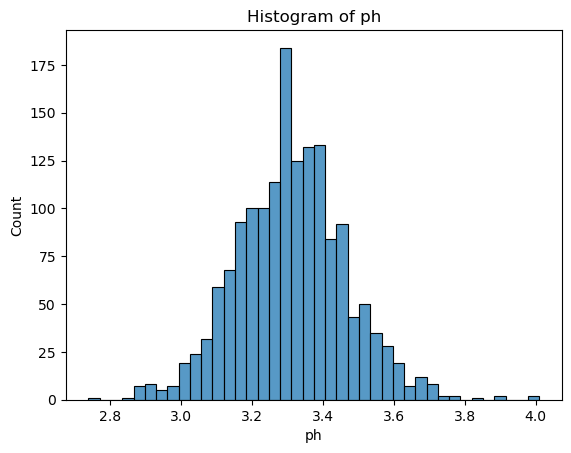

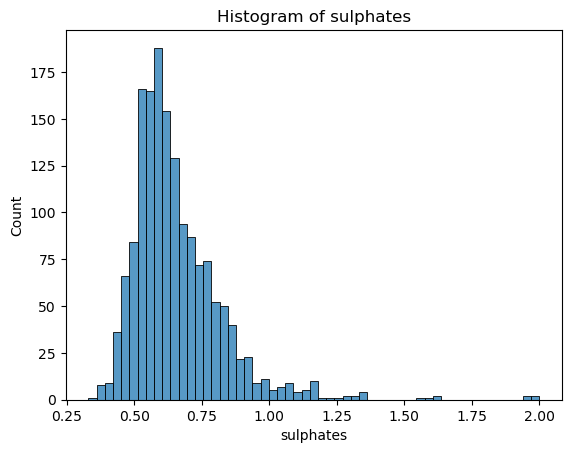

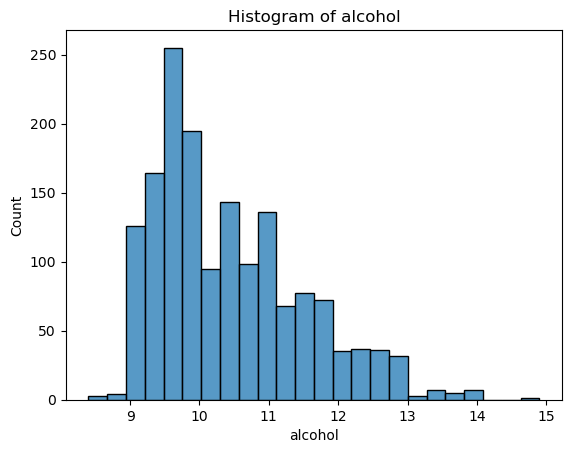

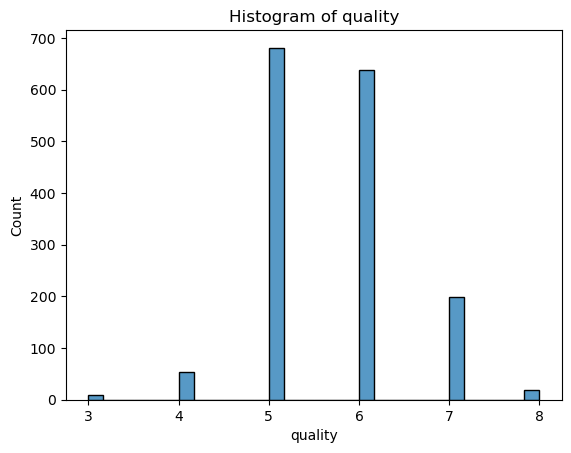

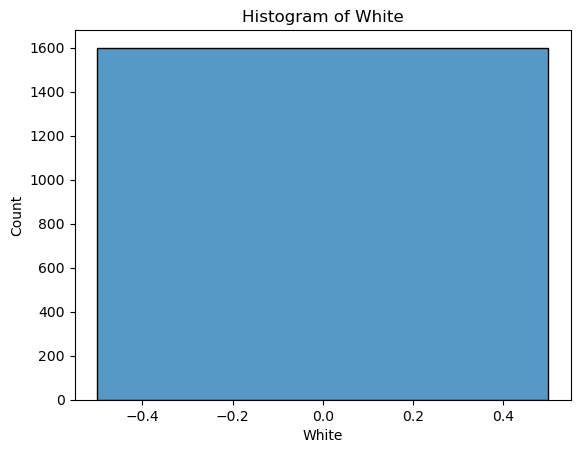

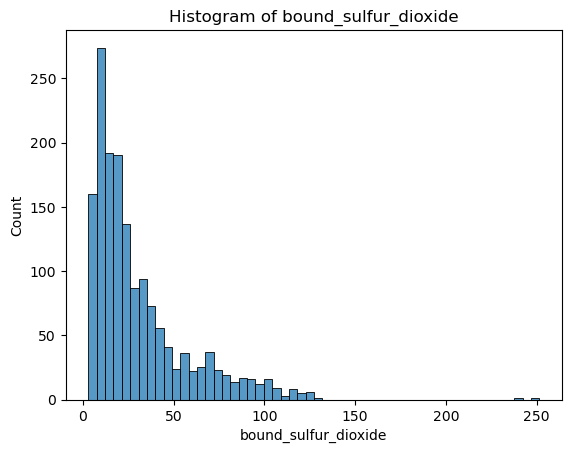

In [7]:
# use summarize function
p.summarize(df_red)

##### Takeaways:
- There are no null values in rows
- There are no null value in columns
- The data types make sense for the variables they represent

In [8]:
# check it out
df_red.head()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
4898            7.4              0.70         0.00             1.9      0.076   
4899            7.8              0.88         0.00             2.6      0.098   
4900            7.8              0.76         0.04             2.3      0.092   
4901           11.2              0.28         0.56             1.9      0.075   
4902            7.4              0.70         0.00             1.9      0.076   

      free_sulfur_dioxide  total_sulfur_dioxide  density    ph  sulphates  \
4898                 11.0                  34.0   0.9978  3.51       0.56   
4899                 25.0                  67.0   0.9968  3.20       0.68   
4900                 15.0                  54.0   0.9970  3.26       0.65   
4901                 17.0                  60.0   0.9980  3.16       0.58   
4902                 11.0                  34.0   0.9978  3.51       0.56   

      alcohol  quality Type  White  bound_sulfur_dioxide  
4898      9.4        5  Red      0                  23.0  
4899      9.8        5  Red      0                  42.0  
4900      9.8        5  Red      0                  39.0  
4901      9.8        6  Red      0                  43.0  
4902      9.4        5  Red      0                  23.0

In [9]:
# explore quality prior to outlier removal, I don't want to remove any outliers from this category. Especially since it is the target
df_red.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

- in the line below I am using a function to remove outliers based on quartiles. I pass three features in that I want the function to ommit in the outlier removal process.

- the function will graph the variables both before and after outlier removal. The centering of data is visible through examination of the graphs.

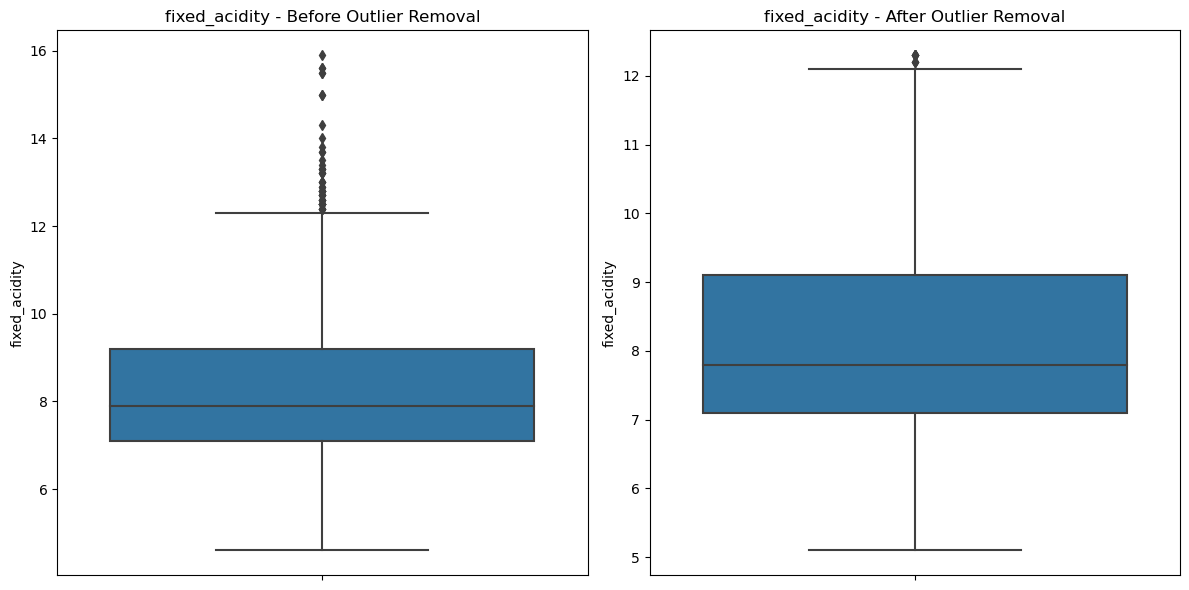

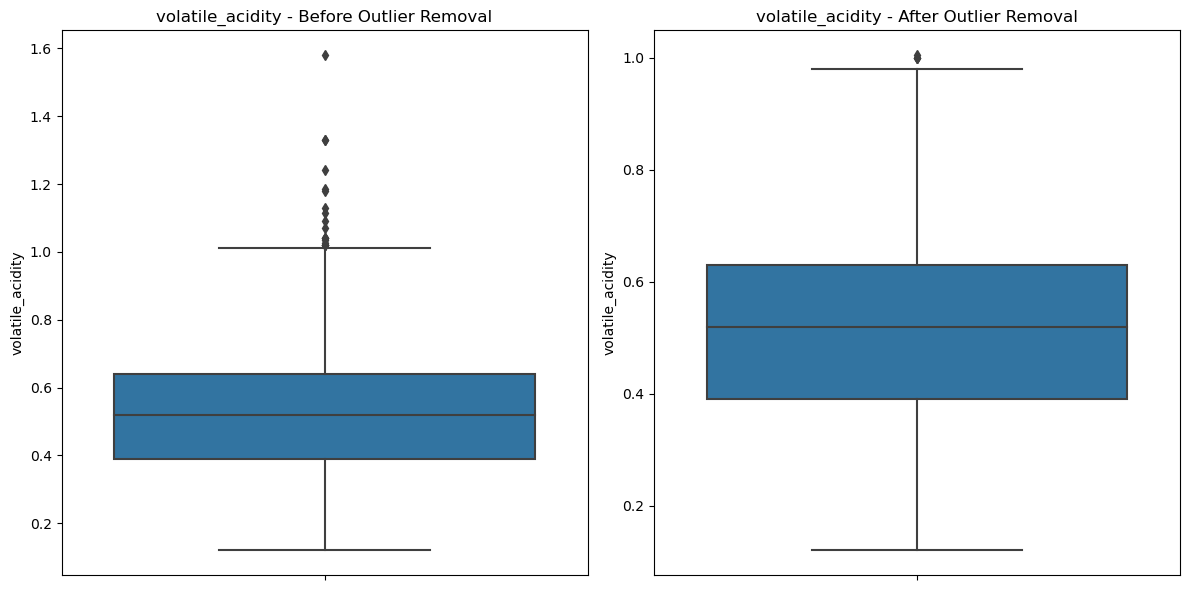

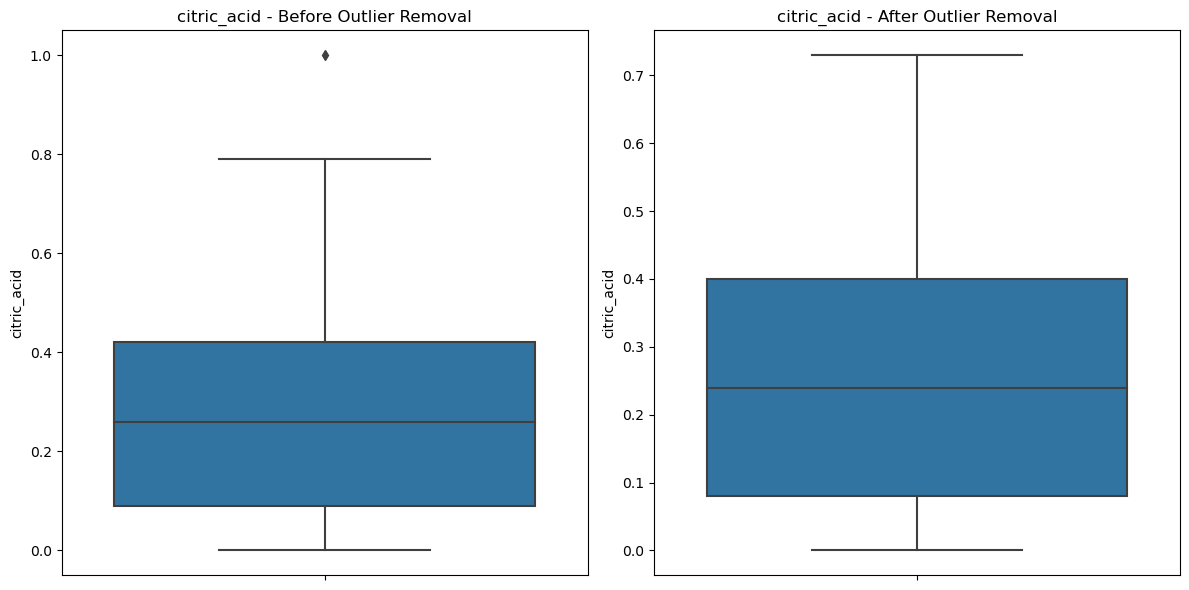

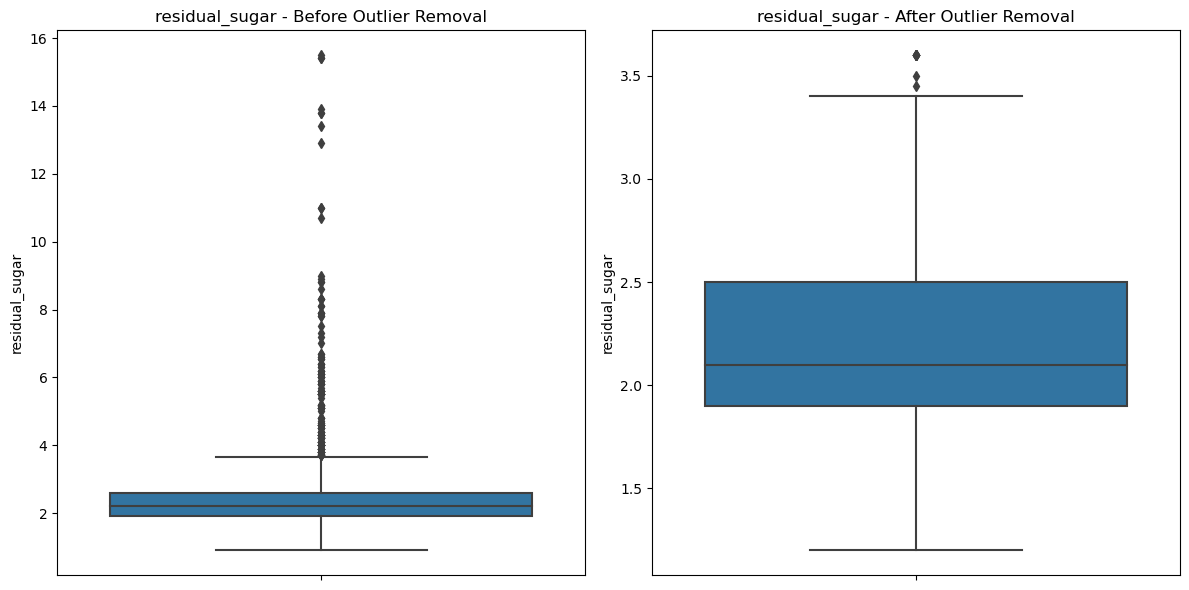

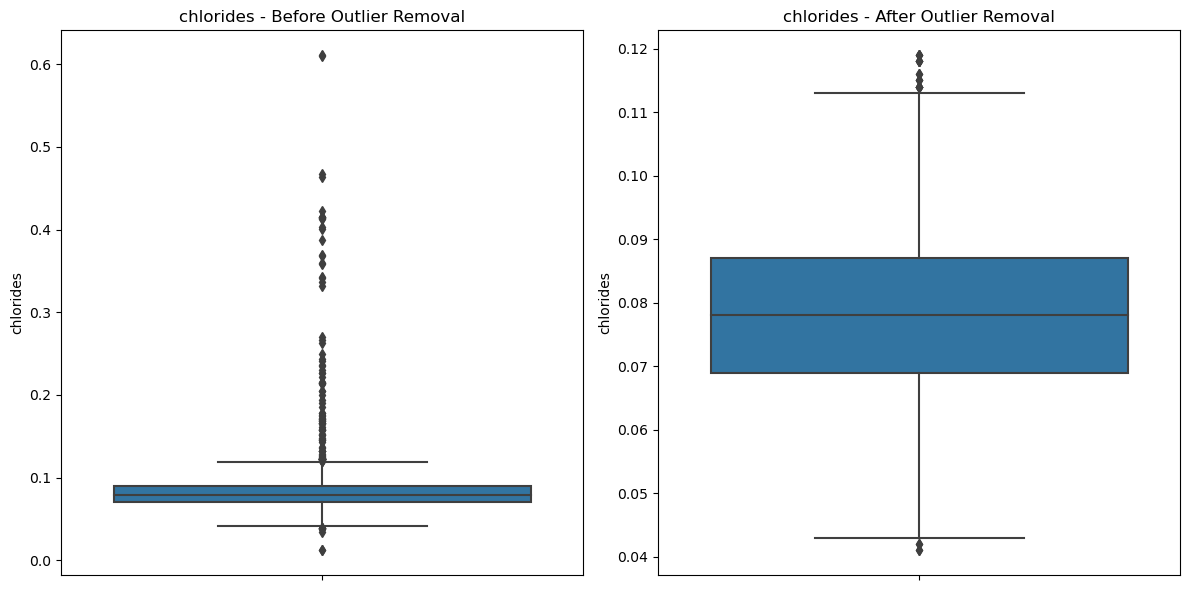

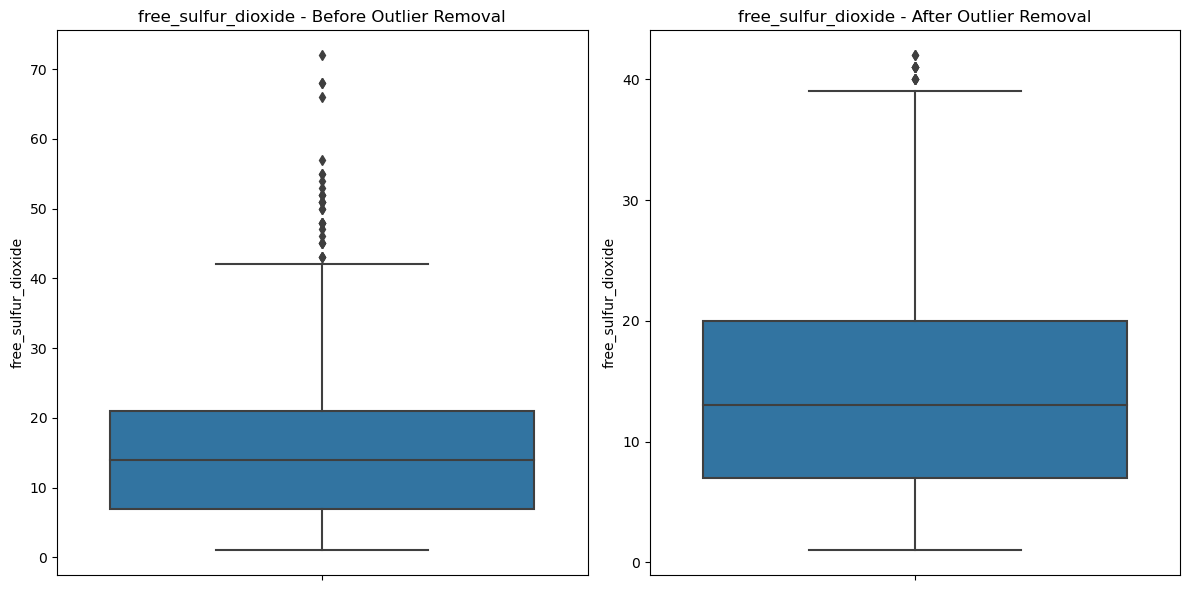

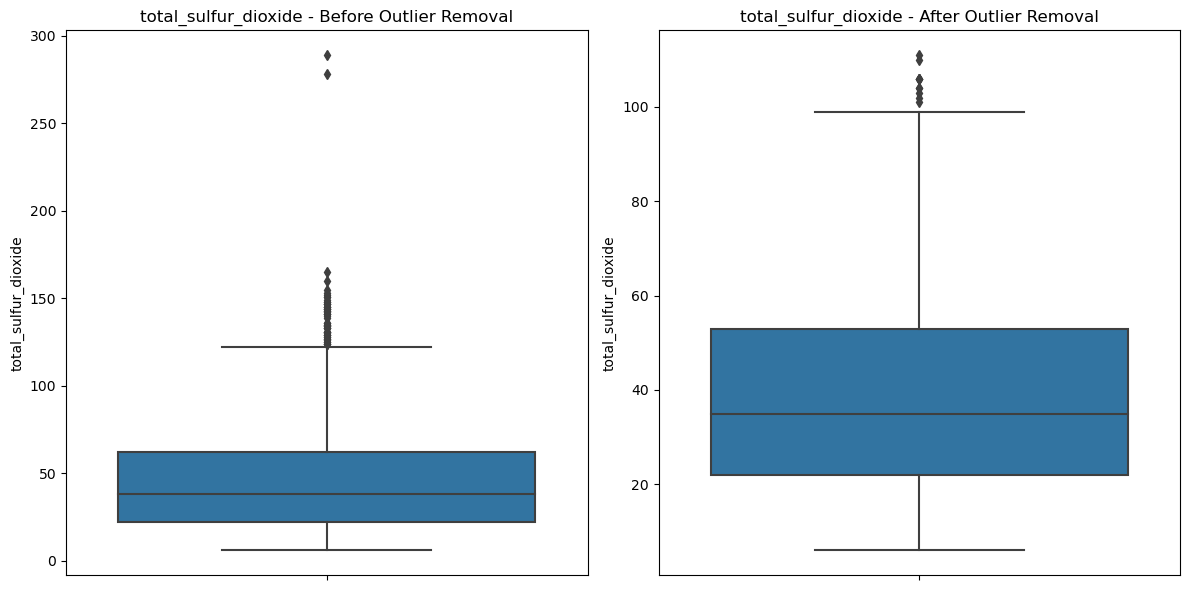

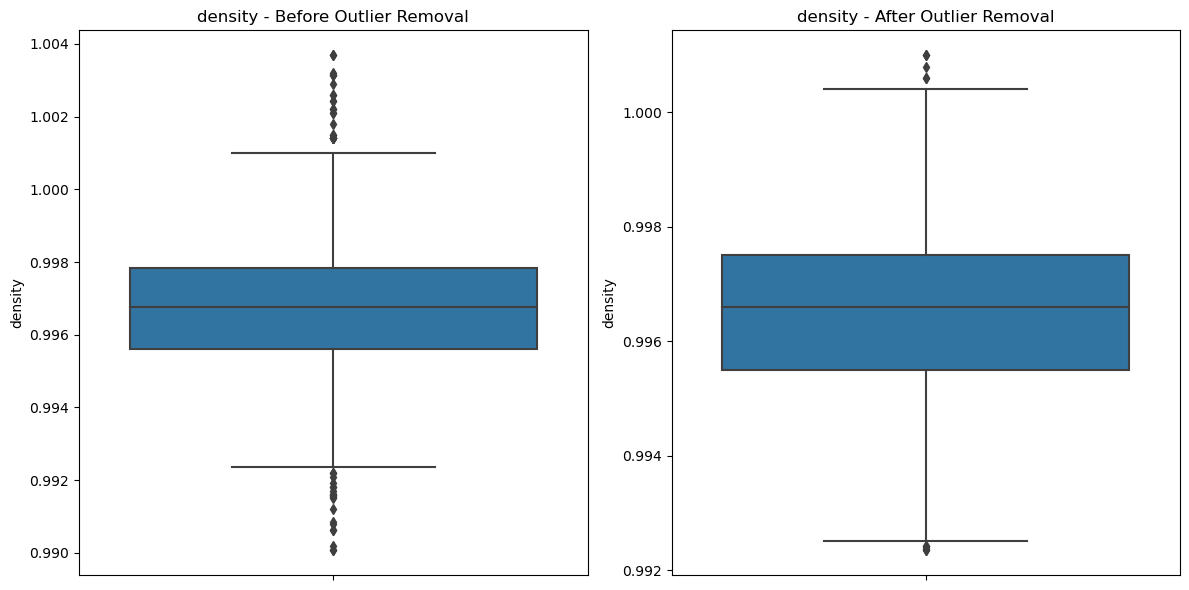

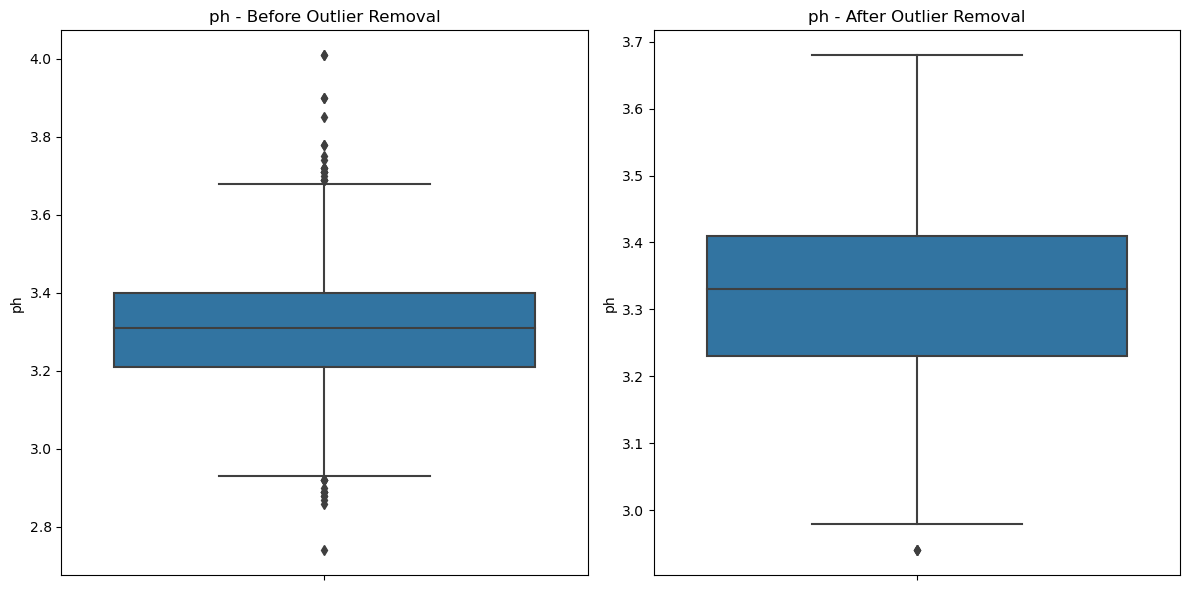

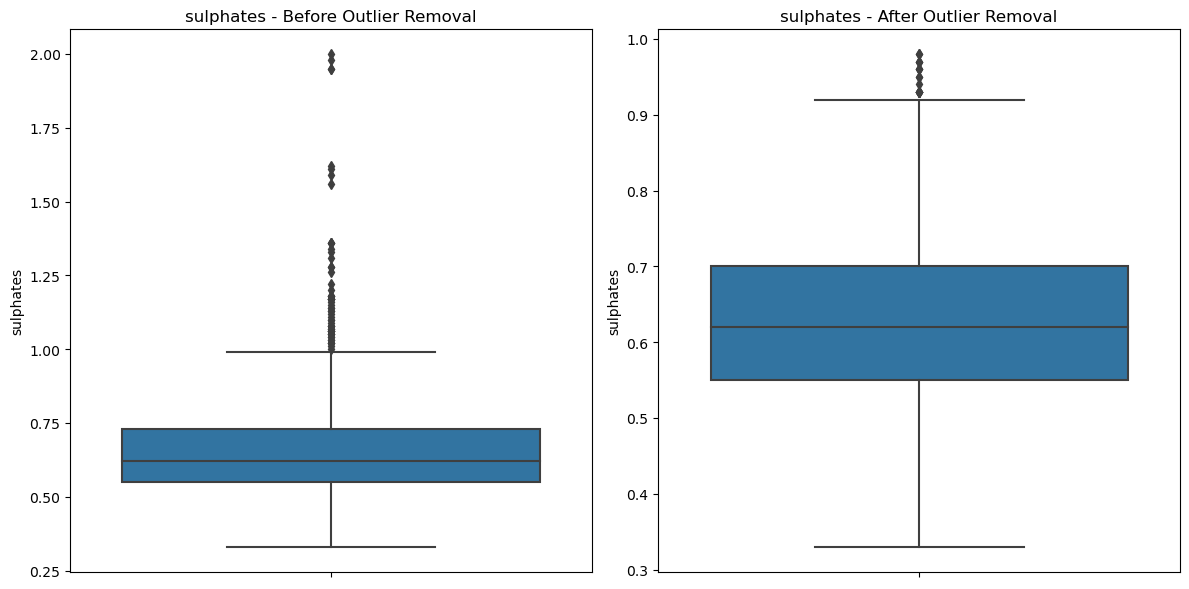

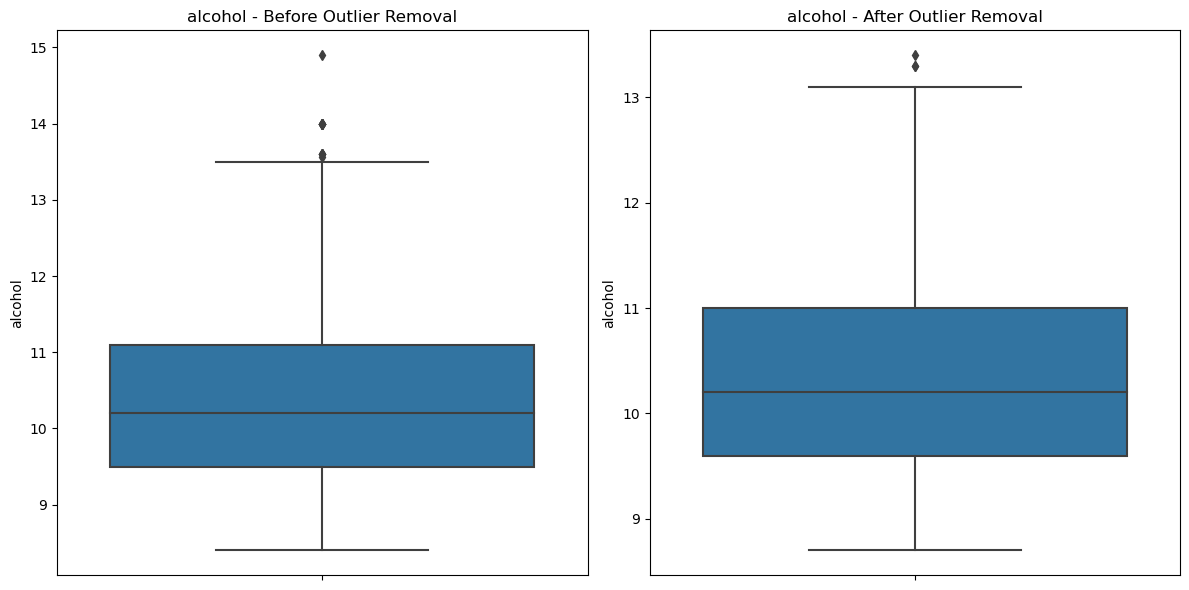

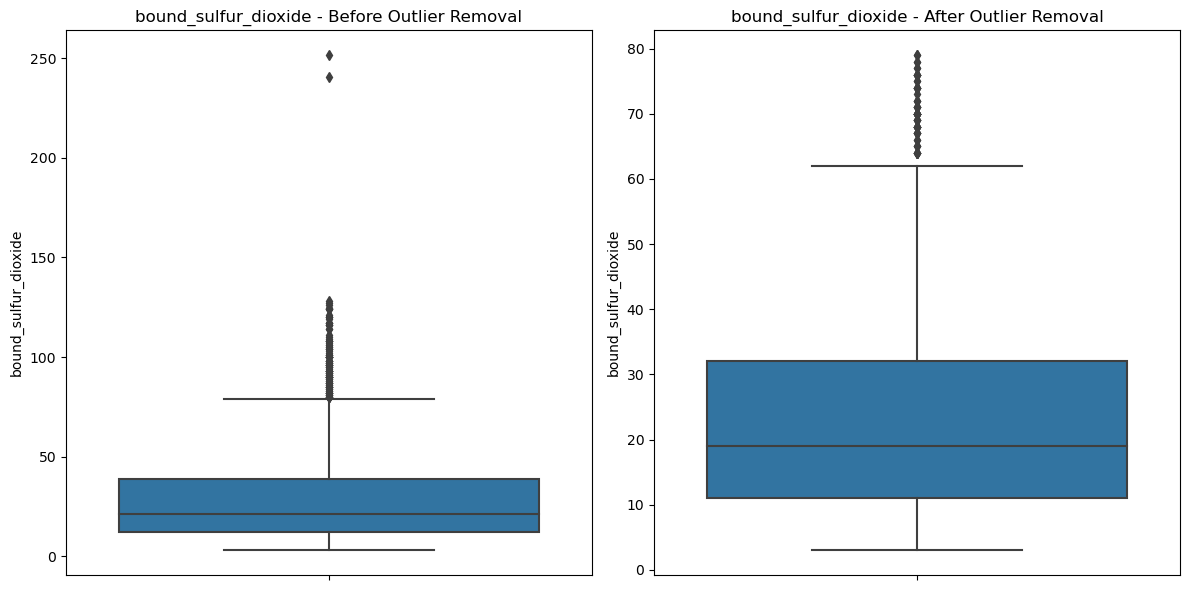

Column  Upper Bound  Lower Bound  Outliers Removed
0          fixed_acidity    12.350000     3.950000                49
1       volatile_acidity     1.015000     0.015000                19
2            citric_acid     0.915000    -0.405000                 1
3         residual_sugar     3.650000     0.850000               155
4              chlorides     0.120000     0.040000               112
5    free_sulfur_dioxide    42.000000   -14.000000                30
6   total_sulfur_dioxide   122.000000   -38.000000                55
7                density     1.001187     0.992248                45
8                     ph     3.685000     2.925000                35
9              sulphates     1.000000     0.280000                59
10               alcohol    13.500000     7.100000                13
11  bound_sulfur_dioxide    79.500000   -28.500000               116

In [10]:
# remove outliers
df_clean, summary = w.remove_outliers(df_red, exclude_columns=['Type', 'quality','White'])
summary

- I summarize again next to have a good look at the data post outlier removal

In [11]:
df_clean['Type'].value_counts()

Red    1145
Name: Type, dtype: int64

SUMMARY REPORT
          
          
Dataframe head: 
      fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
4898            7.4              0.70         0.00             1.9      0.076   
4899            7.8              0.88         0.00             2.6      0.098   
4900            7.8              0.76         0.04             2.3      0.092   

      free_sulfur_dioxide  total_sulfur_dioxide  density    ph  sulphates  \
4898                 11.0                  34.0   0.9978  3.51       0.56   
4899                 25.0                  67.0   0.9968  3.20       0.68   
4900                 15.0                  54.0   0.9970  3.26       0.65   

      alcohol  quality Type  White  bound_sulfur_dioxide  
4898      9.4        5  Red      0                  23.0  
4899      9.8        5  Red      0                  42.0  
4900      9.8        5  Red      0                  39.0  
          
          
          
Dataframe info: 
<class 'pandas.core.frame.

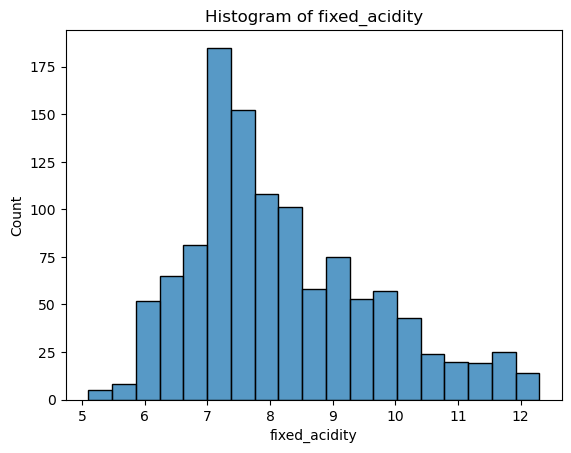

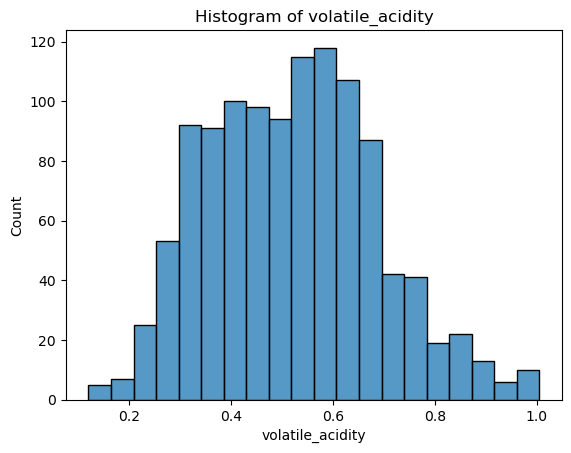

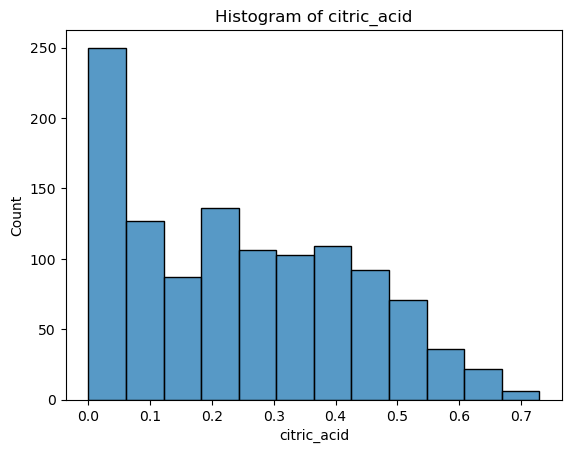

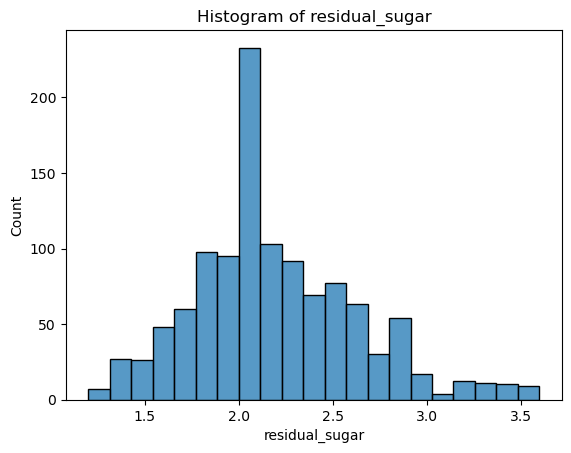

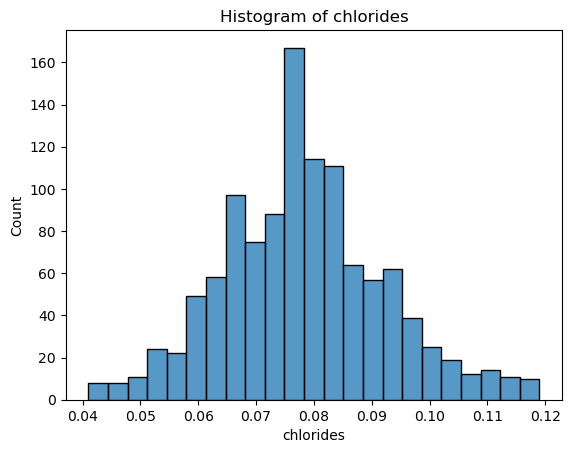

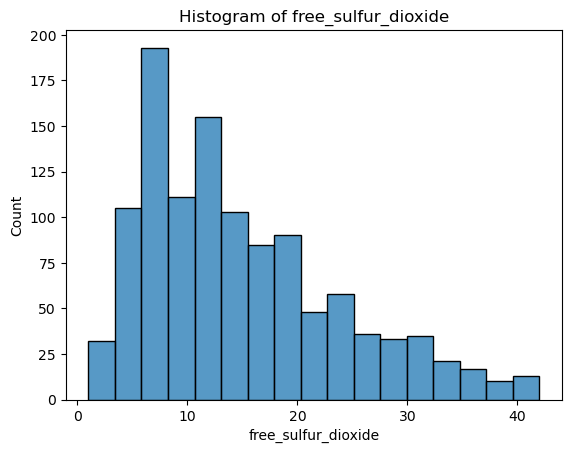

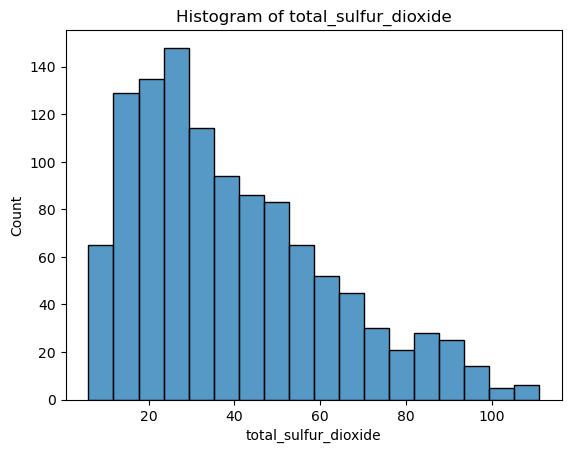

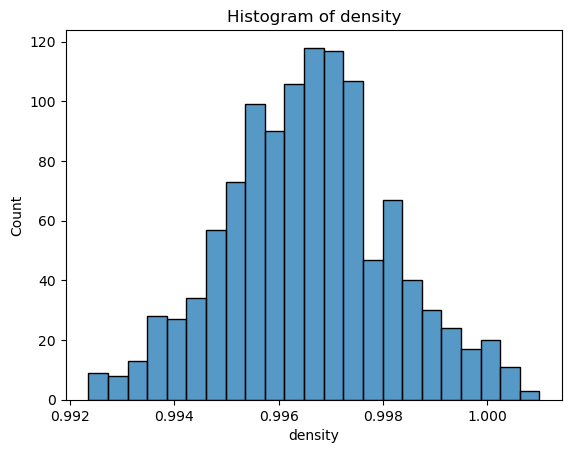

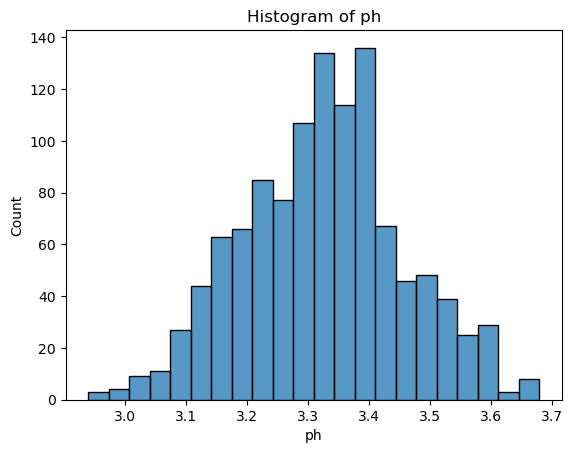

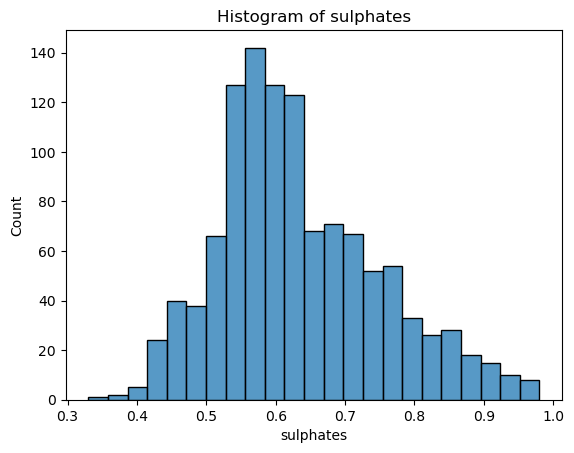

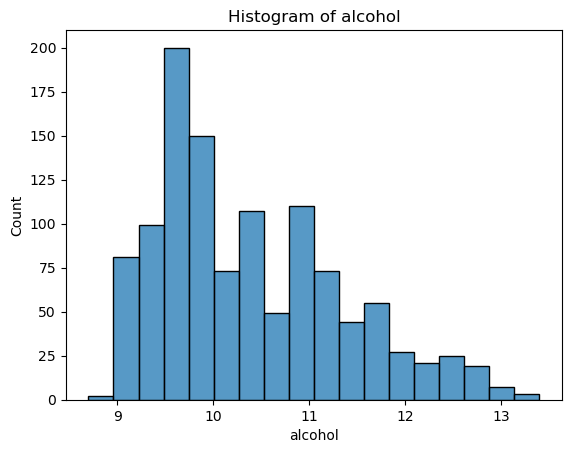

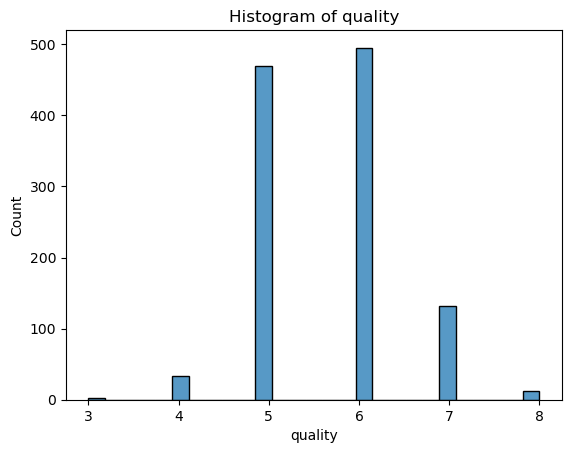

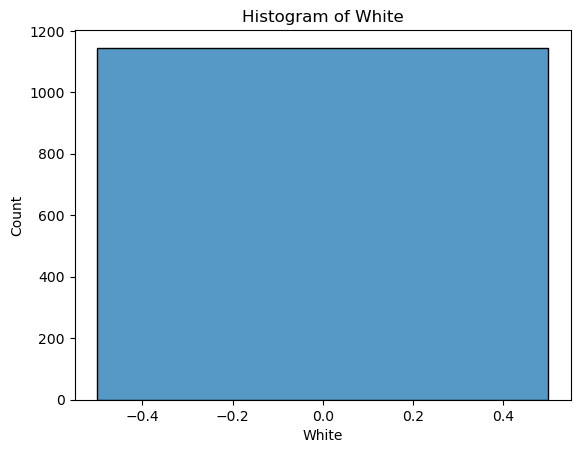

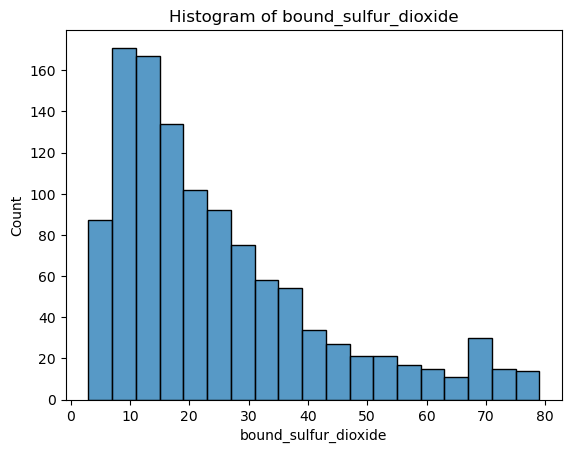

In [12]:
# summarize after outlier removal
# use summarize function
p.summarize2(df_clean)

- The graphs in the data post outlier removal are more centered and easier to visualize

In [13]:
# rename
df = df_clean
df

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
4898            7.4             0.700         0.00             1.9      0.076   
4899            7.8             0.880         0.00             2.6      0.098   
4900            7.8             0.760         0.04             2.3      0.092   
4901           11.2             0.280         0.56             1.9      0.075   
4902            7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
6492            6.2             0.600         0.08             2.0      0.090   
6493            5.9             0.550         0.10             2.2      0.062   
6494            6.3             0.510         0.13             2.3      0.076   
6495            5.9             0.645         0.12             2.0      0.075   
6496            6.0             0.310         0.47             3.6      0.067   

      free_sulfur_dioxide  total_sulfur_dioxide  density    ph  sulphates  \
4898                 11.0                  34.0  0.99780  3.51       0.56   
4899                 25.0                  67.0  0.99680  3.20       0.68   
4900                 15.0                  54.0  0.99700  3.26       0.65   
4901                 17.0                  60.0  0.99800  3.16       0.58   
4902                 11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
6492                 32.0                  44.0  0.99490  3.45       0.58   
6493                 39.0                  51.0  0.99512  3.52       0.76   
6494                 29.0                  40.0  0.99574  3.42       0.75   
6495                 32.0                  44.0  0.99547  3.57       0.71   
6496                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality Type  White  bound_sulfur_dioxide  
4898      9.4        5  Red      0                  23.0  
4899      9.8        5  Red      0                  42.0  
4900      9.8        5  Red      0                  39.0  
4901      9.8        6  Red      0                  43.0  
4902      9.4        5  Red      0                  23.0  
...       ...      ...  ...    ...                   ...  
6492     10.5        5  Red      0                  12.0  
6493     11.2        6  Red      0                  12.0  
6494     11.0        6  Red      0                  11.0  
6495     10.2        5  Red      0                  12.0  
6496     11.0        6  Red      0                  24.0  

[1145 rows x 15 columns]

# Explore

 #### Big Question: What are the drivers of wine quality?

- First step is to split into train, validate and test. I will then explore the pairwise relationships and examin the target. 



In [14]:
#split into train, validate and test
train, validate, test = p.split_data(df)
train

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
5281            8.3             0.260         0.42             2.0      0.080   
6034           10.4             0.520         0.45             2.0      0.080   
5333           12.3             0.390         0.63             2.3      0.091   
6213            7.5             0.630         0.27             2.0      0.083   
6035           10.4             0.520         0.45             2.0      0.080   
...             ...               ...          ...             ...        ...   
5863            8.3             0.340         0.40             2.4      0.065   
6396            6.6             0.895         0.04             2.3      0.068   
5441           11.2             0.660         0.24             2.5      0.085   
6001            7.4             0.490         0.27             2.1      0.071   
5922            7.7             0.580         0.01             1.8      0.088   

      free_sulfur_dioxide  total_sulfur_dioxide  density    ph  sulphates  \
5281                 11.0                  27.0  0.99740  3.21       0.80   
6034                  6.0                  13.0  0.99774  3.22       0.76   
5333                  6.0                  18.0  1.00040  3.16       0.49   
6213                 17.0                  91.0  0.99616  3.26       0.58   
6035                  6.0                  13.0  0.99774  3.22       0.76   
...                   ...                   ...      ...   ...        ...   
5863                 24.0                  48.0  0.99554  3.34       0.86   
6396                  7.0                  13.0  0.99582  3.53       0.58   
5441                 16.0                  53.0  0.99930  3.06       0.72   
6001                 14.0                  25.0  0.99388  3.35       0.63   
5922                 12.0                  18.0  0.99568  3.32       0.56   

      alcohol  quality Type  White  bound_sulfur_dioxide  
5281      9.4        6  Red      0                  16.0  
6034     11.4        6  Red      0                   7.0  
5333      9.5        5  Red      0                  12.0  
6213      9.8        6  Red      0                  74.0  
6035     11.4        6  Red      0                   7.0  
...       ...      ...  ...    ...                   ...  
5863     11.0        6  Red      0                  24.0  
6396     10.8        6  Red      0                   6.0  
5441     11.0        6  Red      0                  37.0  
6001     12.0        6  Red      0                  11.0  
5922     10.5        7  Red      0                   6.0  

[687 rows x 15 columns]

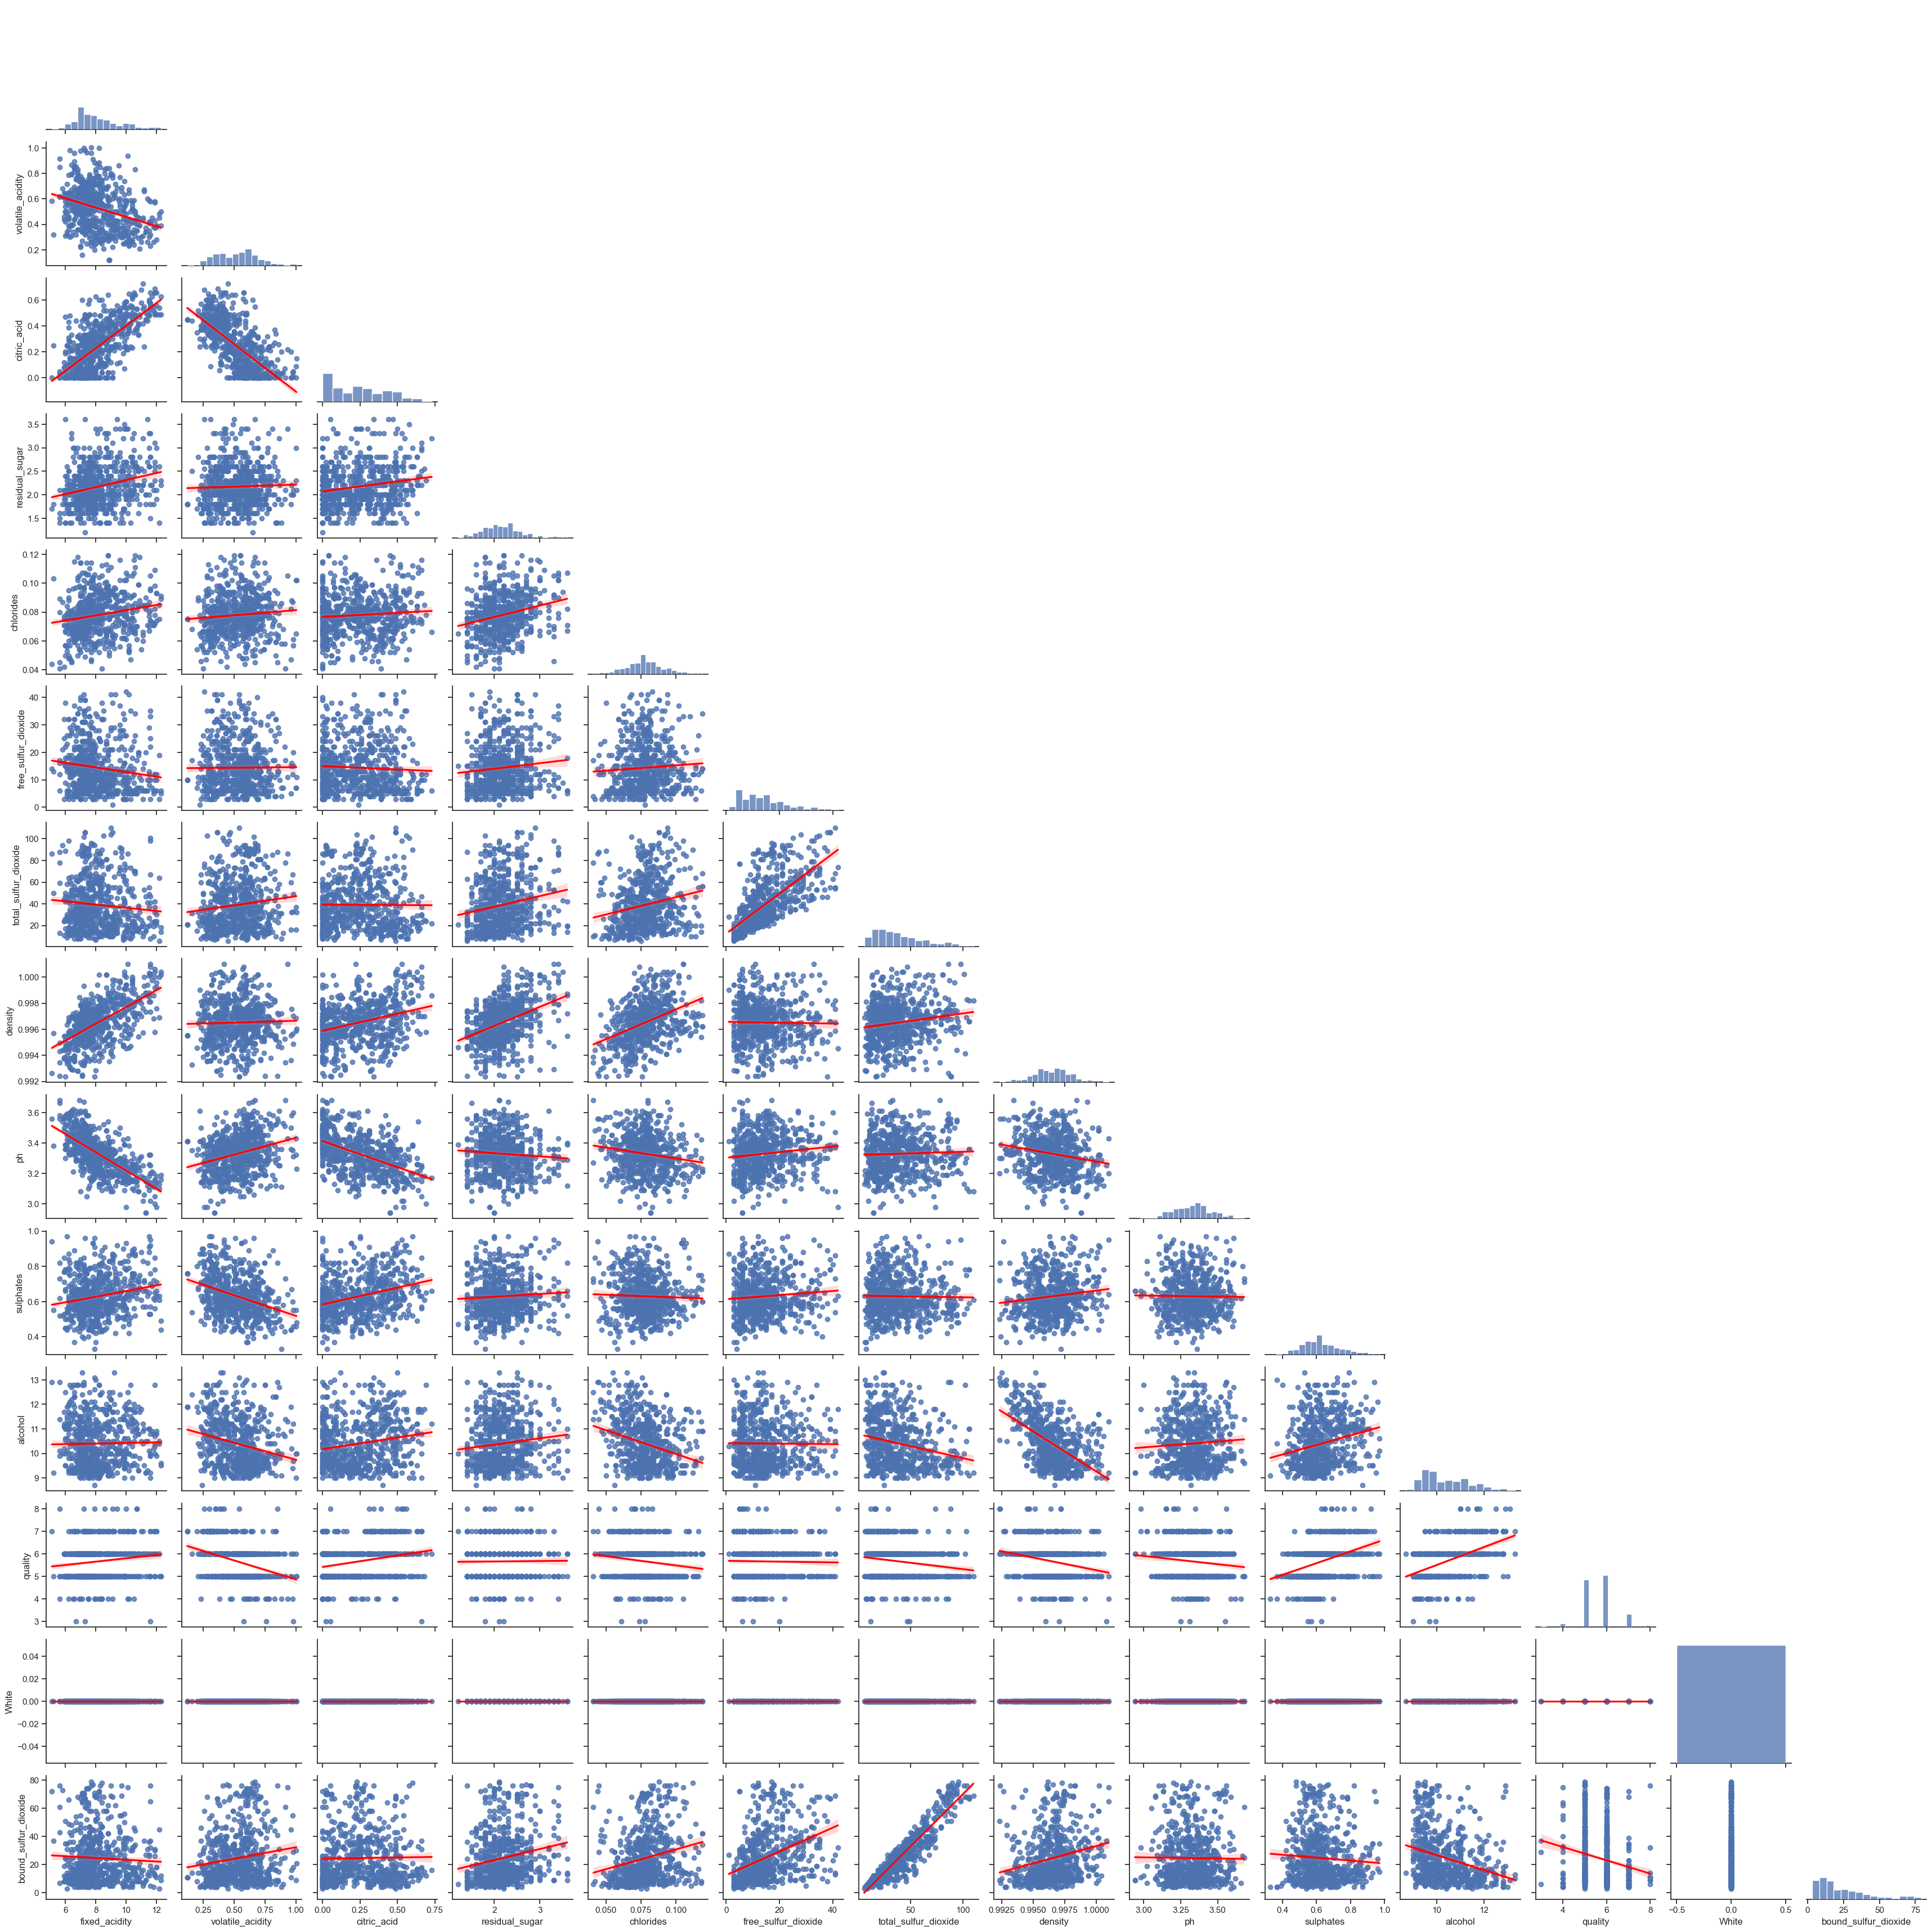

In [15]:
# View pairwise relationships
exp.plot_variable_pairs(train)

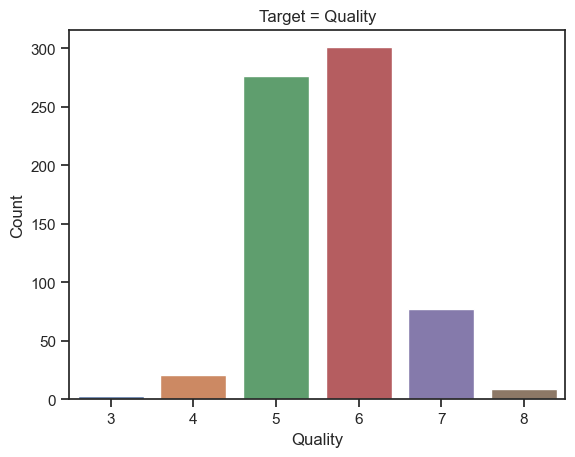

In [16]:
# View Target
sns.countplot(x=train.quality)
plt.title('Target = Quality')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()

In [17]:
# check for normal distribution
tstat,pvalue = stats.shapiro(train.quality)
pvalue

9.51752399109646e-25

- Shapiro test confirms a normal distribution of the target
- The graph visually makes sense, the lowest and highest quality ratings have the least amount of wines. There are the exceptional few on both ends of the specturm.



# Set parameters for stats test
- For all stats test alpha is 0.05, giving a 95% confidence level that our assumptions are not guesses.
- The Shapiro test for normalcy will be used to confirm normalcy of the data, although there are enough data points to use the Central Limit Theorm.
- A function is used to graph the continuous variable vs. categorical variable through each of the variables. 

In [18]:
# set alpha
alpha = 0.05

- for ttest stats testing, the overall mean of the target will be used throughout

In [19]:
# set overall mean for ttest that follow
overall_mean = train.quality.mean()
overall_mean

5.662299854439593

# Is there a relationship betweeen Quality (Categorical) vs. Fixed acidity(Continuous)?

$H_{0}$ : there is not a relationship between wine quality and fixed acidity 

$H_{a}$ : there is a relationship between wine quality and fixed acidity

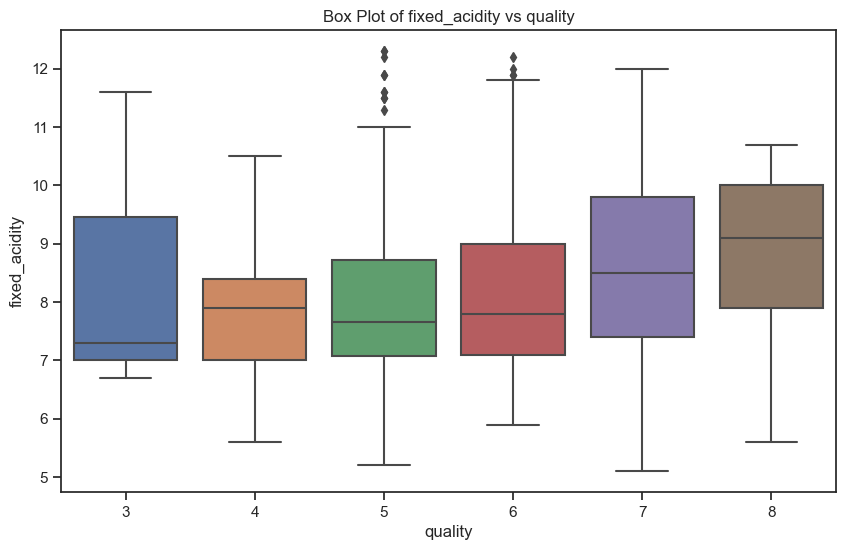

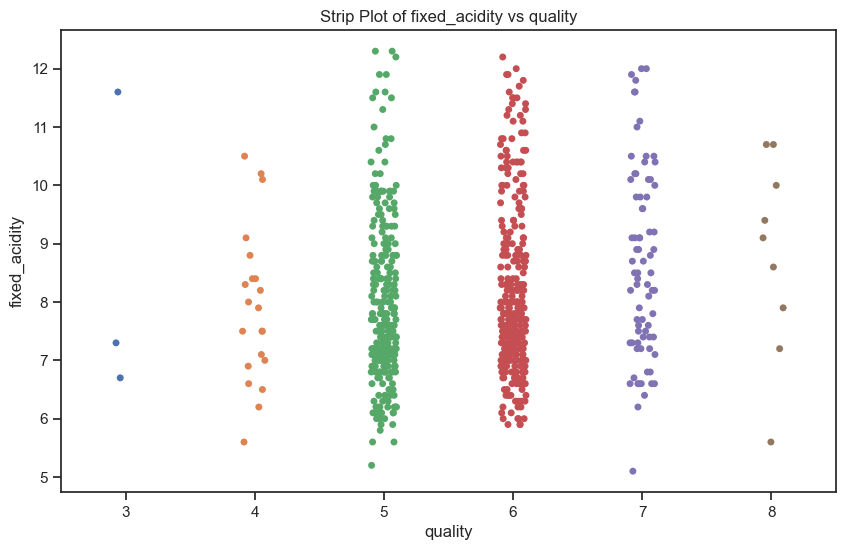

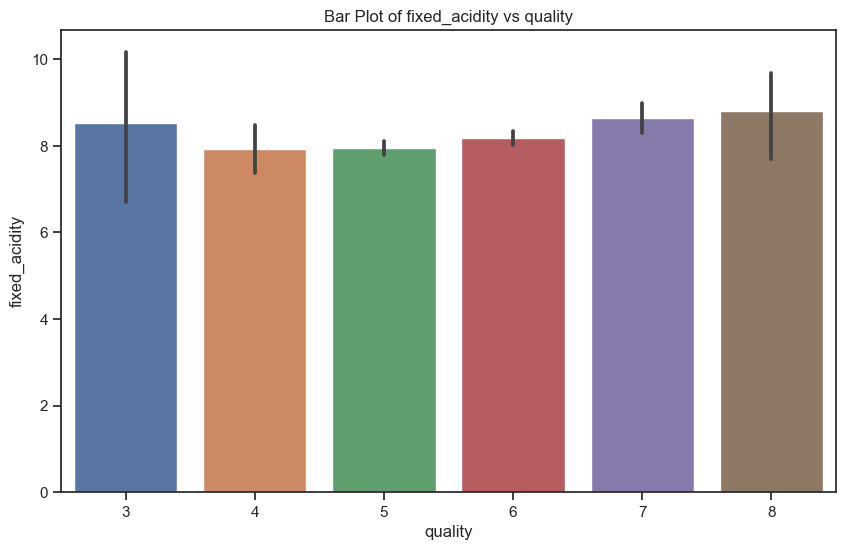

In [20]:
# quality vs. fixed_acidity
exp.plot_categorical_and_continuous_vars(train, 'quality','fixed_acidity')

In [21]:
# check for normal distribution
stats.shapiro(train.fixed_acidity)

ShapiroResult(statistic=0.9452184438705444, pvalue=3.012066312853474e-15)

In [22]:
# stats test
tstat, pval = stats.ttest_1samp(train.fixed_acidity, overall_mean)
tstat, pval

(44.669611483913776, 3.020956925117394e-205)

In [23]:
# p-value print statement
if ((pval) < alpha):
    print('we can reject the null hypothesis')
else:
    print('we fail to reject the null hypthesis')

we can reject the null hypothesis


- The fixed_acidity variable is normally distributed, and based on the ttest pvalue < alpha, we can infer a relationship with quality.
- The strip plot shows an interesting concentration of data around the middle of the quality spectrum.

# Is there a relationship between Quality (Categorical) vs. Volatile Acidity(Continuous)?

$H_{0}$ : there is not a relationship between wine quality and volatile acidity 

$H_{a}$ : there is a relationship between wine quality and volatile acidity

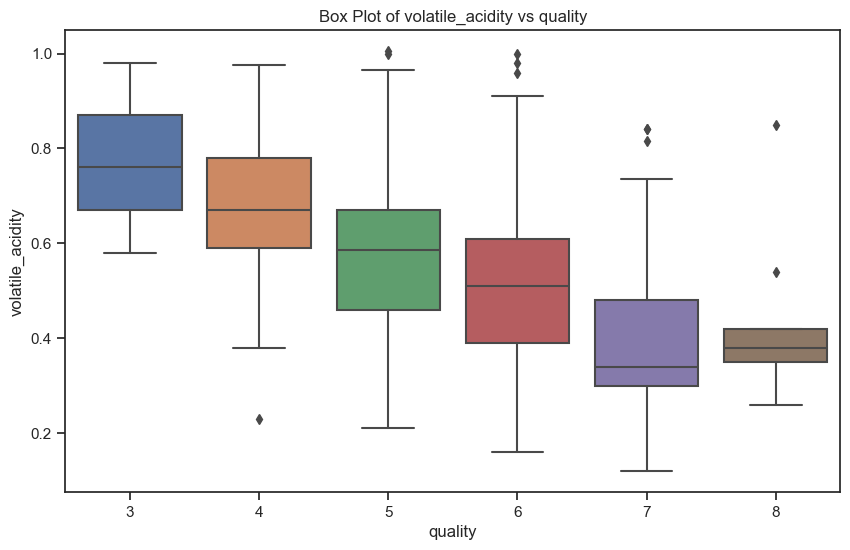

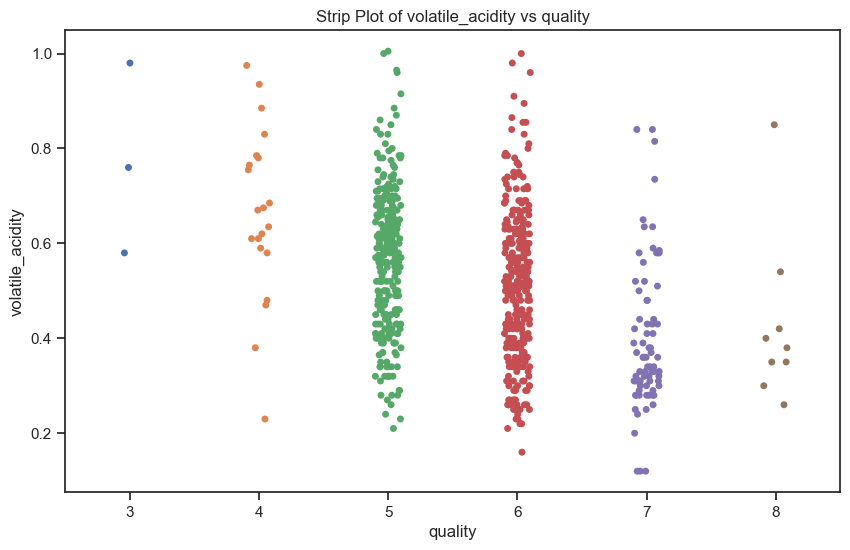

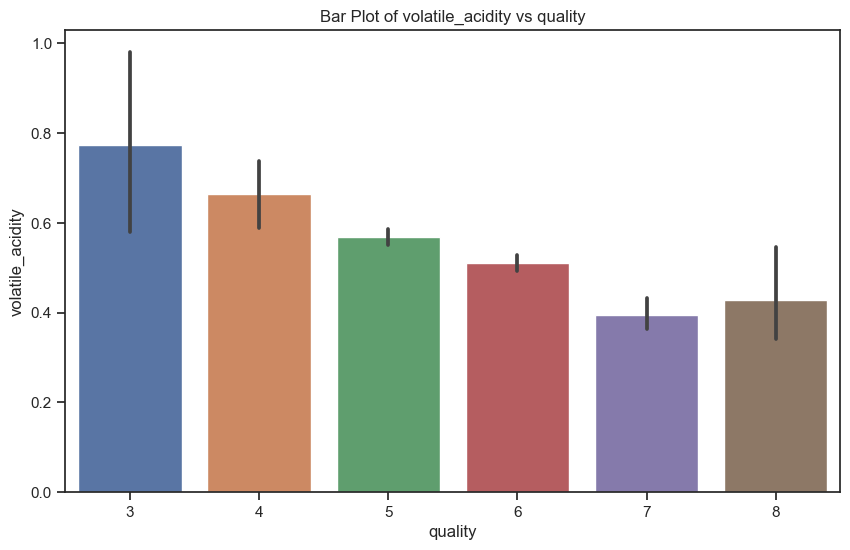

In [24]:
# quality vs. volatile_acidity
exp.plot_categorical_and_continuous_vars(train, 'quality', 'volatile_acidity')

In [25]:
# check for normal distribution
stats.shapiro(train.volatile_acidity)

ShapiroResult(statistic=0.9890868663787842, pvalue=5.431699537439272e-05)

In [26]:
# stats test
tstat, pval = stats.ttest_1samp(train.volatile_acidity, overall_mean)
tstat, pval

(-810.6269747976826, 0.0)

In [27]:
# p-value print statement
if ((pval) < alpha):
    print('we can reject the null hypothesis')
else:
    print('we fail to reject the null hypthesis')

we can reject the null hypothesis


- The volatile_acidity variable is normally distributed, and based on the ttest pvalue < alpha, we can infer a relationship with quality.
- The strip plot shows an interesting concentration of data around the middle of the quality spectrum.

# Is there a relationship between Quality (Categorical) vs. Citric Acid (Continuous)?

$H_{0}$ : there is not a relationship between wine quality and citric acid 

$H_{a}$ : there is a relationship between wine quality and citric acid

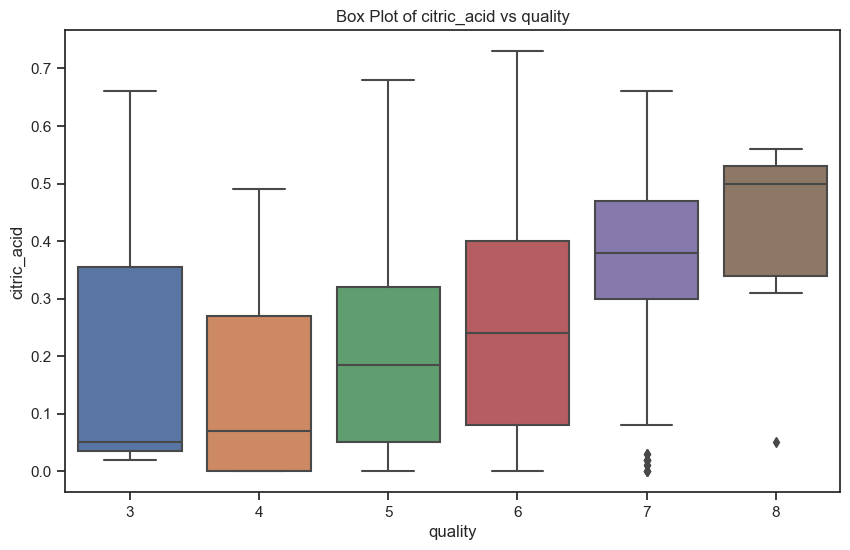

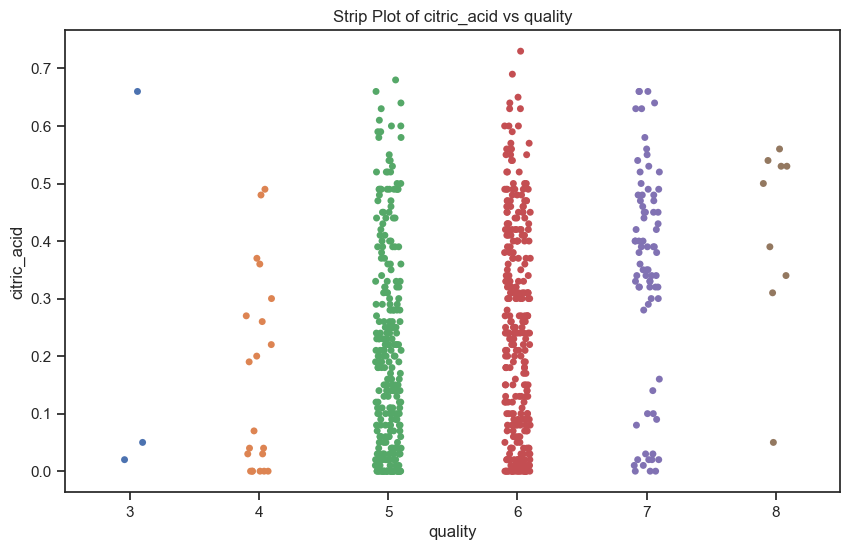

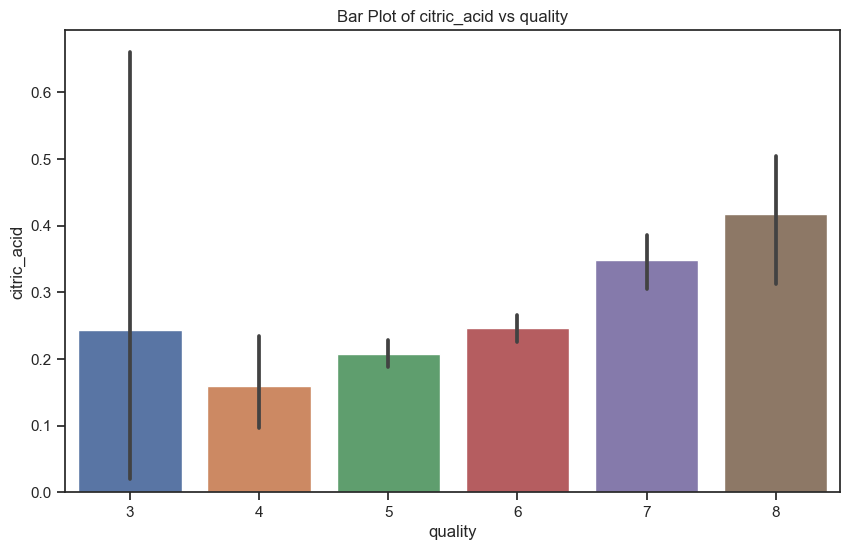

In [28]:
# quality vs. citric_acid
exp.plot_categorical_and_continuous_vars(train, 'quality', 'citric_acid')

In [29]:
# check for normal distribution
stats.shapiro(train.citric_acid)

ShapiroResult(statistic=0.94050133228302, pvalue=5.983103514412252e-16)

In [30]:
# stats test
tstat, pval = stats.ttest_1samp(train.citric_acid, overall_mean)
tstat, pval

(-764.3492156964741, 0.0)

In [31]:
# p-value print statement
if ((pval) < alpha):
    print('we can reject the null hypothesis')
else:
    print('we fail to reject the null hypthesis')

we can reject the null hypothesis


- The citric_acid variable is normally distributed, and based on the ttest pvalue < alpha, we can infer a relationship with quality.
- The box plot shows small variations of data and seem to bookend quality.

# Is there a relationship between Quality (Categorical) vs. Residual sugar (Continuous)?

$H_{0}$ : there is not a relationship between wine quality and residual sugar

$H_{a}$ : there is a relationship between wine quality and residual sugar

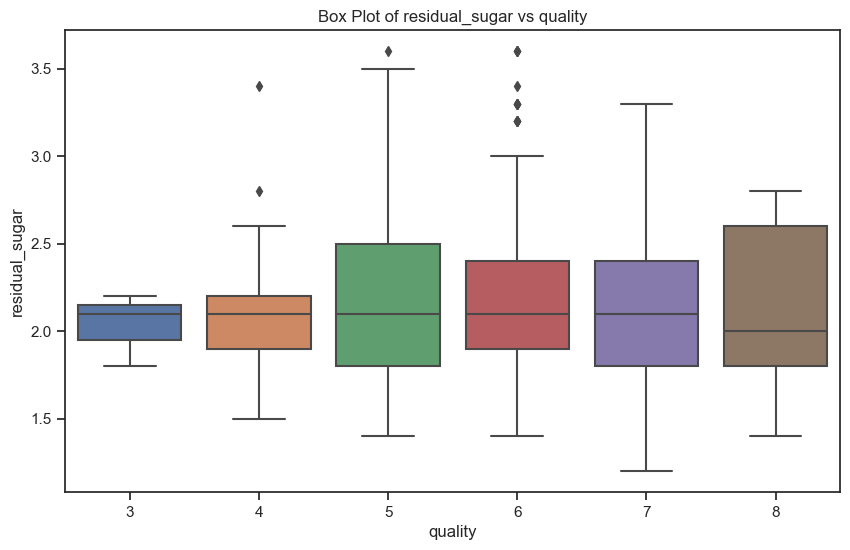

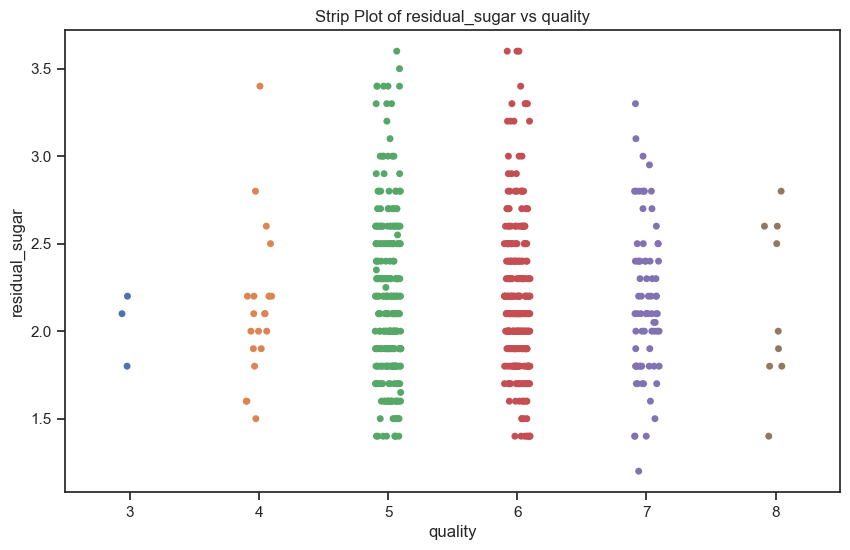

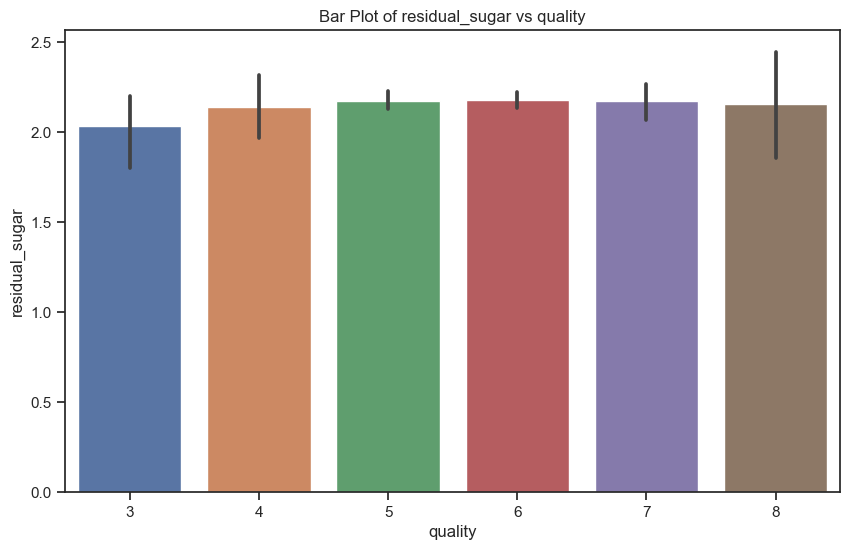

In [32]:
# quality vs. residual_sugar
exp.plot_categorical_and_continuous_vars(train, 'quality', 'residual_sugar')

In [33]:
# check for normal distribution
stats.shapiro(train.residual_sugar)

ShapiroResult(statistic=0.9639848470687866, pvalue=5.966235318288771e-12)

In [34]:
# stats test
tstat, pval = stats.ttest_1samp(train.residual_sugar, overall_mean)
tstat, pval

(-210.55523467475538, 0.0)

In [35]:
# p-value print statement
if ((pval) < alpha):
    print('we can reject the null hypothesis')
else:
    print('we fail to reject the null hypthesis')

we can reject the null hypothesis


- The residual sugar variable is normally distributed, and based on the ttest pvalue < alpha, we can infer a relationship with quality.
- The plots show large amounts of residual sugar in the 5, 6 quality category. Residual sugar also seems to be higher in the lower to mid quality range. 

# Is there a relationship between Quality (Categorical) vs. Chlorides (Continuous)?

$H_{0}$ : there is not a relationship between wine quality and chlorides

$H_{a}$ : there is a relationship between wine quality and chlorides

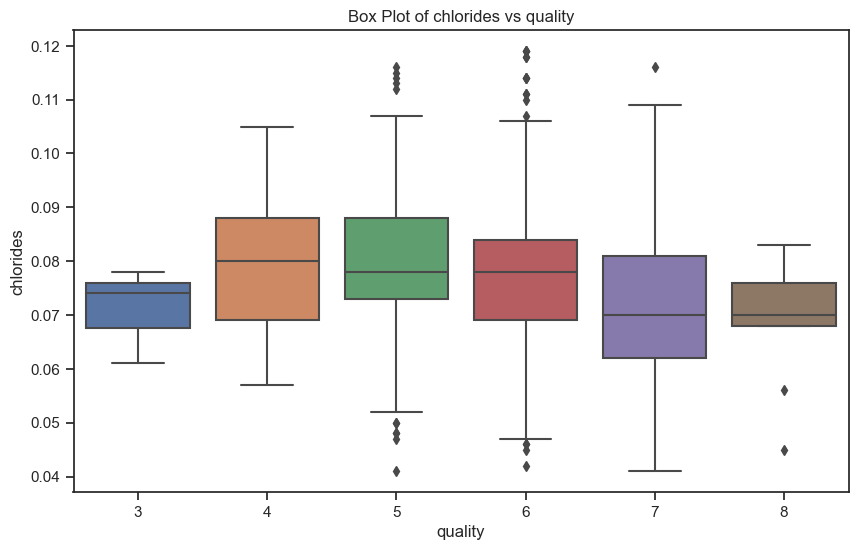

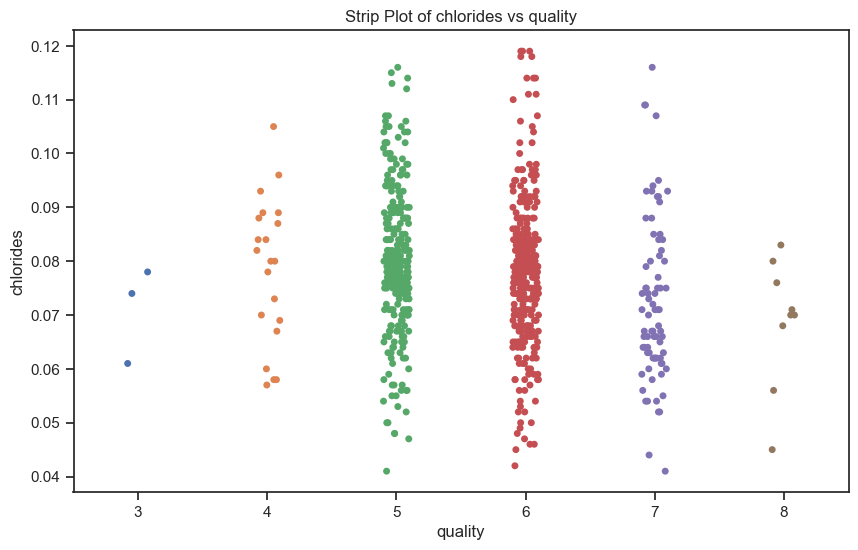

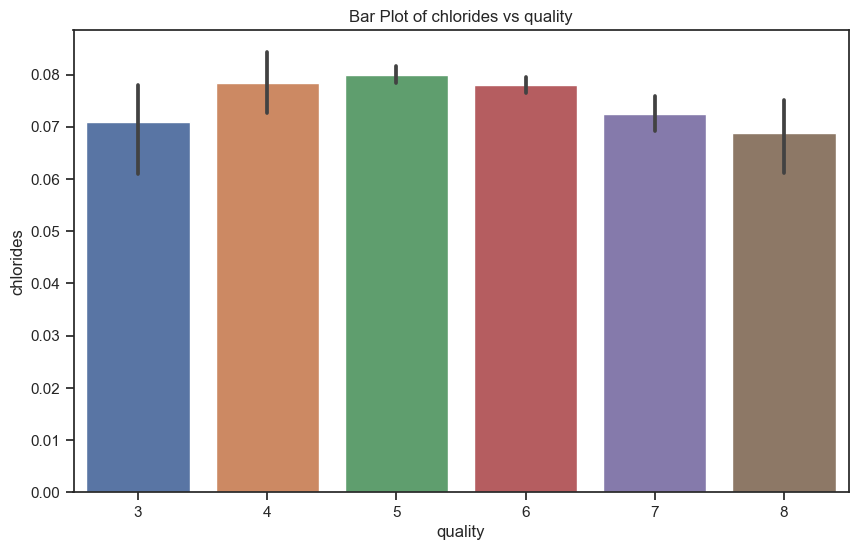

In [36]:
# quality vs. chlorides
exp.plot_categorical_and_continuous_vars(train, 'quality', 'chlorides')

In [37]:
# check for normal distribution
stats.shapiro(train.chlorides)

ShapiroResult(statistic=0.9896597266197205, pvalue=9.23719271668233e-05)

In [38]:
# stats test
tstat, pval = stats.ttest_1samp(train.chlorides, overall_mean)
tstat, pval

(-10453.266126885406, 0.0)

In [39]:
# p-value print statement
if ((pval) < alpha):
    print('we can reject the null hypothesis')
else:
    print('we fail to reject the null hypthesis')

we can reject the null hypothesis


- The chlorides variable is normally distributed, and based on the ttest pvalue < alpha, we can infer a relationship with quality.
- The various plots show a decreasing trend of chlorides to quality as quality score increases.

# Is there a relationship between Quality (Categorical) vs. Free Sulfur Dioxide (Continuous)?

$H_{0}$ : there is not a relationship between wine quality and Free Sulfur Dioxide

$H_{a}$ : there is a relationship between wine quality and Free Sulfur Dioxide

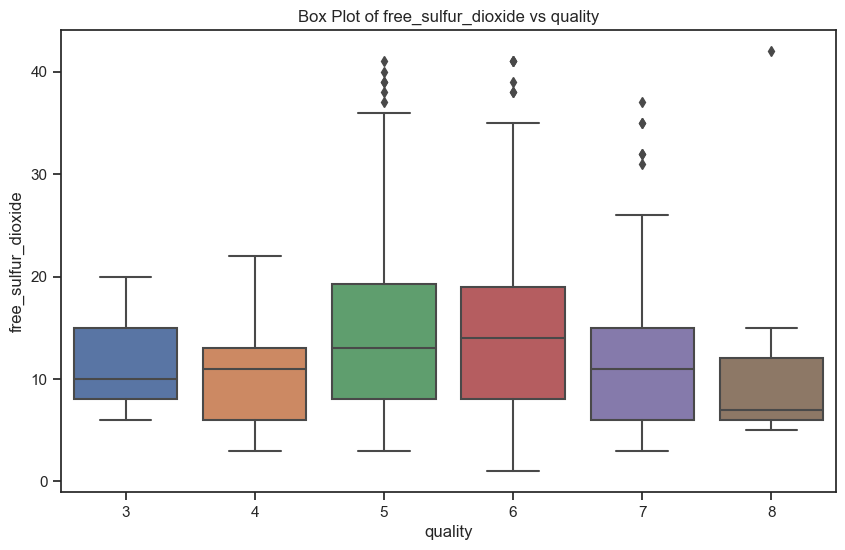

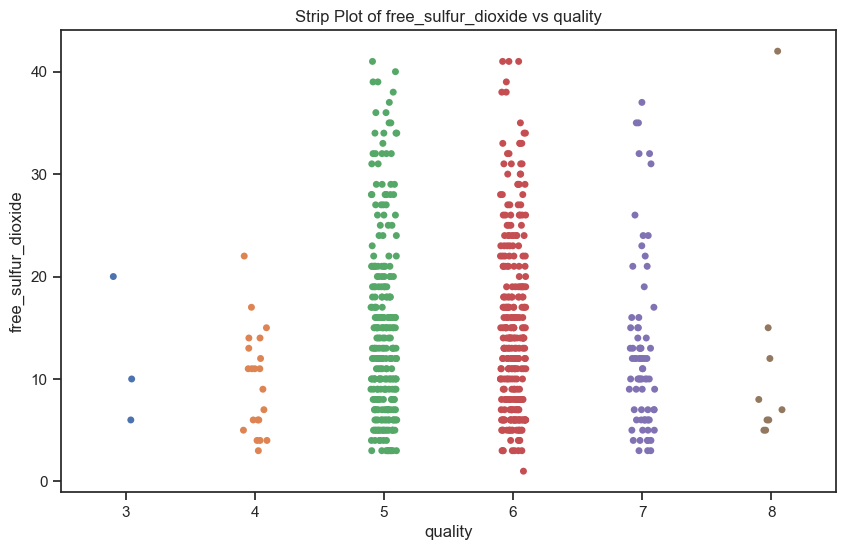

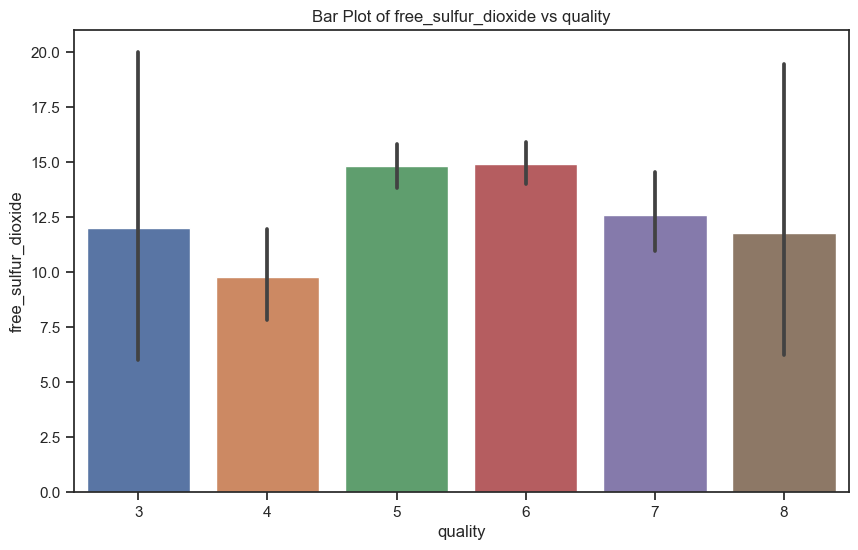

In [40]:
# quality vs. free_sulfur_dioxide
exp.plot_categorical_and_continuous_vars(train, 'quality', 'free_sulfur_dioxide')

In [41]:
# check for normal distribution
stats.shapiro(train.free_sulfur_dioxide)

ShapiroResult(statistic=0.9198843836784363, pvalue=1.2726705187671896e-18)

In [42]:
# stats test
tstat, pval = stats.ttest_1samp(train.free_sulfur_dioxide, overall_mean)
tstat, pval

(26.581926918250065, 1.4360826648465564e-107)

In [43]:
# p-value print statement
if ((pval) < alpha):
    print('we can reject the null hypothesis')
else:
    print('we fail to reject the null hypthesis')

we can reject the null hypothesis


- The free sulfur dioxide variable is normally distributed, and based on the ttest pvalue < alpha, we can infer a relationship with quality.
- The various plots show a slight increasing trend of free_sulfur_dioxide to quality as quality score increases.

# Is there a relationship between Quality (Categorical) vs. Total Sulfur Dioxide (Continuous)?

$H_{0}$ : there is not a relationship between wine quality and total sulfur dioxide

$H_{a}$ : there is a relationship between wine quality and total sulfur dioxide

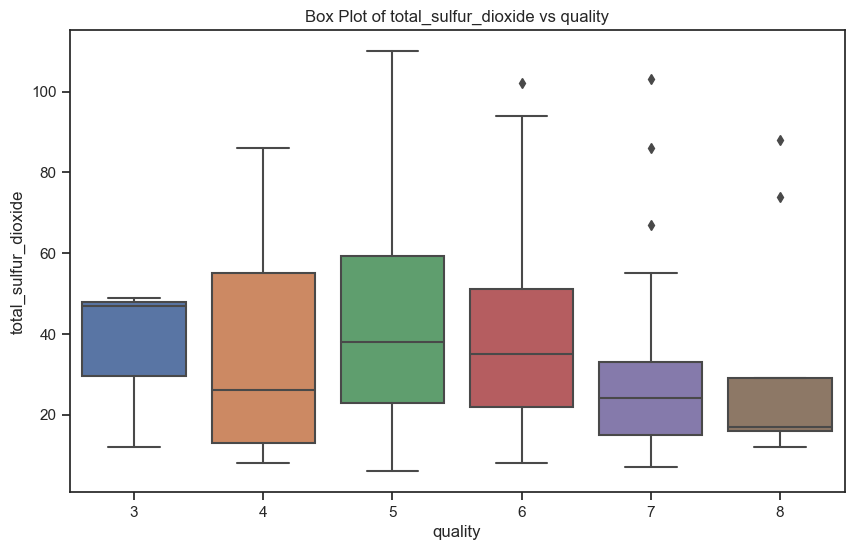

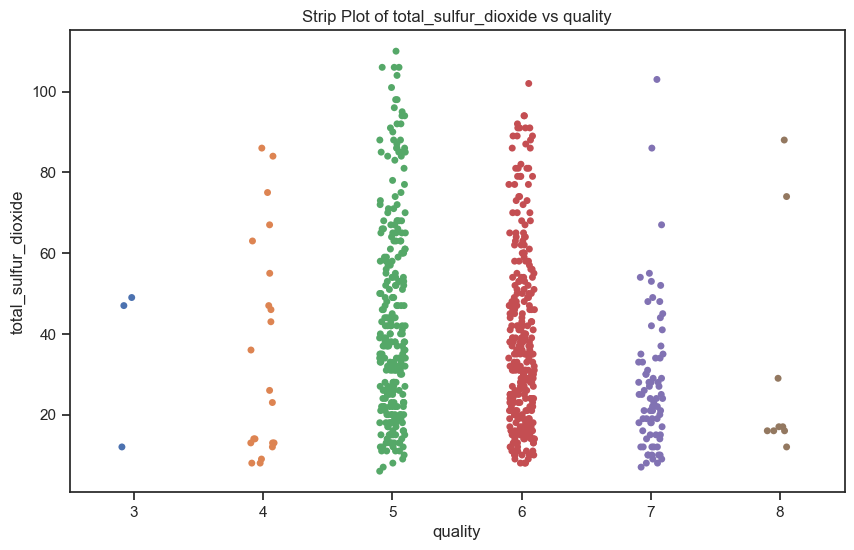

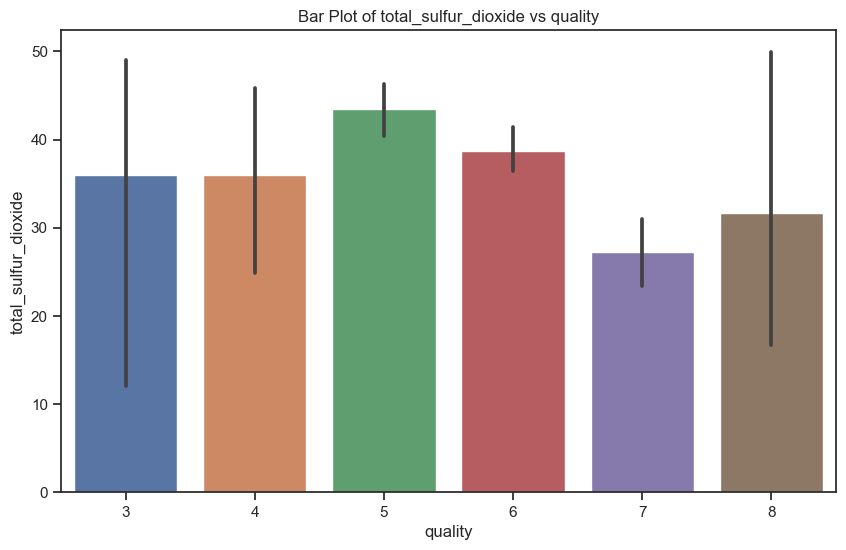

In [44]:
# quality vs. total_sulfur_dioxide
exp.plot_categorical_and_continuous_vars(train, 'quality', 'total_sulfur_dioxide')

In [45]:
# check for normal distribution
stats.shapiro(train.total_sulfur_dioxide)

ShapiroResult(statistic=0.9251341819763184, pvalue=5.410927944350807e-18)

In [46]:
# stats test
tstat, pval = stats.ttest_1samp(train.total_sulfur_dioxide, overall_mean)
tstat, pval

(37.81037258891238, 6.341289642329331e-170)

In [47]:
# p-value print statement
if ((pval) < alpha):
    print('we can reject the null hypothesis')
else:
    print('we fail to reject the null hypthesis')

we can reject the null hypothesis


- The total sulfur dioxide variable is normally distributed, and based on the ttest pvalue < alpha, we can infer a relationship with quality.
- The various plots show a relatively stable trend of total_sulfur_dioxide to quality.

# Is there a relationship between Quality (Categorical) vs. Bound Sulfur Dioxide (Continuous)?

$H_{0}$ : there is not a relationship between wine quality and bound sulfur dioxide

$H_{a}$ : there is a relationship between wine quality and bound sulfur dioxide

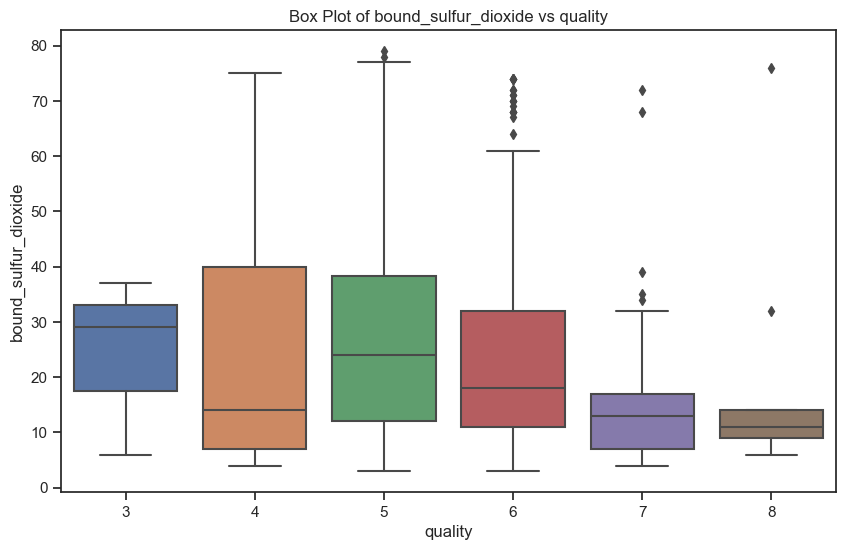

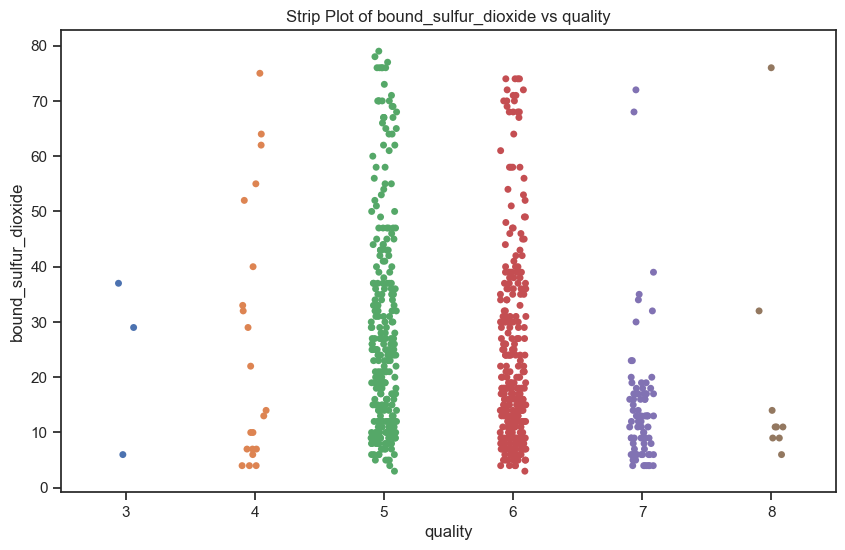

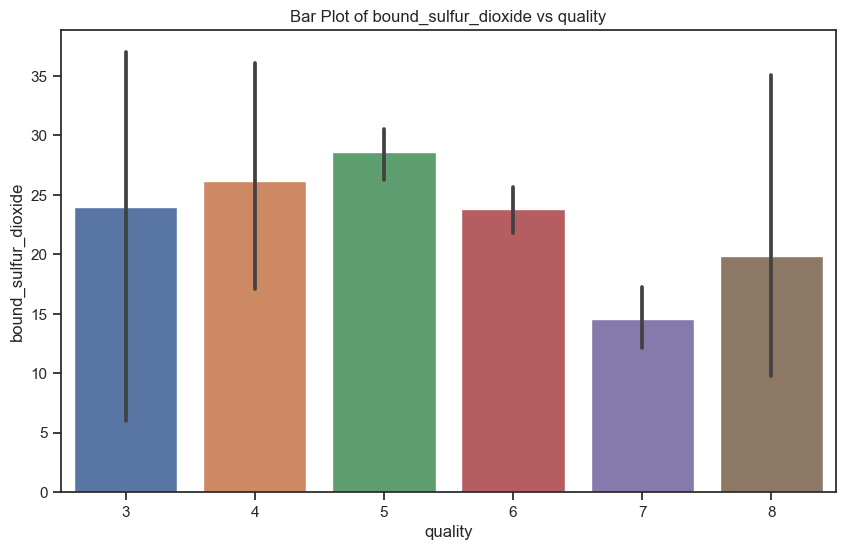

In [48]:
#quality vs. bound_sulfur_dioxide
exp.plot_categorical_and_continuous_vars(train, 'quality', 'bound_sulfur_dioxide')

In [49]:
# check for normal distribution
stats.shapiro(train.bound_sulfur_dioxide)

ShapiroResult(statistic=0.8663321733474731, pvalue=9.522787271056094e-24)

In [50]:
# stats test
tstat, pval = stats.ttest_1samp(train.bound_sulfur_dioxide, overall_mean)
tstat, pval

(27.145105061854906, 8.929204420005922e-111)

In [51]:
# p-value print statement
if ((pval) < alpha):
    print('we can reject the null hypothesis')
else:
    print('we fail to reject the null hypthesis')

we can reject the null hypothesis


- The bound sulfur dioxide variable is normally distributed, and based on the ttest pvalue < alpha, we can infer a relationship with quality.
- The various plots show a slight decreasing trend of free_sulfur_dioxide to quality as quality score increases.

# Is there a relationship between Quality (Categorical) vs. Density (Continuous)?

$H_{0}$ : there is not a relationship between wine quality and density

$H_{a}$ : there is a relationship between wine quality and density

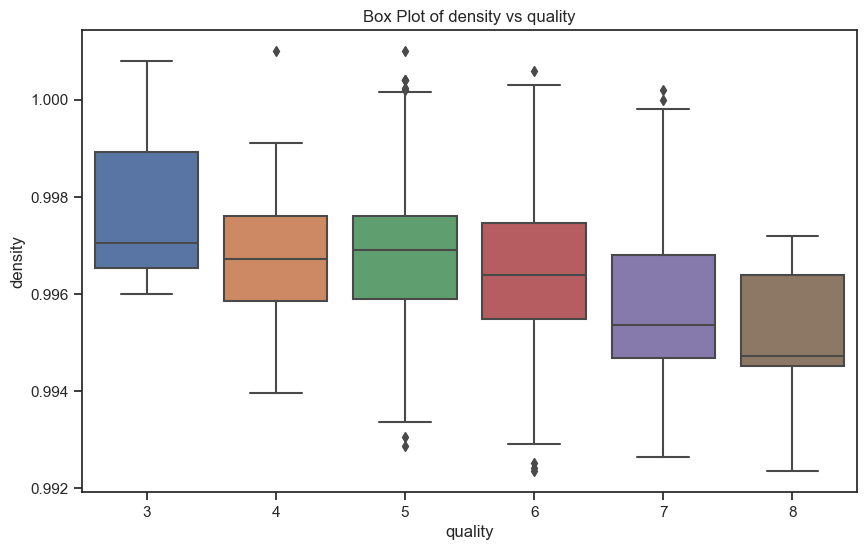

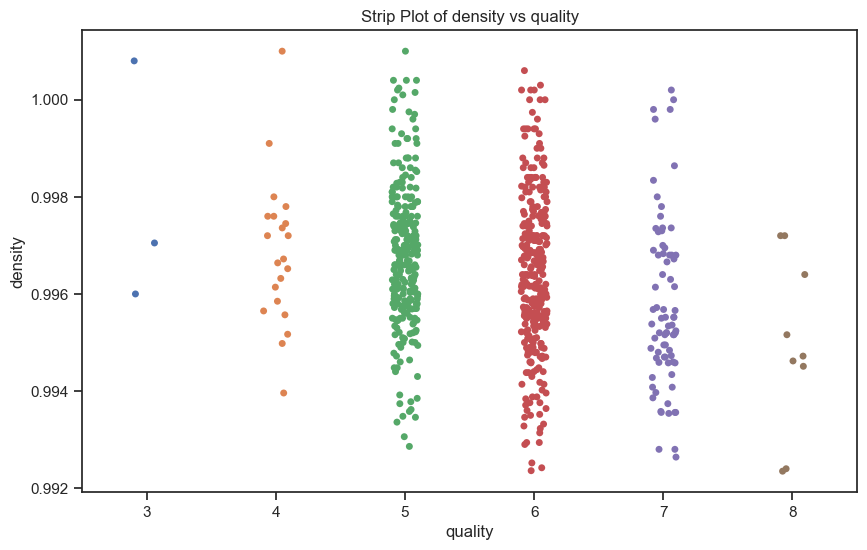

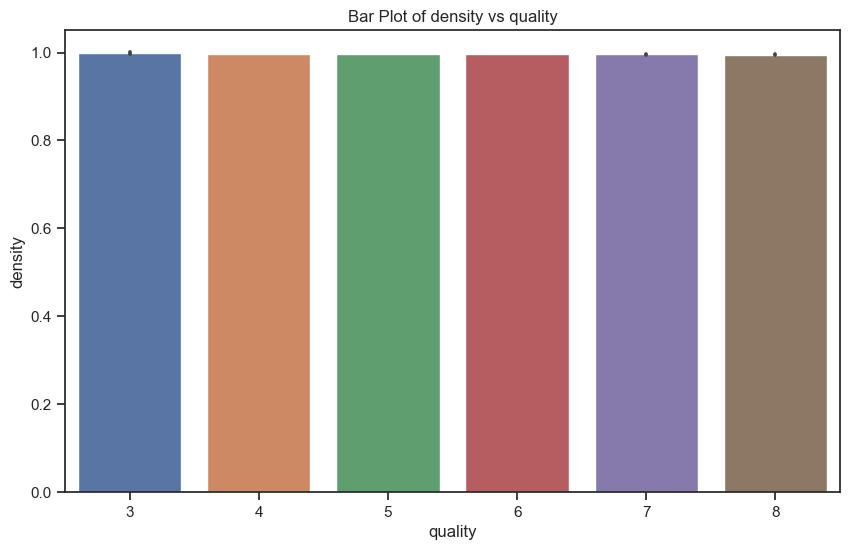

In [52]:
# quality vs. density
exp.plot_categorical_and_continuous_vars(train, 'quality', 'density')

In [53]:
# check for normal distribution
stats.shapiro(train.density)

ShapiroResult(statistic=0.9952080845832825, pvalue=0.031153682619333267)

In [54]:
# stats test
tstat, pval = stats.ttest_1samp(train.density, overall_mean)
tstat, pval

(-75953.78046210638, 0.0)

In [55]:
# p-value print statement
if ((pval) < alpha):
    print('we can reject the null hypothesis')
else:
    print('we fail to reject the null hypthesis')

we can reject the null hypothesis


- The free density variable is normally distributed, and based on the ttest pvalue < alpha, we can infer a relationship with quality.
- The various plots show a decreasing trend of density to quality as quality score increases.

# Is there a relationship between Quality (Categorical) vs. pH(Continuous)?

$H_{0}$ : there is not a relationship between wine quality and pH

$H_{a}$ : there is a relationship between wine quality and pH

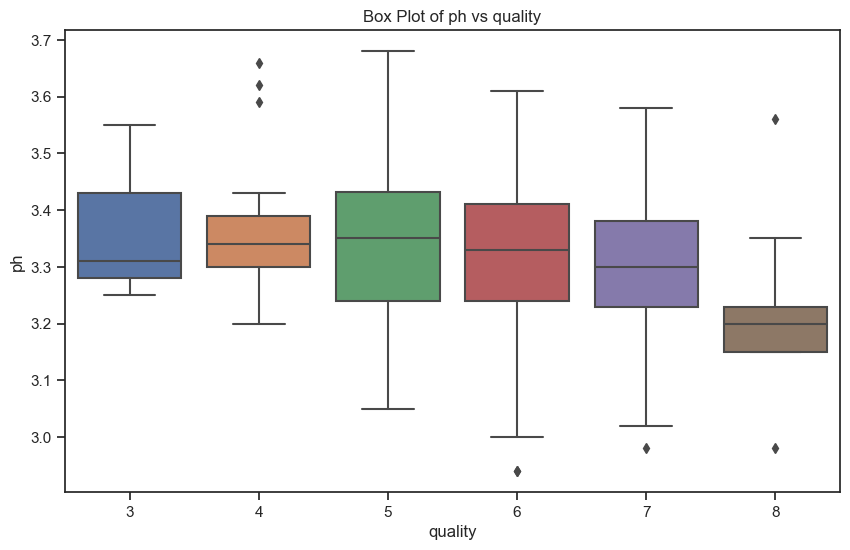

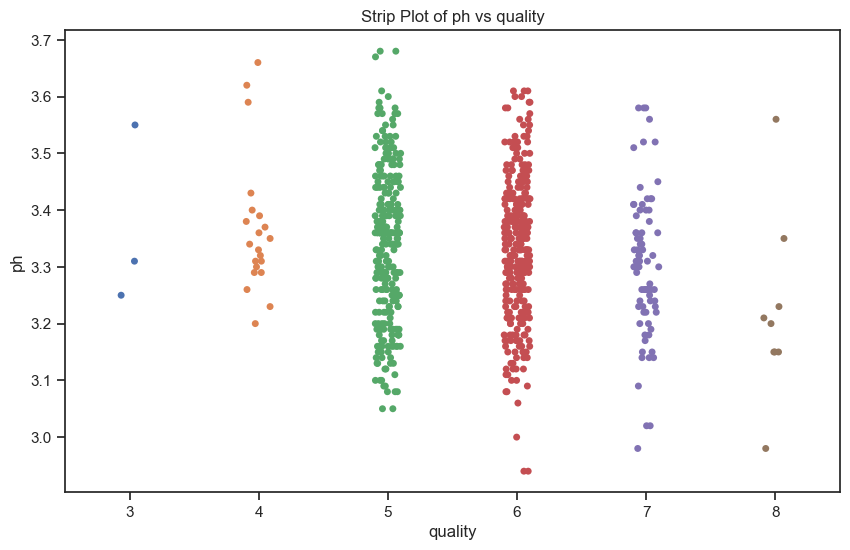

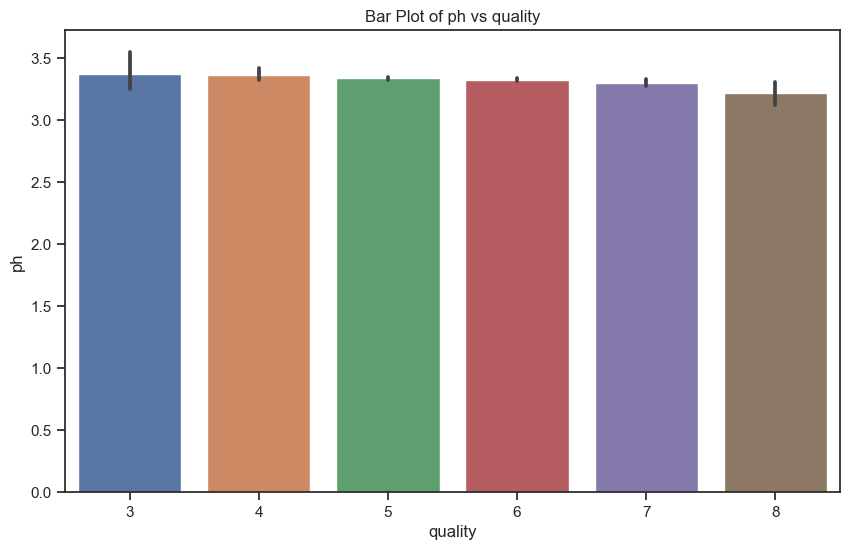

In [56]:
# quality vs. ph
exp.plot_categorical_and_continuous_vars(train, 'quality', 'ph')

In [57]:
# check for normal distribution
stats.shapiro(train.ph)

ShapiroResult(statistic=0.9966132044792175, pvalue=0.15431180596351624)

In [58]:
# stats test
tstat, pval = stats.ttest_1samp(train.ph, overall_mean)
tstat, pval

(-474.35322659257554, 0.0)

In [59]:
# p-value print statement
if ((pval) < alpha):
    print('we can reject the null hypothesis')
else:
    print('we fail to reject the null hypthesis')

we can reject the null hypothesis


- The pH variable is normally distributed, and based on the ttest pvalue < alpha, we can infer a relationship with quality.
- The various plots show a bookend of higher pH in the lowest and highest quality rating. The majority of the pH values fall in the middle of our quality spectrum. 

# Is there a relationship between Quality (Categorical) vs. sulphates (Continuous)?

$H_{0}$ : there is not a relationship between wine quality and sulphates

$H_{a}$ : there is a relationship between wine quality and sulphates

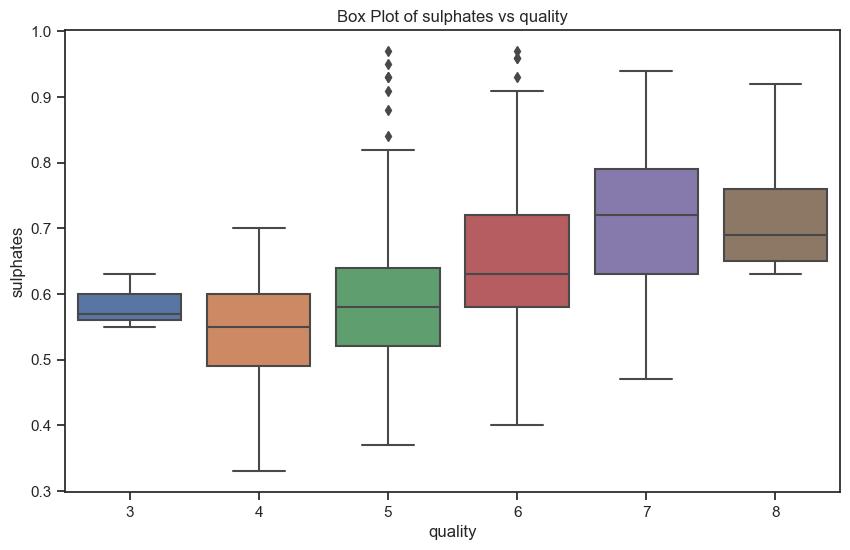

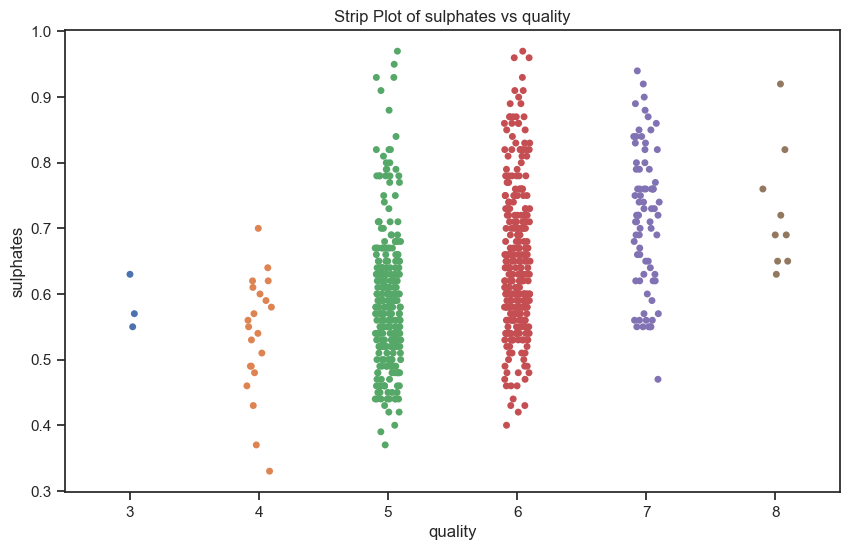

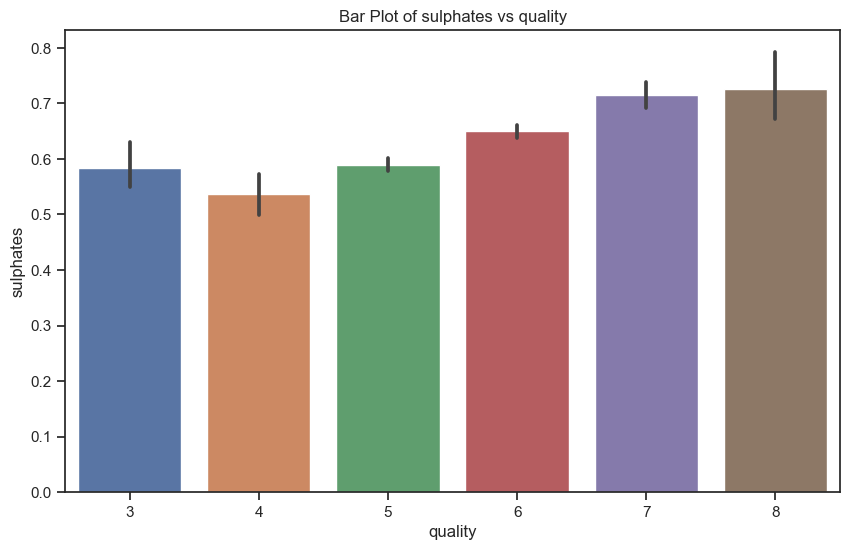

In [60]:
# quality vs. sulphates
exp.plot_categorical_and_continuous_vars(train, 'quality', 'sulphates')

In [61]:
# check for normal distribution
stats.shapiro(train.sulphates)

ShapiroResult(statistic=0.9765037298202515, pvalue=4.737127135001629e-09)

In [62]:
# stats test
tstat, pval = stats.ttest_1samp(train.sulphates, overall_mean)
tstat, pval

(-1143.3333150155763, 0.0)

In [63]:
# p-value print statement
if ((pval) < alpha):
    print('we can reject the null hypothesis')
else:
    print('we fail to reject the null hypthesis')

we can reject the null hypothesis


- The free sulphates variable is normally distributed, and based on the ttest pvalue < alpha, we can infer a relationship with quality.
- The various plots show a slight bell shaped trend of the mean of sulphates to quality.

# Check out correlation matrix for more data relationship clarification

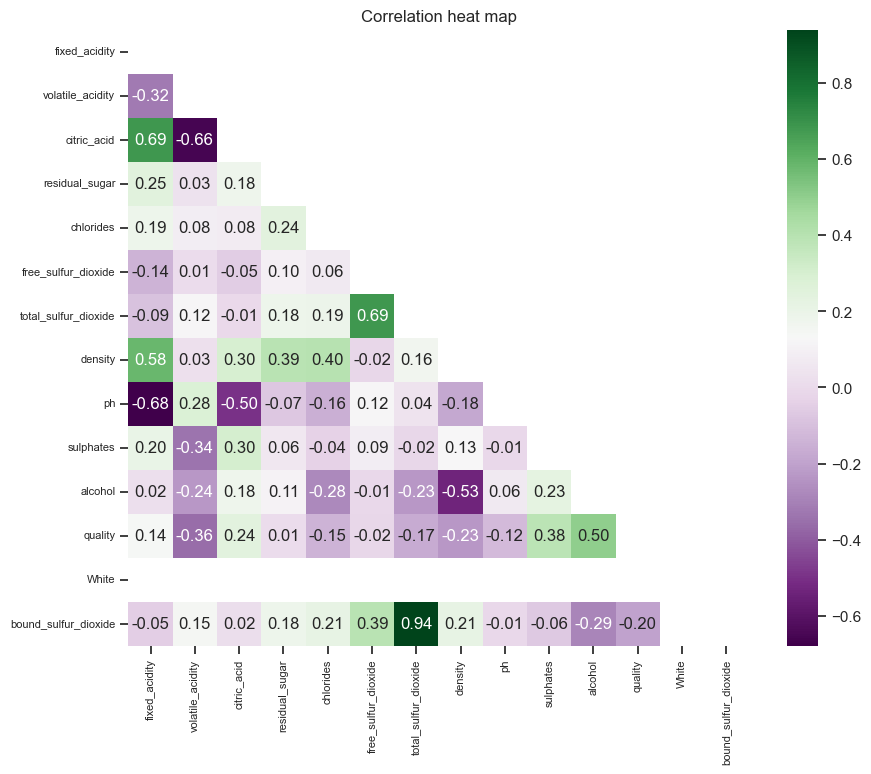

In [64]:
# use a function to take a look at the correlations between the various independent variables. 
#Food for thought, maybe some clutering information can be gathered.

eva.examine_heat_map(train)

- the negative relationship between alcohol and density is interesting
- the negative relationships between white wine and volatile_acidity, and chlorides may be specific to red.
- density and residual sugar have a strong correlation
- density and chlorides have a strong relationship
- total sulfur dioxide has strong correlation with bound, and white wine
- I will explore these relationships potentially in clustering

In [65]:
train.head()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
5281            8.3              0.26         0.42             2.0      0.080   
6034           10.4              0.52         0.45             2.0      0.080   
5333           12.3              0.39         0.63             2.3      0.091   
6213            7.5              0.63         0.27             2.0      0.083   
6035           10.4              0.52         0.45             2.0      0.080   

      free_sulfur_dioxide  total_sulfur_dioxide  density    ph  sulphates  \
5281                 11.0                  27.0  0.99740  3.21       0.80   
6034                  6.0                  13.0  0.99774  3.22       0.76   
5333                  6.0                  18.0  1.00040  3.16       0.49   
6213                 17.0                  91.0  0.99616  3.26       0.58   
6035                  6.0                  13.0  0.99774  3.22       0.76   

      alcohol  quality Type  White  bound_sulfur_dioxide  
5281      9.4        6  Red      0                  16.0  
6034     11.4        6  Red      0                   7.0  
5333      9.5        5  Red      0                  12.0  
6213      9.8        6  Red      0                  74.0  
6035     11.4        6  Red      0                   7.0

# Scale data for clustering 


In [66]:
X_train_scaled, X_validate_scaled, X_test_scaled, y_train, y_validate, y_test = p.scaled_df(train, validate, test)

In [67]:
X_train_scaled

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
5281       0.444444          0.158192     0.575342        0.333333   0.500000   
6034       0.736111          0.451977     0.616438        0.333333   0.500000   
5333       1.000000          0.305085     0.863014        0.458333   0.641026   
6213       0.333333          0.576271     0.369863        0.333333   0.538462   
6035       0.736111          0.451977     0.616438        0.333333   0.500000   
...             ...               ...          ...             ...        ...   
5863       0.444444          0.248588     0.547945        0.500000   0.307692   
6396       0.208333          0.875706     0.054795        0.458333   0.346154   
5441       0.847222          0.610169     0.328767        0.541667   0.564103   
6001       0.319444          0.418079     0.369863        0.375000   0.384615   
5922       0.361111          0.519774     0.013699        0.250000   0.602564   

      free_sulfur_dioxide  total_sulfur_dioxide   density        ph  \
5281             0.243902              0.201923  0.583815  0.364865   
6034             0.121951              0.067308  0.623121  0.378378   
5333             0.121951              0.115385  0.930636  0.297297   
6213             0.390244              0.817308  0.440462  0.432432   
6035             0.121951              0.067308  0.623121  0.378378   
...                   ...                   ...       ...       ...   
5863             0.560976              0.403846  0.368786  0.540541   
6396             0.146341              0.067308  0.401156  0.797297   
5441             0.365854              0.451923  0.803468  0.162162   
6001             0.317073              0.182692  0.176879  0.554054   
5922             0.268293              0.115385  0.384971  0.513514   

      sulphates   alcohol  bound_sulfur_dioxide  
5281   0.734375  0.152174              0.171053  
6034   0.671875  0.586957              0.052632  
5333   0.250000  0.173913              0.118421  
6213   0.390625  0.239130              0.934211  
6035   0.671875  0.586957              0.052632  
...         ...       ...                   ...  
5863   0.828125  0.500000              0.276316  
6396   0.390625  0.456522              0.039474  
5441   0.609375  0.500000              0.447368  
6001   0.468750  0.717391              0.105263  
5922   0.359375  0.391304              0.039474  

[687 rows x 12 columns]

# Elbow for optimal K
- call out specific features for clustering
- print an Elbow graph to aide K selection

In [68]:
# define independent variables for k-means, carry those on to validate and test
X = X_train_scaled[['alcohol','residual_sugar','density']]
x1 = X_validate_scaled[['alcohol','residual_sugar','density']]
x2 = X_test_scaled[['alcohol','residual_sugar','density']]
X.head()

alcohol  residual_sugar   density
5281  0.152174        0.333333  0.583815
6034  0.586957        0.333333  0.623121
5333  0.173913        0.458333  0.930636
6213  0.239130        0.333333  0.440462
6035  0.586957        0.333333  0.623121

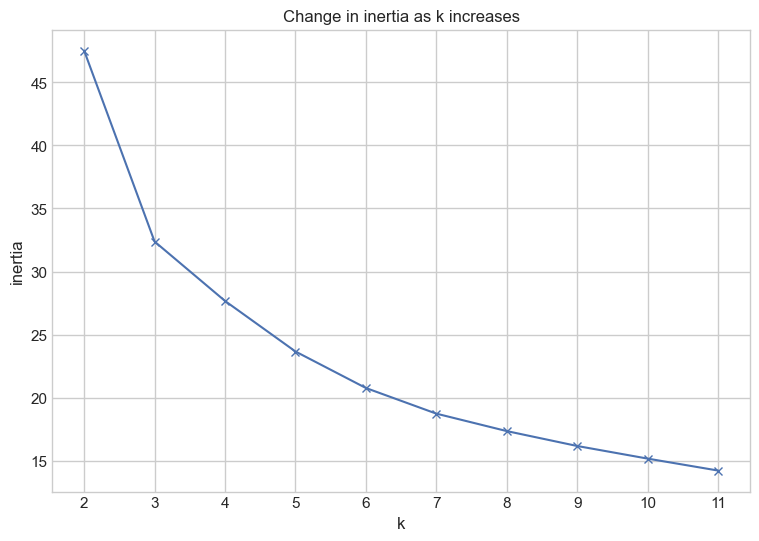

In [69]:
# show Change in inertia graph for k selection
muah.elbow_graph_for_k(X)

# Cluster model 1

In [70]:
# MAKE the thing
kmeans = KMeans(n_clusters=3)

# FIT the thing
kmeans.fit(X)

# USE (predict using) the thing 
kmeans.predict(X)
kmeans.predict(x1) #validate
kmeans.predict(x2) #test

array([0, 0, 1, 0, 1, 1, 2, 1, 0, 2, 0, 1, 0, 2, 0, 0, 2, 2, 1, 0, 0, 1,
       1, 0, 0, 2, 2, 0, 1, 0, 1, 0, 0, 2, 2, 2, 2, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 2, 0, 2, 0, 2, 1, 1, 1, 2, 1, 0, 2, 1, 0, 2, 1, 1, 0,
       1, 0, 2, 1, 1, 2, 0, 0, 2, 1, 1, 0, 1, 2, 0, 2, 1, 1, 1, 0, 0, 0,
       2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 0, 1, 1, 1, 0, 2, 1, 2,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       2, 2, 0, 0, 1, 1, 1, 2, 1, 1, 1, 0, 0, 2, 0, 2, 0, 1, 1, 1, 0, 0,
       0, 2, 1, 0, 1, 2, 1, 0, 1, 0, 2, 2, 2, 0, 1, 1, 1, 1, 2, 2, 0, 0,
       0, 2, 0, 1, 0, 1, 1, 1, 1, 2, 1, 1, 0, 0, 2, 0, 1, 2, 0, 2, 1, 2,
       1, 2, 1, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 1, 1, 2, 1, 2, 1, 0, 1,
       0, 1, 2, 0, 2, 2, 2, 0, 0], dtype=int32)

In [71]:
# make new column names in X_train_scaled, X_validate_scaled, X_test_scale and X dataframe
X_train_scaled['sugar_alcohol_density'] = kmeans.predict(X)

X_validate_scaled['sugar_alcohol_density'] = kmeans.predict(x1)

X_test_scaled['sugar_alcohol_density'] = kmeans.predict(x2)

X['sugar_alcohol_density'] = kmeans.predict(X)

# verify clustering worked for train set
X_train_scaled.head(3)

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
5281       0.444444          0.158192     0.575342        0.333333   0.500000   
6034       0.736111          0.451977     0.616438        0.333333   0.500000   
5333       1.000000          0.305085     0.863014        0.458333   0.641026   

      free_sulfur_dioxide  total_sulfur_dioxide   density        ph  \
5281             0.243902              0.201923  0.583815  0.364865   
6034             0.121951              0.067308  0.623121  0.378378   
5333             0.121951              0.115385  0.930636  0.297297   

      sulphates   alcohol  bound_sulfur_dioxide  sugar_alcohol_density  
5281   0.734375  0.152174              0.171053                      1  
6034   0.671875  0.586957              0.052632                      2  
5333   0.250000  0.173913              0.118421                      0

In [72]:
#verify clustering worked for test set
X_validate_scaled.head(3)

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
5072       0.305556          0.293785     0.287671        0.333333   0.500000   
5426       0.430556          0.338983     0.671233        0.583333   0.551282   
5989       0.388889          0.248588     0.575342        0.333333   0.576923   

      free_sulfur_dioxide  total_sulfur_dioxide   density        ph  \
5072             0.146341              0.278846  0.433526  0.527027   
5426             0.756098              0.471154  0.745665  0.540541   
5989             0.170732              0.125000  0.359538  0.554054   

      sulphates   alcohol  bound_sulfur_dioxide  sugar_alcohol_density  
5072   0.218750  0.173913              0.328947                      1  
5426   0.656250  0.000000              0.263158                      0  
5989   0.421875  0.586957              0.105263                      2

In [73]:
#verify clustering worked for test set
X_test_scaled.head(3)

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
5892       0.680556          0.259887     0.616438        0.541667   0.653846   
5473       1.000000          0.169492     0.671233        0.791667   0.487179   
5718       0.263889          0.638418     0.000000        0.291667   0.743590   

      free_sulfur_dioxide  total_sulfur_dioxide   density        ph  \
5892             0.463415              0.788462  0.789595  0.283784   
5473             0.658537              0.384615  0.803468  0.351351   
5718             0.195122              0.153846  0.428902  0.540541   

      sulphates   alcohol  bound_sulfur_dioxide  sugar_alcohol_density  
5892   0.156250  0.152174              0.855263                      0  
5473   0.734375  0.326087              0.197368                      0  
5718   0.421875  0.217391              0.131579                      1

In [74]:
# calculate cluster centers
kmeans.cluster_centers_

array([[0.30824972, 0.59786325, 0.66720617],
       [0.22602636, 0.28549652, 0.48436889],
       [0.63218452, 0.39126016, 0.30444664]])

In [75]:
# Make a dataframe 
centroids = pd.DataFrame(kmeans.cluster_centers_, columns = X.columns[:3])
centroids

alcohol  residual_sugar   density
0  0.308250        0.597863  0.667206
1  0.226026        0.285497  0.484369
2  0.632185        0.391260  0.304447

In [76]:
# Labels (same as from predict) for each observation

kmeans.labels_

array([1, 2, 0, 1, 2, 0, 2, 0, 1, 1, 1, 2, 1, 0, 1, 0, 2, 0, 2, 0, 0, 1,
       1, 2, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 2, 0, 1, 1, 0, 2, 2, 2,
       2, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 2, 1, 2, 1, 2, 2, 2, 0, 2, 2,
       2, 0, 2, 0, 1, 2, 1, 1, 1, 2, 1, 2, 2, 0, 1, 2, 0, 2, 1, 2, 1, 2,
       1, 0, 1, 0, 2, 0, 0, 1, 1, 2, 0, 2, 0, 0, 0, 2, 2, 1, 1, 2, 0, 1,
       0, 1, 2, 0, 1, 1, 1, 0, 1, 2, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 2,
       0, 0, 0, 0, 1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 2, 1, 1, 0, 2, 1, 2, 2, 2, 0, 1, 1, 2, 2, 1,
       2, 1, 0, 0, 2, 1, 1, 1, 0, 2, 0, 0, 1, 1, 2, 2, 2, 1, 1, 2, 2, 1,
       0, 1, 1, 2, 0, 2, 2, 1, 0, 0, 2, 2, 1, 1, 0, 1, 2, 0, 2, 2, 0, 1,
       0, 1, 1, 0, 2, 2, 2, 2, 2, 1, 1, 0, 2, 1, 2, 2, 0, 0, 2, 0, 0, 0,
       0, 0, 1, 2, 0, 0, 1, 1, 2, 2, 1, 1, 2, 2, 0, 1, 2, 2, 2, 0, 2, 1,
       0, 1, 2, 1, 1, 2, 0, 2, 0, 1, 2, 1, 1, 2, 0, 1, 1, 2, 1, 1, 2, 1,
       1, 2, 2, 1, 1, 0, 1, 1, 1, 2, 2, 2, 2, 2, 1,

In [77]:
# doing the things
X_train_scaled['sugar_alcohol_density'] = X_train_scaled.sugar_alcohol_density


In [78]:
#rename using map
X_train_scaled['sugar_alcohol_density'] = X_train_scaled.sugar_alcohol_density.map({
    0: 'low_sugar, low_alcohol , med_density',
    1: 'high_alcohol, low_sugar, low_density',
    2: 'low_alcohol, high_sugar, high_density'
    
})
X_train_scaled.head()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
5281       0.444444          0.158192     0.575342        0.333333   0.500000   
6034       0.736111          0.451977     0.616438        0.333333   0.500000   
5333       1.000000          0.305085     0.863014        0.458333   0.641026   
6213       0.333333          0.576271     0.369863        0.333333   0.538462   
6035       0.736111          0.451977     0.616438        0.333333   0.500000   

      free_sulfur_dioxide  total_sulfur_dioxide   density        ph  \
5281             0.243902              0.201923  0.583815  0.364865   
6034             0.121951              0.067308  0.623121  0.378378   
5333             0.121951              0.115385  0.930636  0.297297   
6213             0.390244              0.817308  0.440462  0.432432   
6035             0.121951              0.067308  0.623121  0.378378   

      sulphates   alcohol  bound_sulfur_dioxide  \
5281   0.734375  0.152174              0.171053   
6034   0.671875  0.586957              0.052632   
5333   0.250000  0.173913              0.118421   
6213   0.390625  0.239130              0.934211   
6035   0.671875  0.586957              0.052632   

                      sugar_alcohol_density  
5281   high_alcohol, low_sugar, low_density  
6034  low_alcohol, high_sugar, high_density  
5333   low_sugar, low_alcohol , med_density  
6213   high_alcohol, low_sugar, low_density  
6035  low_alcohol, high_sugar, high_density

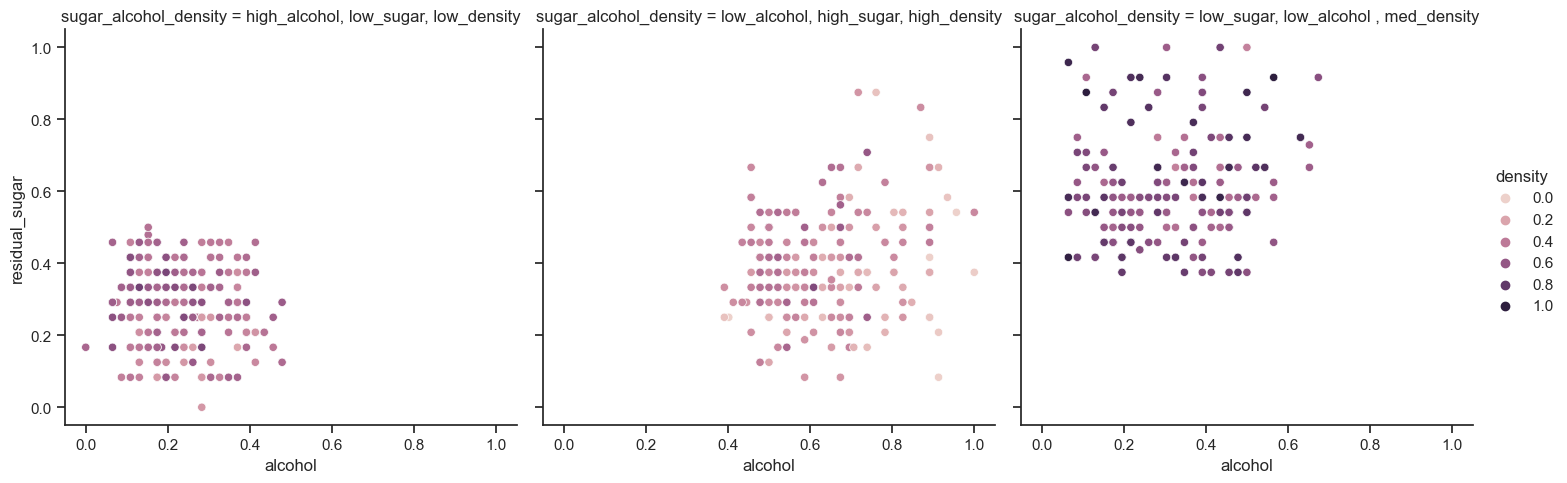

In [79]:
sns.relplot(x='alcohol', y='residual_sugar', data=X_train_scaled, hue='density', col='sugar_alcohol_density')

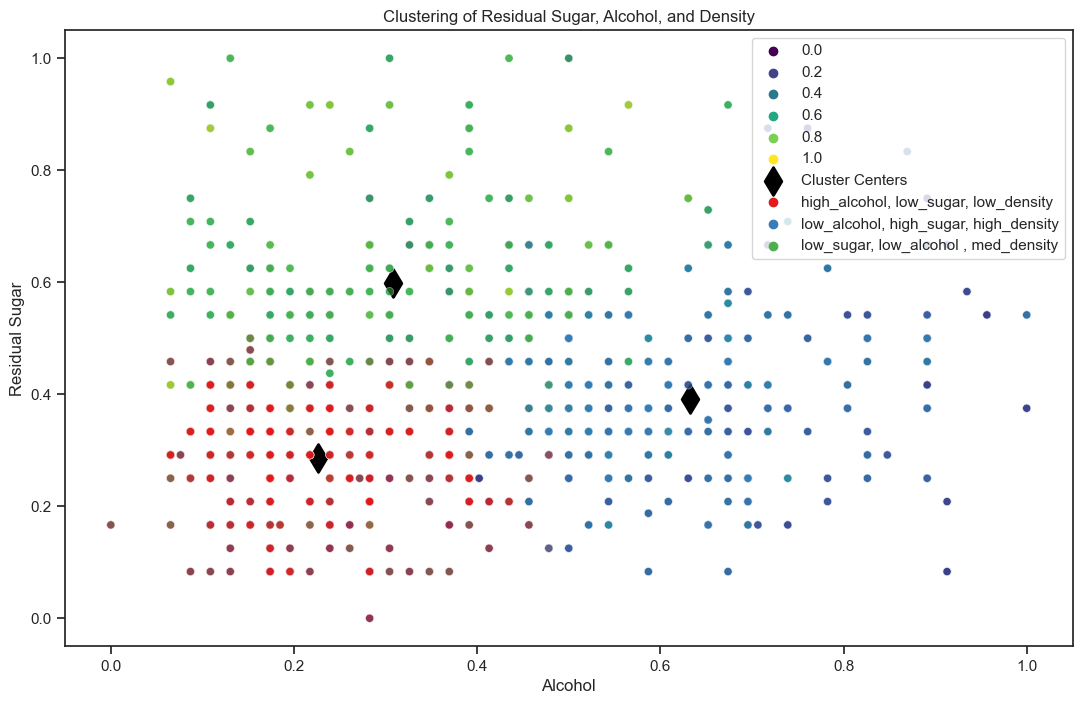

In [80]:
# Scatter plot of unscaled data with hue for cluster
plt.figure(figsize=(13, 8))
sns.scatterplot(x='alcohol', y='residual_sugar', data=X_train_scaled, hue='density', palette='viridis')

# Plot cluster centers for 'alcohol', 'residual sugar', and 'density'
cluster_centers = kmeans.cluster_centers_ 
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='black', marker='d', s=200, linewidths=2, label='Cluster Centers')

# Scatter plot of 'sugar_alcohol_density' clusters
sns.scatterplot(x='alcohol', y='residual_sugar', data=X_train_scaled, hue='sugar_alcohol_density', palette='Set1', alpha=0.5)

plt.title('Clustering of Residual Sugar, Alcohol, and Density')
plt.xlabel('Alcohol')
plt.ylabel('Residual Sugar')
plt.legend()
plt.show()


In [81]:
# verify kmeans inertia
kmeans.inertia_

32.37714898475954

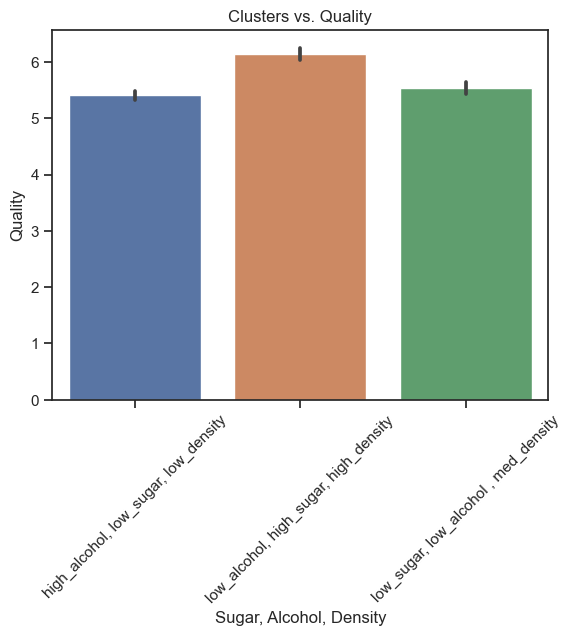

In [82]:
#visualize clusters vs. target
sns.barplot(data=X_train_scaled, x='sugar_alcohol_density', y=y_train)
plt.xticks(rotation= 45)
plt.xlabel('Sugar, Alcohol, Density')
plt.ylabel('Quality')
plt.title('Clusters vs. Quality')
plt.show()

#### Cluster Model 1 takeaway
- Three clusters were created, they appear to have a relationship with quality.
- The cluster will be used as a feature in modeling.

# Cluster model 2

- call out specific features for clustering
- print an Elbow graph to aide K selection

In [83]:
# define independent variables for k-means, carry those on to validate and test
X1 = X_train_scaled[['chlorides','sulphates']]
x2 = X_validate_scaled[['chlorides','sulphates']]
x3 = X_test_scaled[['chlorides','sulphates']]
X1.head()

chlorides  sulphates
5281   0.500000   0.734375
6034   0.500000   0.671875
5333   0.641026   0.250000
6213   0.538462   0.390625
6035   0.500000   0.671875

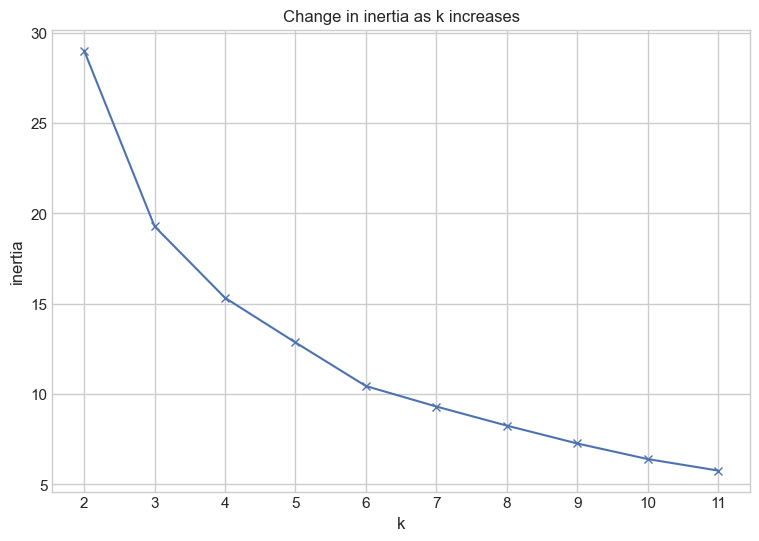

In [84]:
# view elbow method selection for k
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X1).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [85]:
# MAKE the thing
kmeans = KMeans(n_clusters=3)

# FIT the thing
kmeans.fit(X1)

# USE (predict using) the thing 
kmeans.predict(X1)
kmeans.predict(x2) #validate
kmeans.predict(x3) #test

array([2, 1, 2, 1, 2, 0, 1, 0, 0, 2, 1, 2, 2, 0, 2, 2, 1, 1, 0, 0, 1, 2,
       0, 2, 0, 0, 0, 1, 0, 2, 1, 2, 0, 1, 0, 0, 0, 0, 0, 2, 0, 1, 2, 2,
       1, 0, 1, 0, 1, 1, 2, 2, 0, 0, 0, 2, 2, 0, 1, 1, 0, 2, 1, 0, 1, 2,
       0, 1, 1, 0, 0, 1, 2, 0, 2, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 2, 0, 2,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 2, 0, 2, 0, 0, 1, 1, 0, 2, 1, 1, 0, 2,
       1, 2, 2, 0, 0, 1, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0,
       2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 1, 0, 1, 2, 1, 2, 1, 1, 0,
       2, 0, 1, 2, 1, 1, 1, 2, 0, 2, 2, 0, 0, 0, 1, 0, 2, 1, 1, 1, 2, 0,
       0, 1, 2, 1, 0, 0, 0, 1, 1, 2, 0, 0, 2, 1, 1, 1, 0, 2, 1, 2, 1, 0,
       2, 0, 0, 0, 1, 1, 2, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       2, 0, 1, 2, 1, 1, 0, 1, 0], dtype=int32)

In [86]:
# make new column names in X_train_scaled, X_validate_scaled, X_test_scale and X dataframe
X_train_scaled['chlorides_sulphates'] = kmeans.predict(X1)

X_validate_scaled['chlorides_sulphates'] = kmeans.predict(x2)

X_test_scaled['chlorides_sulphates'] = kmeans.predict(x3)

X['chlorides_sulphates'] = kmeans.predict(X1)

# verify clustering worked for train set
X_train_scaled.head(3)

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
5281       0.444444          0.158192     0.575342        0.333333   0.500000   
6034       0.736111          0.451977     0.616438        0.333333   0.500000   
5333       1.000000          0.305085     0.863014        0.458333   0.641026   

      free_sulfur_dioxide  total_sulfur_dioxide   density        ph  \
5281             0.243902              0.201923  0.583815  0.364865   
6034             0.121951              0.067308  0.623121  0.378378   
5333             0.121951              0.115385  0.930636  0.297297   

      sulphates   alcohol  bound_sulfur_dioxide  \
5281   0.734375  0.152174              0.171053   
6034   0.671875  0.586957              0.052632   
5333   0.250000  0.173913              0.118421   

                      sugar_alcohol_density  chlorides_sulphates  
5281   high_alcohol, low_sugar, low_density                    1  
6034  low_alcohol, high_sugar, high_density                    1  
5333   low_sugar, low_alcohol , med_density                    2

In [87]:
# calculate cluster centers
kmeans.cluster_centers_

array([[0.40457986, 0.3570689 ],
       [0.40334795, 0.6941386 ],
       [0.70148781, 0.43113426]])

In [88]:
# Make a dataframe 
centroids = pd.DataFrame(kmeans.cluster_centers_, columns = X1.columns[:2])
centroids

chlorides  sulphates
0   0.404580   0.357069
1   0.403348   0.694139
2   0.701488   0.431134

In [89]:
# Labels (same as from predict) for each observation

kmeans.labels_

array([1, 1, 2, 0, 1, 2, 1, 0, 0, 0, 0, 1, 2, 2, 1, 2, 1, 0, 0, 0, 2, 0,
       2, 0, 0, 2, 0, 2, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 2, 2, 0, 0, 0,
       2, 0, 1, 0, 0, 0, 1, 0, 0, 0, 2, 1, 1, 0, 2, 0, 0, 0, 1, 0, 2, 0,
       1, 2, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 2, 0, 2, 1, 0, 0, 0, 0, 1, 2, 0, 1, 2, 1, 2, 1, 0, 2, 1, 1, 0,
       0, 2, 1, 1, 0, 1, 0, 2, 2, 0, 2, 1, 1, 0, 0, 1, 1, 1, 2, 0, 0, 2,
       2, 0, 1, 1, 2, 2, 0, 0, 0, 2, 0, 1, 0, 1, 0, 1, 0, 2, 2, 1, 0, 1,
       2, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 2, 1, 2, 1, 0, 2, 2, 2, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 2, 1, 0, 2, 2, 0, 1, 1, 1, 1, 0, 1, 2, 2,
       2, 0, 1, 0, 2, 1, 1, 0, 1, 0, 0, 2, 0, 1, 0, 0, 1, 2, 1, 0, 2, 1,
       0, 1, 2, 2, 1, 0, 0, 0, 1, 0, 2, 0, 0, 1, 1, 1, 0, 2, 2, 2, 2, 0,
       0, 2, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 2, 0, 2, 2, 1,
       1, 1, 1, 1, 0, 0, 2, 1, 0, 0, 0, 1, 0, 2, 1, 1, 1, 1, 0, 1, 2, 0,
       0, 0, 0, 0, 0, 2, 2, 0, 0, 1, 0, 0, 2, 0, 0,

In [90]:
# ensure saved to df
X_train_scaled['chlorides_sulphates'] = X_train_scaled.chlorides_sulphates
X_train_scaled.head()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
5281       0.444444          0.158192     0.575342        0.333333   0.500000   
6034       0.736111          0.451977     0.616438        0.333333   0.500000   
5333       1.000000          0.305085     0.863014        0.458333   0.641026   
6213       0.333333          0.576271     0.369863        0.333333   0.538462   
6035       0.736111          0.451977     0.616438        0.333333   0.500000   

      free_sulfur_dioxide  total_sulfur_dioxide   density        ph  \
5281             0.243902              0.201923  0.583815  0.364865   
6034             0.121951              0.067308  0.623121  0.378378   
5333             0.121951              0.115385  0.930636  0.297297   
6213             0.390244              0.817308  0.440462  0.432432   
6035             0.121951              0.067308  0.623121  0.378378   

      sulphates   alcohol  bound_sulfur_dioxide  \
5281   0.734375  0.152174              0.171053   
6034   0.671875  0.586957              0.052632   
5333   0.250000  0.173913              0.118421   
6213   0.390625  0.239130              0.934211   
6035   0.671875  0.586957              0.052632   

                      sugar_alcohol_density  chlorides_sulphates  
5281   high_alcohol, low_sugar, low_density                    1  
6034  low_alcohol, high_sugar, high_density                    1  
5333   low_sugar, low_alcohol , med_density                    2  
6213   high_alcohol, low_sugar, low_density                    0  
6035  low_alcohol, high_sugar, high_density                    1

In [91]:
#rename using map
X_train_scaled['chlorides_sulphates'] = X_train_scaled.chlorides_sulphates.map({
    0: 'low_chloride, low_sulphate',
    1: 'low_chloride, high_sulphate',
    2: 'high_chloride, high_sulphate'
    
})
X_train_scaled.head()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
5281       0.444444          0.158192     0.575342        0.333333   0.500000   
6034       0.736111          0.451977     0.616438        0.333333   0.500000   
5333       1.000000          0.305085     0.863014        0.458333   0.641026   
6213       0.333333          0.576271     0.369863        0.333333   0.538462   
6035       0.736111          0.451977     0.616438        0.333333   0.500000   

      free_sulfur_dioxide  total_sulfur_dioxide   density        ph  \
5281             0.243902              0.201923  0.583815  0.364865   
6034             0.121951              0.067308  0.623121  0.378378   
5333             0.121951              0.115385  0.930636  0.297297   
6213             0.390244              0.817308  0.440462  0.432432   
6035             0.121951              0.067308  0.623121  0.378378   

      sulphates   alcohol  bound_sulfur_dioxide  \
5281   0.734375  0.152174              0.171053   
6034   0.671875  0.586957              0.052632   
5333   0.250000  0.173913              0.118421   
6213   0.390625  0.239130              0.934211   
6035   0.671875  0.586957              0.052632   

                      sugar_alcohol_density           chlorides_sulphates  
5281   high_alcohol, low_sugar, low_density   low_chloride, high_sulphate  
6034  low_alcohol, high_sugar, high_density   low_chloride, high_sulphate  
5333   low_sugar, low_alcohol , med_density  high_chloride, high_sulphate  
6213   high_alcohol, low_sugar, low_density    low_chloride, low_sulphate  
6035  low_alcohol, high_sugar, high_density   low_chloride, high_sulphate

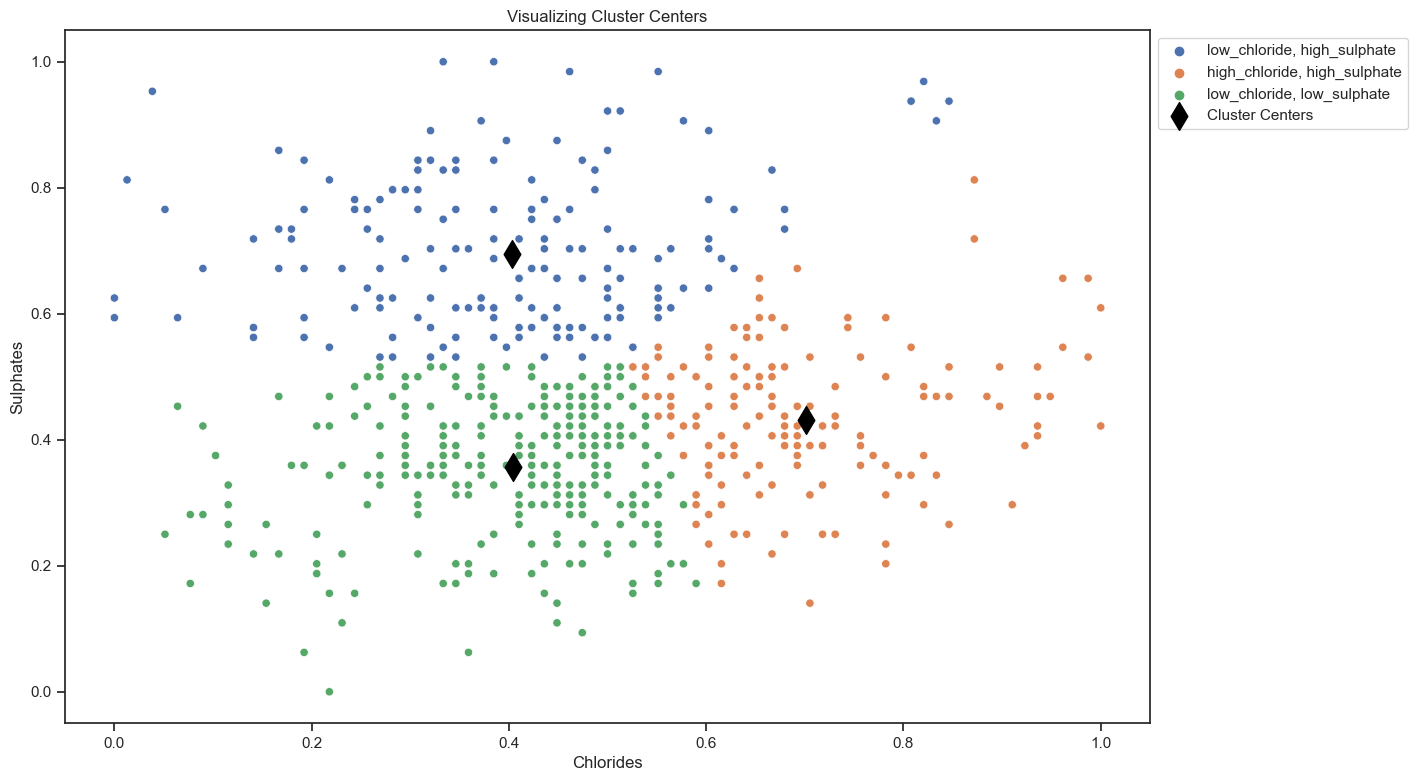

In [92]:
# Visualize the clusters along with the centers on unscaled data
plt.figure(figsize=(14, 9))

# Scatter plot of data with hue for cluster
sns.scatterplot(x='chlorides', y='sulphates', data=X_train_scaled, hue='chlorides_sulphates')

centroids = pd.DataFrame(kmeans.cluster_centers_, columns = X1.columns[:2])

# Plot cluster centers (centroids)
plt.scatter(centroids['chlorides'], centroids['sulphates'], c='black', marker='d', s=200, label='Cluster Centers')

plt.title('Visualizing Cluster Centers')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.ylabel('Sulphates')
plt.xlabel('Chlorides')
plt.show()

In [93]:
# verify kmeans inertia
kmeans.inertia_

19.272699049632585

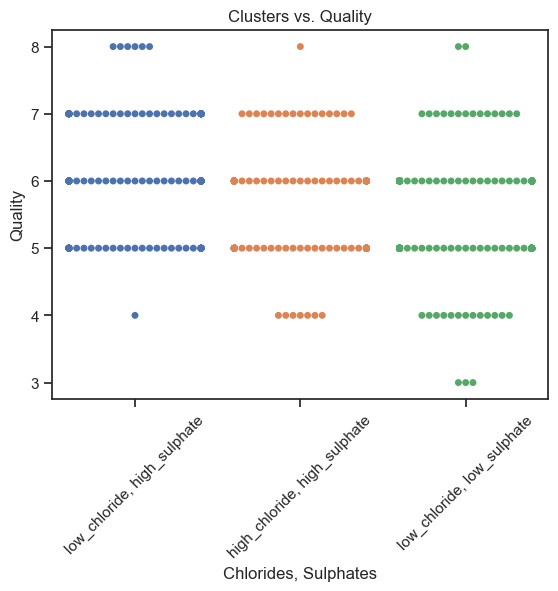

In [94]:
#visualize clusters vs. target
sns.swarmplot(data=X_train_scaled, x='chlorides_sulphates', y=y_train)
plt.xticks(rotation= 45)
plt.xlabel('Chlorides, Sulphates')
plt.ylabel('Quality')
plt.title('Clusters vs. Quality')
plt.show()

#### Cluster Model 2 takeaway
- Although three clusters were created, it was only grouping by a randomly chosen mean of an area.
- The cluster are not adequate to move into modeling as a feature

# Cluster Model 3

- call out specific features for clustering
- print an Elbow graph to aide K selection

In [95]:
# define independent variables for k-means, carry those on to validate and test
X2 = X_train_scaled[['fixed_acidity','bound_sulfur_dioxide']]
x4 = X_validate_scaled[['fixed_acidity','bound_sulfur_dioxide']]
x5 = X_test_scaled[['fixed_acidity','bound_sulfur_dioxide']]
X2.head()

fixed_acidity  bound_sulfur_dioxide
5281       0.444444              0.171053
6034       0.736111              0.052632
5333       1.000000              0.118421
6213       0.333333              0.934211
6035       0.736111              0.052632

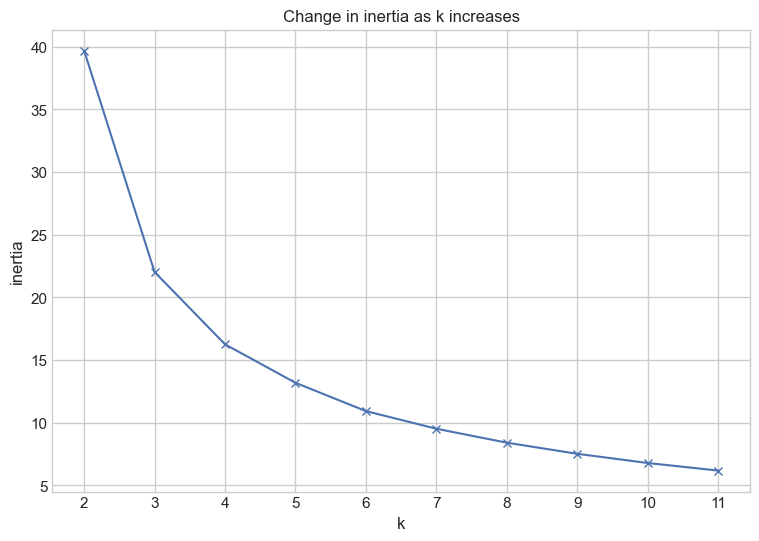

In [96]:
# view elbow method selection for k
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X2).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [97]:
# MAKE the thing
kmeans = KMeans(n_clusters=3)

# FIT the thing
kmeans.fit(X2)

# USE (predict using) the thing 
kmeans.predict(X2)
kmeans.predict(x4) #validate
kmeans.predict(x5) #test

array([1, 0, 2, 0, 1, 2, 2, 2, 1, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 1,
       2, 2, 1, 2, 2, 0, 2, 0, 2, 1, 2, 2, 2, 0, 2, 0, 0, 1, 2, 0, 2, 2,
       2, 1, 2, 0, 2, 0, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 0, 2, 2, 2, 2,
       1, 0, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 0, 2, 1, 2, 2, 2, 1, 0, 2, 2,
       0, 1, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 2, 0,
       1, 1, 0, 1, 0, 2, 2, 1, 2, 0, 0, 2, 0, 2, 0, 0, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 0, 2, 1, 1, 2, 2, 2, 0, 1, 2, 1, 2, 2, 2, 0, 0,
       0, 2, 2, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2, 0, 0, 2, 1, 2, 0, 1, 0, 0,
       1, 0, 0, 0, 2, 1, 2, 0, 0, 2, 0, 2, 1, 0, 2, 2, 1, 0, 0, 0, 2, 2,
       2, 2, 2, 0, 2, 2, 0, 1, 2, 2, 2, 1, 0, 0, 1, 2, 2, 0, 0, 2, 1, 2,
       2, 0, 2, 0, 2, 2, 2, 0, 0], dtype=int32)

In [98]:
# make new column names in X_train_scaled, X_validate_scaled, X_test_scale and X dataframe
X_train_scaled['fixed_acidity_bound_sulfur_dioxide'] = kmeans.predict(X2)

X_validate_scaled['fixed_acidity_bound_sulfur_dioxide'] = kmeans.predict(x4)

X_test_scaled['fixed_acidity_bound_sulfur_dioxide'] = kmeans.predict(x5)

X['fixed_acidity_bound_sulfur_dioxide'] = kmeans.predict(X2)

# verify clustering worked for train set
X_train_scaled.head(3)

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
5281       0.444444          0.158192     0.575342        0.333333   0.500000   
6034       0.736111          0.451977     0.616438        0.333333   0.500000   
5333       1.000000          0.305085     0.863014        0.458333   0.641026   

      free_sulfur_dioxide  total_sulfur_dioxide   density        ph  \
5281             0.243902              0.201923  0.583815  0.364865   
6034             0.121951              0.067308  0.623121  0.378378   
5333             0.121951              0.115385  0.930636  0.297297   

      sulphates   alcohol  bound_sulfur_dioxide  \
5281   0.734375  0.152174              0.171053   
6034   0.671875  0.586957              0.052632   
5333   0.250000  0.173913              0.118421   

                      sugar_alcohol_density           chlorides_sulphates  \
5281   high_alcohol, low_sugar, low_density   low_chloride, high_sulphate   
6034  low_alcohol, high_sugar, high_density   low_chloride, high_sulphate   
5333   low_sugar, low_alcohol , med_density  high_chloride, high_sulphate   

      fixed_acidity_bound_sulfur_dioxide  
5281                                   2  
6034                                   0  
5333                                   0

In [99]:
kmeans.cluster_centers_

array([[0.68119989, 0.1970293 ],
       [0.38001543, 0.67516447],
       [0.29847182, 0.17406877]])

In [100]:
# Make a dataframe 
centroids = pd.DataFrame(kmeans.cluster_centers_, columns = X2.columns[:2])
centroids

fixed_acidity  bound_sulfur_dioxide
0       0.681200              0.197029
1       0.380015              0.675164
2       0.298472              0.174069

In [101]:
# Labels (same as from predict) for each observation

kmeans.labels_

array([2, 0, 0, 1, 0, 1, 0, 1, 2, 0, 2, 2, 0, 0, 2, 0, 0, 0, 1, 1, 1, 2,
       2, 2, 1, 1, 2, 2, 2, 1, 0, 2, 1, 2, 1, 2, 0, 2, 2, 2, 0, 2, 1, 2,
       0, 2, 0, 0, 0, 2, 2, 0, 2, 2, 2, 0, 0, 2, 0, 2, 0, 0, 0, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 0, 1, 2, 1, 2, 2, 1, 0, 2,
       2, 0, 1, 0, 0, 2, 2, 1, 2, 2, 0, 2, 0, 0, 0, 0, 2, 1, 0, 0, 0, 2,
       0, 1, 2, 2, 2, 0, 1, 2, 0, 2, 1, 1, 2, 1, 2, 2, 0, 0, 2, 2, 2, 2,
       0, 1, 0, 2, 1, 2, 0, 2, 2, 2, 2, 2, 1, 2, 0, 2, 2, 1, 0, 2, 0, 1,
       0, 2, 0, 2, 0, 1, 0, 2, 2, 2, 2, 0, 2, 2, 0, 2, 1, 2, 2, 2, 1, 1,
       2, 2, 1, 2, 2, 1, 1, 2, 2, 0, 0, 0, 1, 2, 1, 0, 2, 2, 0, 2, 2, 1,
       0, 2, 0, 0, 2, 1, 2, 1, 0, 2, 1, 0, 2, 2, 0, 2, 2, 2, 2, 0, 0, 1,
       2, 0, 2, 2, 0, 2, 2, 1, 2, 2, 0, 0, 2, 0, 1, 2, 2, 0, 2, 0, 2, 0,
       1, 0, 2, 2, 1, 0, 1, 2, 2, 2, 2, 1, 0, 0, 0, 1, 2, 2, 2, 0, 0, 1,
       0, 2, 0, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 1, 2, 2, 2, 2, 0, 1, 1, 2, 1, 2, 1,

In [102]:
X_train_scaled['fixed_acidity_bound_sulfur_dioxide'] = X_train_scaled.fixed_acidity_bound_sulfur_dioxide
X_train_scaled.head()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
5281       0.444444          0.158192     0.575342        0.333333   0.500000   
6034       0.736111          0.451977     0.616438        0.333333   0.500000   
5333       1.000000          0.305085     0.863014        0.458333   0.641026   
6213       0.333333          0.576271     0.369863        0.333333   0.538462   
6035       0.736111          0.451977     0.616438        0.333333   0.500000   

      free_sulfur_dioxide  total_sulfur_dioxide   density        ph  \
5281             0.243902              0.201923  0.583815  0.364865   
6034             0.121951              0.067308  0.623121  0.378378   
5333             0.121951              0.115385  0.930636  0.297297   
6213             0.390244              0.817308  0.440462  0.432432   
6035             0.121951              0.067308  0.623121  0.378378   

      sulphates   alcohol  bound_sulfur_dioxide  \
5281   0.734375  0.152174              0.171053   
6034   0.671875  0.586957              0.052632   
5333   0.250000  0.173913              0.118421   
6213   0.390625  0.239130              0.934211   
6035   0.671875  0.586957              0.052632   

                      sugar_alcohol_density           chlorides_sulphates  \
5281   high_alcohol, low_sugar, low_density   low_chloride, high_sulphate   
6034  low_alcohol, high_sugar, high_density   low_chloride, high_sulphate   
5333   low_sugar, low_alcohol , med_density  high_chloride, high_sulphate   
6213   high_alcohol, low_sugar, low_density    low_chloride, low_sulphate   
6035  low_alcohol, high_sugar, high_density   low_chloride, high_sulphate   

      fixed_acidity_bound_sulfur_dioxide  
5281                                   2  
6034                                   0  
5333                                   0  
6213                                   1  
6035                                   0

In [103]:
#rename using map
X_train_scaled['fixed_acidity_bound_sulfur_dioxide'] = X_train_scaled.fixed_acidity_bound_sulfur_dioxide.map({
    0: 'low_fixed_acidity, low_bound_sulfur_dioxide',
    1: 'high_fixed_acidity, med_bound_sulfur_dioxide',
    2: 'low_fixed_acidity, high_bound_sulfur_dioxide'
    
})
X_train_scaled.head()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
5281       0.444444          0.158192     0.575342        0.333333   0.500000   
6034       0.736111          0.451977     0.616438        0.333333   0.500000   
5333       1.000000          0.305085     0.863014        0.458333   0.641026   
6213       0.333333          0.576271     0.369863        0.333333   0.538462   
6035       0.736111          0.451977     0.616438        0.333333   0.500000   

      free_sulfur_dioxide  total_sulfur_dioxide   density        ph  \
5281             0.243902              0.201923  0.583815  0.364865   
6034             0.121951              0.067308  0.623121  0.378378   
5333             0.121951              0.115385  0.930636  0.297297   
6213             0.390244              0.817308  0.440462  0.432432   
6035             0.121951              0.067308  0.623121  0.378378   

      sulphates   alcohol  bound_sulfur_dioxide  \
5281   0.734375  0.152174              0.171053   
6034   0.671875  0.586957              0.052632   
5333   0.250000  0.173913              0.118421   
6213   0.390625  0.239130              0.934211   
6035   0.671875  0.586957              0.052632   

                      sugar_alcohol_density           chlorides_sulphates  \
5281   high_alcohol, low_sugar, low_density   low_chloride, high_sulphate   
6034  low_alcohol, high_sugar, high_density   low_chloride, high_sulphate   
5333   low_sugar, low_alcohol , med_density  high_chloride, high_sulphate   
6213   high_alcohol, low_sugar, low_density    low_chloride, low_sulphate   
6035  low_alcohol, high_sugar, high_density   low_chloride, high_sulphate   

                fixed_acidity_bound_sulfur_dioxide  
5281  low_fixed_acidity, high_bound_sulfur_dioxide  
6034   low_fixed_acidity, low_bound_sulfur_dioxide  
5333   low_fixed_acidity, low_bound_sulfur_dioxide  
6213  high_fixed_acidity, med_bound_sulfur_dioxide  
6035   low_fixed_acidity, low_bound_sulfur_dioxide

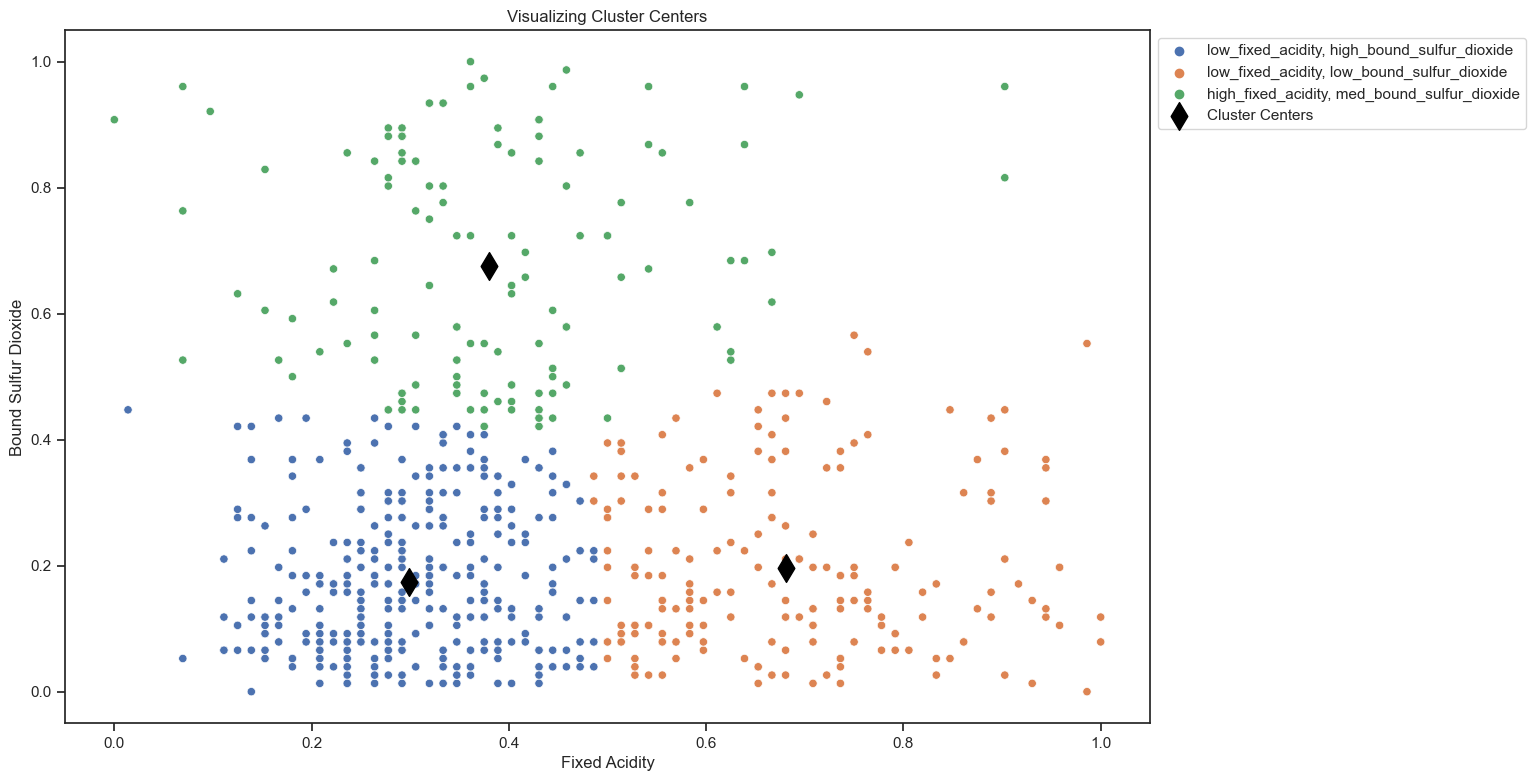

In [104]:
# Visualize the clusters along with the centers on unscaled data
plt.figure(figsize=(14, 9))

# Scatter plot of data with hue for cluster
sns.scatterplot(x='fixed_acidity', y='bound_sulfur_dioxide', data=X_train_scaled, hue='fixed_acidity_bound_sulfur_dioxide')

centroids = pd.DataFrame(kmeans.cluster_centers_, columns = X2.columns[:2])

# Plot cluster centers (centroids)
plt.scatter(centroids['fixed_acidity'], centroids['bound_sulfur_dioxide'], c='black', marker='d', s=200, label='Cluster Centers')

plt.title('Visualizing Cluster Centers')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.ylabel('Bound Sulfur Dioxide')
plt.xlabel('Fixed Acidity')
plt.show()

In [105]:
# verify kmeans inertia
kmeans.inertia_

22.024860493591724

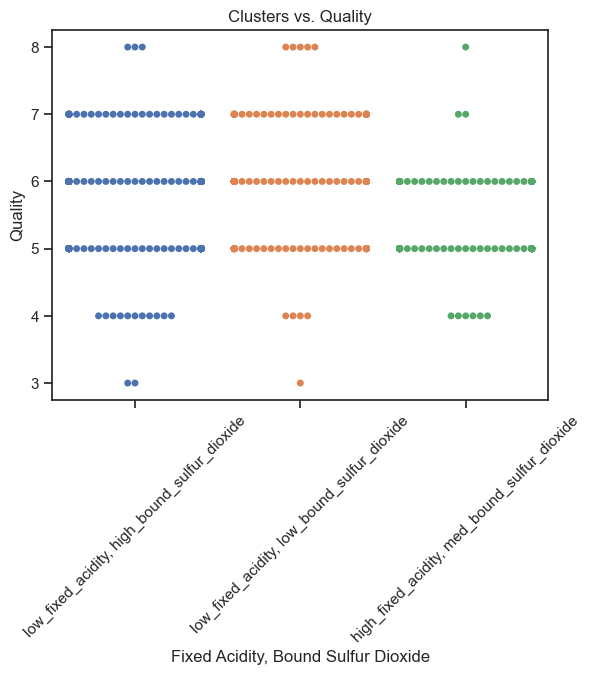

In [106]:
#visualize clusters vs. target
sns.swarmplot(data=X_train_scaled, x='fixed_acidity_bound_sulfur_dioxide', y=y_train)
plt.xticks(rotation= 45)
plt.xlabel('Fixed Acidity, Bound Sulfur Dioxide')
plt.ylabel('Quality')
plt.title('Clusters vs. Quality')
plt.show()

#### Cluster Model 3 takeaway
- Although three clusters were created, it was only grouping by a randomly chosen mean of an area.
- The cluster are not adequate to move into modeling as a feature

# Modeling
- establish baseline
- run features through modeling
- classification measured on accuracy
    - decision tree
    - random forest
    - KNN
    - logistic regression

# clean X_train_scaled, etc... for modeling
- remove columns attached to new cluster
- remove columns not being sent into models



In [107]:
# check out data
X_train_scaled.head()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
5281       0.444444          0.158192     0.575342        0.333333   0.500000   
6034       0.736111          0.451977     0.616438        0.333333   0.500000   
5333       1.000000          0.305085     0.863014        0.458333   0.641026   
6213       0.333333          0.576271     0.369863        0.333333   0.538462   
6035       0.736111          0.451977     0.616438        0.333333   0.500000   

      free_sulfur_dioxide  total_sulfur_dioxide   density        ph  \
5281             0.243902              0.201923  0.583815  0.364865   
6034             0.121951              0.067308  0.623121  0.378378   
5333             0.121951              0.115385  0.930636  0.297297   
6213             0.390244              0.817308  0.440462  0.432432   
6035             0.121951              0.067308  0.623121  0.378378   

      sulphates   alcohol  bound_sulfur_dioxide  \
5281   0.734375  0.152174              0.171053   
6034   0.671875  0.586957              0.052632   
5333   0.250000  0.173913              0.118421   
6213   0.390625  0.239130              0.934211   
6035   0.671875  0.586957              0.052632   

                      sugar_alcohol_density           chlorides_sulphates  \
5281   high_alcohol, low_sugar, low_density   low_chloride, high_sulphate   
6034  low_alcohol, high_sugar, high_density   low_chloride, high_sulphate   
5333   low_sugar, low_alcohol , med_density  high_chloride, high_sulphate   
6213   high_alcohol, low_sugar, low_density    low_chloride, low_sulphate   
6035  low_alcohol, high_sugar, high_density   low_chloride, high_sulphate   

                fixed_acidity_bound_sulfur_dioxide  
5281  low_fixed_acidity, high_bound_sulfur_dioxide  
6034   low_fixed_acidity, low_bound_sulfur_dioxide  
5333   low_fixed_acidity, low_bound_sulfur_dioxide  
6213  high_fixed_acidity, med_bound_sulfur_dioxide  
6035   low_fixed_acidity, low_bound_sulfur_dioxide

In [108]:
#rename using map
X_train_scaled['sugar_alcohol_density'] = X_train_scaled.sugar_alcohol_density.map({
     'low_sugar, low_alcohol , med_density': 0,
     'high_alcohol, low_sugar, low_density': 1,
     'low_alcohol, high_sugar, high_density': 2
    
})
X_train_scaled.head()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
5281       0.444444          0.158192     0.575342        0.333333   0.500000   
6034       0.736111          0.451977     0.616438        0.333333   0.500000   
5333       1.000000          0.305085     0.863014        0.458333   0.641026   
6213       0.333333          0.576271     0.369863        0.333333   0.538462   
6035       0.736111          0.451977     0.616438        0.333333   0.500000   

      free_sulfur_dioxide  total_sulfur_dioxide   density        ph  \
5281             0.243902              0.201923  0.583815  0.364865   
6034             0.121951              0.067308  0.623121  0.378378   
5333             0.121951              0.115385  0.930636  0.297297   
6213             0.390244              0.817308  0.440462  0.432432   
6035             0.121951              0.067308  0.623121  0.378378   

      sulphates   alcohol  bound_sulfur_dioxide  sugar_alcohol_density  \
5281   0.734375  0.152174              0.171053                      1   
6034   0.671875  0.586957              0.052632                      2   
5333   0.250000  0.173913              0.118421                      0   
6213   0.390625  0.239130              0.934211                      1   
6035   0.671875  0.586957              0.052632                      2   

               chlorides_sulphates  \
5281   low_chloride, high_sulphate   
6034   low_chloride, high_sulphate   
5333  high_chloride, high_sulphate   
6213    low_chloride, low_sulphate   
6035   low_chloride, high_sulphate   

                fixed_acidity_bound_sulfur_dioxide  
5281  low_fixed_acidity, high_bound_sulfur_dioxide  
6034   low_fixed_acidity, low_bound_sulfur_dioxide  
5333   low_fixed_acidity, low_bound_sulfur_dioxide  
6213  high_fixed_acidity, med_bound_sulfur_dioxide  
6035   low_fixed_acidity, low_bound_sulfur_dioxide

In [110]:
X_train_scaled = X_train_scaled[['fixed_acidity', 'volatile_acidity','citric_acid','chlorides'
                     ,'free_sulfur_dioxide','ph','sulphates'
                     ,'bound_sulfur_dioxide','residual_sugar', 'alcohol', 'density','sugar_alcohol_density']]
X_validate_scaled = X_validate_scaled[['fixed_acidity', 'volatile_acidity','citric_acid','chlorides'
                     ,'free_sulfur_dioxide','ph','sulphates'
                     ,'bound_sulfur_dioxide','residual_sugar', 'alcohol', 'density','sugar_alcohol_density']]
X_test_scaled = X_test_scaled[['fixed_acidity', 'volatile_acidity','citric_acid','chlorides'
                     ,'free_sulfur_dioxide','ph','sulphates'
                     ,'bound_sulfur_dioxide','residual_sugar', 'alcohol', 'density','sugar_alcohol_density']]
X_train_scaled.head()

fixed_acidity  volatile_acidity  citric_acid  chlorides  \
5281       0.444444          0.158192     0.575342   0.500000   
6034       0.736111          0.451977     0.616438   0.500000   
5333       1.000000          0.305085     0.863014   0.641026   
6213       0.333333          0.576271     0.369863   0.538462   
6035       0.736111          0.451977     0.616438   0.500000   

      free_sulfur_dioxide        ph  sulphates  bound_sulfur_dioxide  \
5281             0.243902  0.364865   0.734375              0.171053   
6034             0.121951  0.378378   0.671875              0.052632   
5333             0.121951  0.297297   0.250000              0.118421   
6213             0.390244  0.432432   0.390625              0.934211   
6035             0.121951  0.378378   0.671875              0.052632   

      residual_sugar   alcohol   density  sugar_alcohol_density  
5281        0.333333  0.152174  0.583815                      1  
6034        0.333333  0.586957  0.623121                      2  
5333        0.458333  0.173913  0.930636                      0  
6213        0.333333  0.239130  0.440462                      1  
6035        0.333333  0.586957  0.623121                      2

In [111]:
X_validate_scaled.head()

fixed_acidity  volatile_acidity  citric_acid  chlorides  \
5072       0.305556          0.293785     0.287671   0.500000   
5426       0.430556          0.338983     0.671233   0.551282   
5989       0.388889          0.248588     0.575342   0.576923   
6264       0.305556          0.700565     0.109589   0.679487   
6067       0.347222          0.429379     0.397260   0.576923   

      free_sulfur_dioxide        ph  sulphates  bound_sulfur_dioxide  \
5072             0.146341  0.527027   0.218750              0.328947   
5426             0.756098  0.540541   0.656250              0.263158   
5989             0.170732  0.554054   0.421875              0.105263   
6264             0.219512  0.405405   0.265625              0.421053   
6067             0.097561  0.513514   0.453125              0.078947   

      residual_sugar   alcohol   density  sugar_alcohol_density  
5072        0.333333  0.173913  0.433526                      1  
5426        0.583333  0.000000  0.745665                      0  
5989        0.333333  0.586957  0.359538                      2  
6264        0.208333  0.239130  0.394220                      1  
6067        0.458333  0.608696  0.308671                      2

In [112]:
# baseline
y_train.value_counts()

6    301
5    276
7     77
4     21
8      9
3      3
Name: quality, dtype: int64

In [113]:
#set baseline accuracy
(y_train == 6).mean()

0.438136826783115

### Decision tree
- will use decision tree classifier function to run through train and validate and graph the results

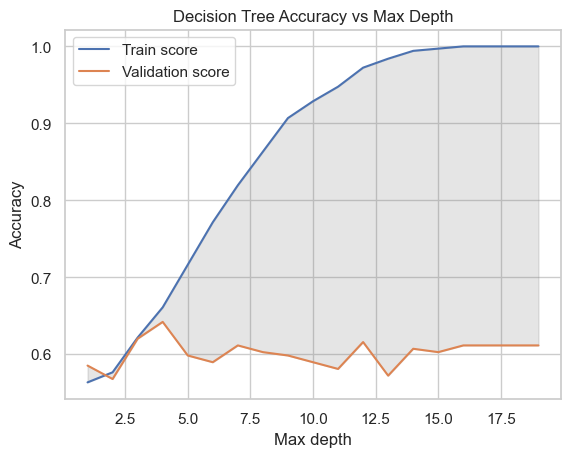

max_depth  train_acc   val_acc  score_diff
2          3   0.621543  0.620087    0.001456

In [122]:
muah.decision_tree(X_train_scaled, X_validate_scaled, y_train, y_validate)[2:3]

- Results of max depth 4 will be used to compare to other modeling techniques.

# Random Forest
- will use Random Forest function to run through train and validate and graph the results

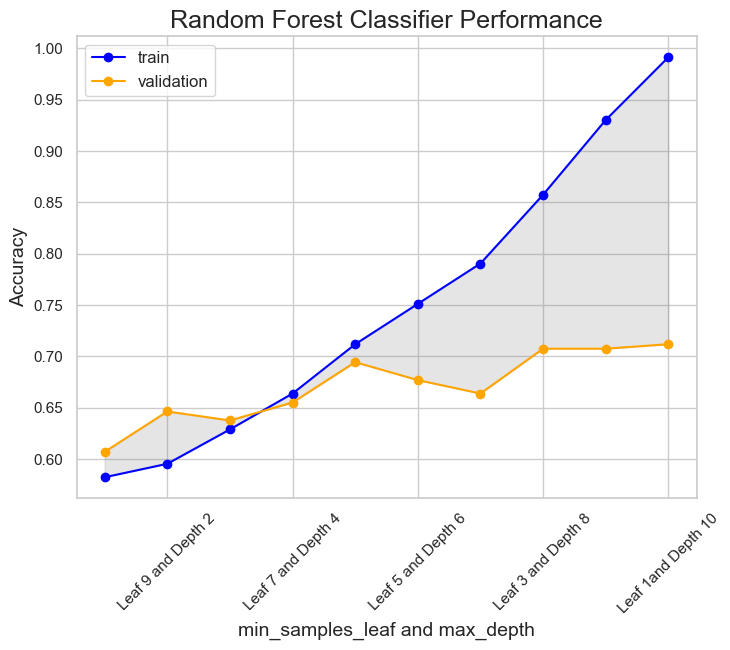

min_samples_leaf  max_depth  train_score  validate_score  diff_score
6                 7          4     0.663755        0.655022    0.008734

In [120]:
#run random forest function and graph results
muah.random_forest_scores(X_train_scaled, y_train, X_validate_scaled, y_validate)[6:7]

- Results of min_sample_leaf 8 and max_depth 3 will be used to compare to other modeling techniques.

# KNN
- will use KNN function to run through train and validate and graph the results

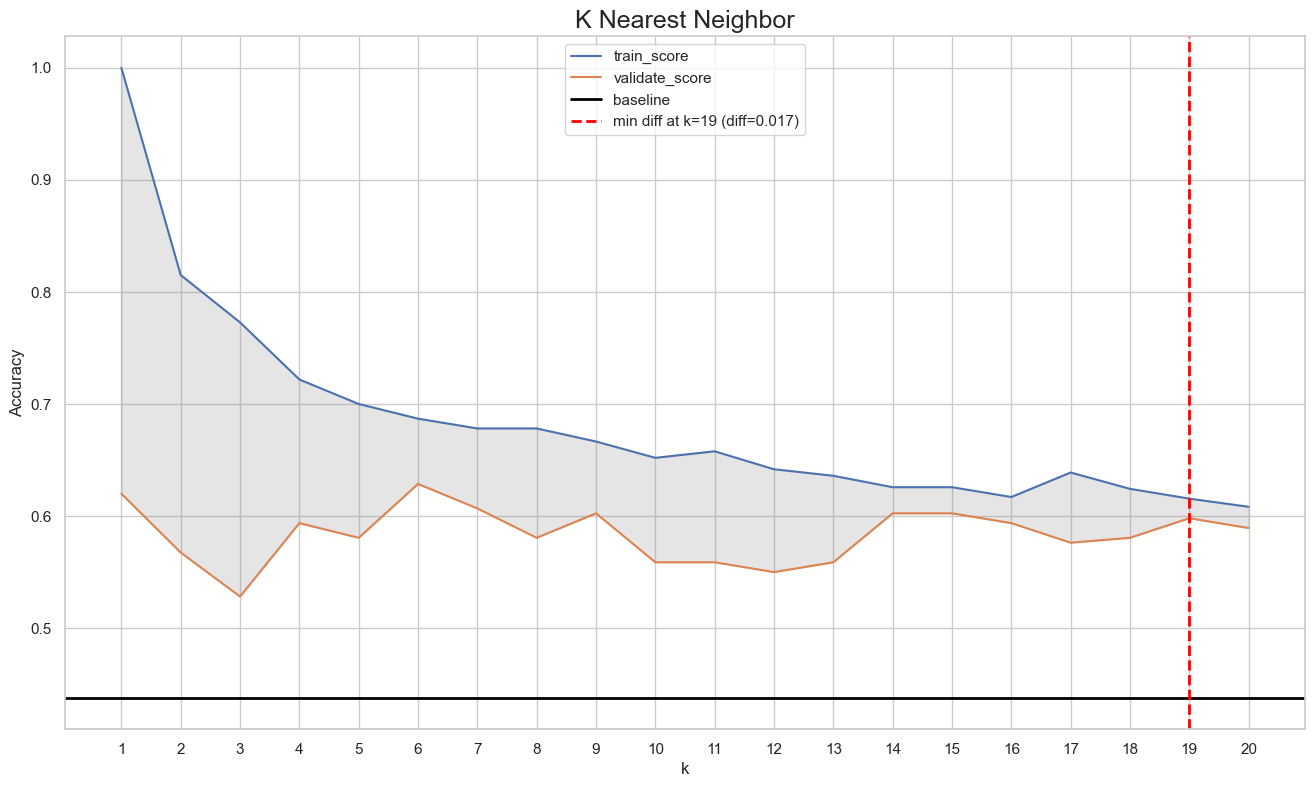

k  train_score  validate_score  diff_score
18  19     0.615721        0.598253    0.017467

In [119]:
k.k_nearest2(X_train_scaled, y_train, X_validate_scaled, y_validate)[18:19]

- Results of k=19 will be used to compare to other modeling techniques.

# Logistic Regression
- I ran the data through iterations of C = 0.01, 0.1, 1, 10, 100, and 1000 

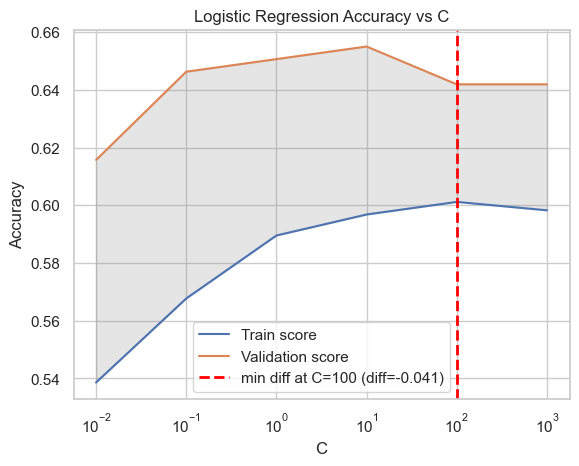

C  train_score  validate_score  diff_score
4  100.0     0.601164        0.641921   -0.040757

In [123]:
muah.plot_logistic_regression(X_train_scaled, X_validate_scaled, y_train, y_validate)[4:5]

- Results of C = 0.1 will be used to compare to other modeling techniques.

# Choose a model
- based on the following summary:

- Baseline accuracy: 0.453

- Decision Tree (max_depth = 4)
    - train: 0.537234	
    - validate: 0.512463
    - difference: 0.024771

- Random Forest (min_samples_leaf = 8, max_depth = 3)
    - train: 0.533		
    - validate: 0.520
    - difference: 0.013

- KNN (k = 19)
    - train: 0.587		
    - validate: 0.561
    - difference: 0.026

- Logistic Regression (C=0.1)
    - train: 0.494		
    - validate: 0.495
    - difference: -0.00083

All models performed better than baseline. Out of the 4 models, the KNN performed the best in both the train and validate iterations. Therefore, I chose KNN as my model of choice for this project. The test data is ran on the model below:

# Run KNN on test data

In [ ]:
# Run function to test the test data on KNN model
muah.the_chosen_one(X_train_scaled, X_test_scaled, y_train, y_test)

- The test model scored 55% which is 10 points better than the baseline!!!

# Summary/Conclusion:
- The following data analysis pipeline categories were accomplished (Acquire, Prepare, Explore(with clustering), Model) we found that alcohol, sugar, and density were high drivers of predicting quality.

- We selected the KNN (K nearest neighbors). The decision was made based on highest accuracy score with least amount of difference between train and validate data sets.
- The KNN performed slightly better than baseline, so we may need to look at other factors that are not available in the dataset like aroma, legs, and taste. 

# Recommendations:
- All of the selected features contributed to the predicting the quality of wine.  
    - Collect more data on red wines. The data set was 1 sided with 75% of the data being white wines. 
        - Diversity in the data would create a better data environment for prediction accuracy. 
        - Higher alcohol and lower sugar seems to drive quality, not by much but a noticeable difference. 

# Next steps:
- With more time, further combination of clusters may create features that create a model with more predictive power.
    - Analyzing the relationships between multiple features in relation to quality could improve the model. 
    - Even though the selected features affect quality, their relationships to other factors may direct where we want to focus efforts in predicting quality.